In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Common value

In [ ]:
# color used in the paper
ID_color='#4C931A'
OOD_color='#4376B6'
gap_color='#532288'
ID_shadow='#A2D869'
OOD_shadow='#92C1DC'
gap_shadow='#9A8EC4'
ID_third = '#abc32f'
OOD_third = '#107dac'

In [ ]:
from numpy.core.numeric import array_equal
from statistics import mean, median
import pandas as pd
from scipy import stats
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from scipy import stats
import csv
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

sns.set_style("white")
sns.set_style("ticks", {"xtick.major.size": 14, "ytick.major.size": 14})
sns.set_context("paper")
mpl.rcParams['axes.linewidth']=2.5
mpl.rcParams['ytick.major.width']=2.5
mpl.rcParams['xtick.major.width']=2.5

In [ ]:
model_list=[
            'st_resnet',
            'moco',
            'clip',
            'simclr',
            'linf_8',
            'linf_4',
            'l2_3',
            'resnext101',
            'wsl_resnext101',
            'resnet101',
            'wide_resnet50',
            'wide_resnet101',
            'CORnet-S',
            'CORnet-Z',
            'VOneCORnet-S',
            'alexnet',
            'resnet18',
            'resnet50_l2_eps0.01',
            'resnet50_l2_eps0.05',
            'resnet50_l2_eps5',
            'resnet50_l2_eps1',
            'resnet50_l2_eps3',
            'resnet50_l2_eps0.25',
            'resnet50_l2_eps0.5',
            'resnet50_l2_eps0.03',
            'resnet50_l2_eps0.1',
            'resnet50_trained_on_SIN',
            'resnet50_trained_on_SIN_and_IN',
            'resnet50_trained_on_SIN_and_IN_then_finetuned_on_IN',
            'RN50_deepAugment', # imagenet R
            'RN50_deepAugment_and_augmix',
            'wide_resnet50_4',
            'resnext50_32x4d',
            ]
all_model_list = model_list

In [ ]:
session_list=[
              'm_ohp_session1',
              'm_ohp_session2',
              'm_stretch_session1',
              'm_stretch_session2',
              'n_stretch_session1',
              's_ohp_session1',
              's_stretch_session1'
              ]

In [ ]:
dataset = ['ImageNet', 'ImageNet-R', 'ImageNet-A', 'ImageNet-Sketch', 'ImageNet-C']

# Helper function

In [ ]:
import numpy as np
def filter_func(raw,threshold):
  if(raw<threshold):
    return 1
  else:
    return 0
fiter = np.vectorize(filter_func)

In [ ]:
def load_label(x):
  if x=="ID_NP":
    label="Nat. Neural Predictivity"
  elif x =="OOD_NP":
    label="Synt. Neural Predictivity"
  elif x =="NPGG":
    label="Neural Prediction\nGeneralization Gap"
  elif x =="IN_acc":
    label='ImageNet Accuracy'
  elif x=="OOD_acc":
    label="OOD Object\nRecognition Accuracy"
  elif x=="imagenet-c_acc":
    label='ImageNet-C Accuracy'
  elif x=="imagenet-a_acc":
    label='ImageNet-A Accuracy'
  elif x=="imagenet-r_acc":
    label='ImageNet-R Accuracy'
  elif x=="imagenet-s_acc":
    label='ImageNet-Sketch Accuracy'
  elif x=="OOD_gg":
    label="OOD object Recognition\nGeneralization Gap"
  elif x=="imagenet-c_gg":
    label="ImageNet-C object Recognition\nGeneralization Gap"
  elif x=="imagenet-a_gg":
    label="ImageNet-A object Recognition\nGeneralization Gap"
  elif x=="imagenet-r_gg":
    label="ImageNet-R object rRecognition\nGeneralization Gap"
  elif x=="imagenet-s_gg":
    label="ImageNet-Sketch Object Recognition\nGeneralization Gap"
  elif x == "l2_3":
    label = "L2 \u03B5 = 3.0 Accuracy"
  elif x == "l2_15":
    label = "L2 \u03B5 = 0.15 Accuracy"
  elif x == "linf4_255":
    label = r"L∞ $\epsilon=  \frac{4}{255}$  Accuracy"
  elif x == "linf1_1020":
    label = r"L∞ $\epsilon=  \frac{1}{1020}$  Accuracy"
  elif x=="adv_acc":
    label="Adversarial Robustness\nAccuracy"
  elif x=="adv_gg":
    label="Adversarial Robustness\nGeneralization Gap"
  elif x=="eps":
    label="Epsilon"
  return label

In [ ]:
def load_dict(model_list,area,session_list, x,filtered=True, synth_best = True, train_type = 'natural', top_4 = False, ensemble_mean = False, ensemble_choice = "mean"):
  if x=="ID_NP":
    np_dict=with_norm_np(model_list, area, session_list,"ID_NP",filtered, synth_best, train_type, top_4 = top_4, ensemble_mean = ensemble_mean, ensemble_choice = ensemble_choice)
    x_dict={k:  100*np.mean(v) for k, v in np_dict.items()}

  elif x =="OOD_NP":
    np_dict=with_norm_np(model_list, area, session_list,"OOD_NP",filtered, synth_best, train_type,top_4 = top_4, ensemble_mean = ensemble_mean, ensemble_choice = ensemble_choice)
    x_dict={k:  100*np.mean(v) for k, v in np_dict.items()}


  elif x =="NPGG":
    np_dict=with_norm_np(model_list, area, session_list,"NPGG",filtered, synth_best, train_type,top_4 = top_4, ensemble_mean = ensemble_mean, ensemble_choice = ensemble_choice)
    x_dict={k:  100*np.mean(v) for k, v in np_dict.items()}
  elif x =="IN_acc":
    x_dict={k:imagenet_dict[k] for k in model_list }

  elif x == "l2_3":
    x_dict={k:l2_3_adv_acc_dict[k] for k in model_list }
  elif x == "linf4_255":
    x_dict={k:linf4_255_adv_acc_dict[k] for k in model_list }
  elif x == "l2_15":
    x_dict={k:l2_15_adv_acc_dict[k] for k in model_list }
  elif x == "linf1_1020":
    x_dict={k:linf1_1020_adv_acc_dict[k] for k in model_list }
  elif x=="OOD_acc":
    x_dict={k:multi_OOD_acc_dict[k] for k in model_list }

  elif x == 'eps':
    x_dict={k:float(k.split("eps")[1]) if k != "st_resnet" else 0.0 for k in model_list}
  elif x=="imagenet-c_acc":
    x_dict={k:imagenet_c_dict[k] for k in model_list}
  elif x=="imagenet-a_acc":
    x_dict={k:imagenet_a_dict[k] for k in model_list}
  elif x=="imagenet-r_acc":
    x_dict={k:imagenet_r_dict[k] for k in model_list}
  elif x=="imagenet-s_acc":
    x_dict={k:imagenet_s_dict[k] for k in model_list}
  elif x=="OOD_gg":
    x_dict={k:imagenet_dict[k]-multi_OOD_acc_dict[k] for k in model_list}
  elif x=="imagenet-c_gg":
    x_dict={k:imagenet_dict[k]-imagenet_c_dict[k] for k in model_list}
  elif x=="imagenet-a_gg":
    x_dict={k:imagenet_dict[k]-imagenet_a_dict[k] for k in model_list}
  elif x=="imagenet-r_gg":
    x_dict={k:imagenet_dict[k]-imagenet_r_dict[k] for k in model_list}
  elif x=="imagenet-s_gg":
    x_dict={k:imagenet_dict[k]-imagenet_s_dict[k] for k in model_list}
  elif x=="adv_acc":
    x_dict={k:multi_adv_acc_dict[k] for k in model_list}
  elif x=="adv_gg":
    x_dict={k:imagenet_dict[k]-multi_adv_acc_dict[k] for k in model_list}
  return x_dict

In [ ]:
def load_layer_list(model_type):
  if model_type=="clip":
    layerlist=['avgpool','layer1[0]','layer1[1]','layer1[2]','layer2[0]','layer2[1]','layer2[2]','layer2[3]','layer3[0]','layer3[1]','layer3[2]','layer3[3]','layer3[4]','layer3[5]','layer4[0]','layer4[1]','layer4[2]','attnpool']
  elif model_type=="wsl_resnext101" or model_type== "resnext101" or model_type== "resnet101" or model_type== "wide_resnet101" or '101' in model_type:
    layerlist=['maxpool','layer1[0]','layer1[1]','layer1[2]','layer2[0]','layer2[1]','layer2[2]','layer2[3]','layer3[0]','layer3[1]','layer3[2]','layer3[3]','layer3[4]','layer3[5]','layer3[6]', 'layer3[7]', 'layer3[8]', 'layer3[9]', 'layer3[10]', 'layer3[11]', 'layer3[12]', 'layer3[13]', 'layer3[14]', 'layer3[15]', 'layer3[16]', 'layer3[17]', 'layer3[18]', 'layer3[19]', 'layer3[20]', 'layer3[21]', 'layer3[22]','layer4[0]','layer4[1]','layer4[2]','avgpool','fc']
  elif model_type=="alexnet":
    layerlist=['features[0]','features[2]','features[3]','features[5]','features[6]','features[8]','features[10]','features[12]','classifier[1]','classifier[4]','classifier[6]']
  elif '18' in model_type:
    layerlist=['maxpool','layer1[0]','layer1[1]','layer2[0]','layer2[1]','layer3[0]','layer3[1]','layer4[0]','layer4[1]','avgpool','fc']
  elif model_type == 'CORnet-S':
        layerlist = ['IT_conv10', 'IT_conv11', 'IT_conv20', 'IT_conv21', 'IT_conv30', 'IT_conv31', 'IT_nonlin10', 'IT_nonlin11', 'IT_nonlin20', 'IT_nonlin21', 'IT_nonlin30', 'IT_nonlin31', 'IT_output0', 'IT_output1', 'V1_conv10', 'V1_conv20', 'V1_nonlin10', 'V1_nonlin20', 'V1_norm10', 'V1_norm20', 'V1_output0', 'V1_pool0', 'V2_conv10', 'V2_conv11', 'V2_conv20', 'V2_conv21', 'V2_conv30', 'V2_conv31', 'V2_nonlin10', 'V2_nonlin11', 'V2_nonlin20', 'V2_nonlin21', 'V2_nonlin30', 'V2_nonlin31', 'V2_output0', 'V2_output1', 'V4_conv10', 'V4_conv11', 'V4_conv12', 'V4_conv13', 'V4_conv20', 'V4_conv21', 'V4_conv22', 'V4_conv23', 'V4_conv30', 'V4_conv31', 'V4_conv32', 'V4_conv33', 'V4_nonlin10', 'V4_nonlin11', 'V4_nonlin12', 'V4_nonlin13', 'V4_nonlin20', 'V4_nonlin21', 'V4_nonlin22', 'V4_nonlin23', 'V4_nonlin30', 'V4_nonlin31', 'V4_nonlin32', 'V4_nonlin33', 'V4_output0', 'V4_output1', 'V4_output2', 'V4_output3', 'decoder_avgpool0', 'decoder_flatten0', 'decoder_linear0', 'decoder_output0']
  elif model_type == "VOneCORnet-S":
    layerlist = ['IT_conv10', 'IT_conv11', 'IT_conv20', 'IT_conv21', 'IT_conv30', 'IT_conv31', 'IT_nonlin10', 'IT_nonlin11', 'IT_nonlin20', 'IT_nonlin21', 'IT_nonlin30', 'IT_nonlin31', 'IT_output0', 'IT_output1', 'V2_conv10', 'V2_conv11', 'V2_conv20', 'V2_conv21', 'V2_conv30', 'V2_conv31', 'V2_nonlin10', 'V2_nonlin11', 'V2_nonlin20', 'V2_nonlin21', 'V2_nonlin30', 'V2_nonlin31', 'V2_output0', 'V2_output1', 'V4_conv10', 'V4_conv11', 'V4_conv12', 'V4_conv13', 'V4_conv20', 'V4_conv21', 'V4_conv22', 'V4_conv23', 'V4_conv30', 'V4_conv31', 'V4_conv32', 'V4_conv33', 'V4_nonlin10', 'V4_nonlin11', 'V4_nonlin12', 'V4_nonlin13', 'V4_nonlin20', 'V4_nonlin21', 'V4_nonlin22', 'V4_nonlin23', 'V4_nonlin30', 'V4_nonlin31', 'V4_nonlin32', 'V4_nonlin33', 'V4_output0', 'V4_output1', 'V4_output2', 'V4_output3', 'decoder_avgpool0', 'decoder_flatten0', 'decoder_linear0', 'decoder_output0']
  elif model_type == 'CORnet-Z':
    layerlist = ['IT_conv0', 'IT_nonlin0', 'IT_output0', 'IT_pool0', 'V1_conv0', 'V1_nonlin0', 'V1_output0', 'V1_pool0', 'V2_conv0', 'V2_nonlin0', 'V2_output0', 'V2_pool0', 'V4_conv0', 'V4_nonlin0', 'V4_output0', 'V4_pool0', 'decoder_avgpool0', 'decoder_flatten0', 'decoder_linear0', 'decoder_output0']
  else:
    #layer list for resnet 50
    layerlist=['maxpool','layer1[0]','layer1[1]','layer1[2]','layer2[0]','layer2[1]','layer2[2]','layer2[3]','layer3[0]','layer3[1]','layer3[2]','layer3[3]','layer3[4]','layer3[5]','layer4[0]','layer4[1]','layer4[2]','avgpool','fc']
  return layerlist

In [ ]:
def load_per_neuron_np(session_name, model_name, train_type = 'natural', top_4 = False, per_neuron_hist = False, no_pca = False):
  if train_type == "natural":
    train_type_txt_str = ''
  else:
    train_type_txt_str = train_type + '/'
  if no_pca is True:
    model_name = "no_pca_" + model_name

  natural_file = h5py.File(f'/content/gdrive/MyDrive/V4_per_neuron/{session_name}/{train_type_txt_str}{model_name}_all_layer_natural_neuron_corr.hdf5','r')
  synth_file = h5py.File(f'/content/gdrive/MyDrive/V4_per_neuron/{session_name}/{train_type_txt_str}{model_name}_all_layer_synth_neuron_corr.hdf5','r')
  if per_neuron_hist:
    natural_mean_file = h5py.File(f'/content/gdrive/MyDrive/V4_all_layer_pred/{session_name}/{train_type_txt_str}{model_name}_natural_mean_all_layer_pred.hdf5','r')
    synth_mean_file = h5py.File(f'/content/gdrive/MyDrive/V4_all_layer_pred/{session_name}/{train_type_txt_str}{model_name}_synth_mean_all_layer_pred.hdf5','r')
  else:
    natural_mean_file = natural_file
    synth_mean_file = synth_file
  if model_name in ['resnet_0', 'resnet_10', 'resnet_20', 'resnet_30', 'resnet_40', 'resnet_50', 'resnet_60', 'resnet_70', 'resnet_80', 'st_resnet']:
    natural_index_file = h5py.File(f'/content/gdrive/MyDrive/V4_per_neuron/{session_name}/{train_type_txt_str}st_resnet_all_layer_natural_neuron_corr.hdf5','r')
    synth_index_file = h5py.File(f'/content/gdrive/MyDrive/V4_per_neuron/{session_name}/{train_type_txt_str}st_resnet_all_layer_synth_neuron_corr.hdf5','r')
  elif model_name in ['rn101_0', 'rn101_10', 'rn101_20', 'rn101_30', 'rn101_40', 'rn101_50', 'rn101_60', 'rn101_70', 'rn101_80', 'resnet101']:
    natural_index_file = h5py.File(f'/content/gdrive/MyDrive/V4_per_neuron/{session_name}/{train_type_txt_str}resnet101_all_layer_natural_neuron_corr.hdf5','r')
    synth_index_file = h5py.File(f'/content/gdrive/MyDrive/V4_per_neuron/{session_name}/{train_type_txt_str}resnet101_all_layer_synth_neuron_corr.hdf5','r')
  else:
    natural_index_file = natural_file
    synth_index_file = synth_file
  layerlist = load_layer_list(model_name)
  natural_hist_data = []
  synth_hist_data = []
  natural_raw_data = []
  synth_raw_data = []
  for layer in layerlist:
    if len(natural_hist_data)==0:
      natural_hist_data =np.mean(natural_index_file[layer][:], axis = 0)
      natural_raw_data = natural_file[layer][:]
      natural_mean_raw_data = natural_mean_file[layer][:]
      synth_hist_data =np.mean(synth_index_file[layer][:], axis = 0)
      synth_raw_data = synth_file[layer][:]
      synth_mean_raw_data = synth_mean_file[layer][:]
    else:
      natural_hist_data=np.vstack((natural_hist_data,np.mean(natural_index_file[layer][:], axis = 0)))
      natural_raw_data = np.dstack((natural_raw_data, natural_file[layer][:]))
      natural_mean_raw_data = np.dstack((natural_mean_raw_data, natural_mean_file[layer][:]))
      synth_hist_data=np.vstack((synth_hist_data,np.mean(synth_index_file[layer][:], axis = 0)))
      synth_raw_data = np.dstack((synth_raw_data, synth_file[layer][:]))
      synth_mean_raw_data = np.dstack((synth_mean_raw_data, synth_mean_file[layer][:]))
  layer_index = np.argmax(natural_hist_data, axis = 0)

  top_4_layer_index = natural_hist_data.argsort(axis = 0 )[-5:][::-1]
  if per_neuron_hist:
    reshaped_synth_raw_data = synth_mean_raw_data.transpose(2, 1, 0)
    reshaped_natural_raw_data = natural_mean_raw_data.transpose(2, 1, 0)
  else:
    reshaped_synth_raw_data = synth_raw_data.transpose(2, 1, 0)
    reshaped_natural_raw_data = natural_raw_data.transpose(2, 1, 0)


  final_synth = reshaped_synth_raw_data[layer_index, np.arange(len(reshaped_synth_raw_data[0]))].transpose(1, 0)
  final_natural = reshaped_natural_raw_data[layer_index, np.arange(len(reshaped_natural_raw_data[0]))].transpose(1, 0)


  final_top_4_natural, final_top_4_synth = [],[]
  if top_4:
    for one_layer_index in top_4_layer_index:
      if len(final_top_4_natural) == 0:
        final_top_4_natural = reshaped_natural_raw_data[one_layer_index, np.arange(len(reshaped_natural_raw_data[0]))].transpose(1, 0)
      else:
        final_top_4_natural = np.dstack([final_top_4_natural, reshaped_natural_raw_data[one_layer_index, np.arange(len(reshaped_natural_raw_data[0]))].transpose(1, 0)])
      if len(final_top_4_synth) == 0:
        final_top_4_synth = reshaped_synth_raw_data[one_layer_index, np.arange(len(reshaped_synth_raw_data[0]))].transpose(1, 0)
      else:
        final_top_4_synth = np.dstack([final_top_4_synth, reshaped_synth_raw_data[one_layer_index, np.arange(len(reshaped_synth_raw_data[0]))].transpose(1, 0)])
    final_top_4_synth = final_top_4_synth.transpose(2, 0, 1)
    final_top_4_natural = final_top_4_natural.transpose(2, 0, 1)
  if not top_4:
    return final_natural, final_synth
  else:
    return final_top_4_natural, final_top_4_synth



In [ ]:
def masked_corrected_np(mask, inter_con, raw_neuron_corr):
  ma_inter_con = ma.masked_array(inter_con,mask)
  mask_list = np.ma.row_stack([mask] * raw_neuron_corr.shape[0])
  ma_neuron_corr = ma.masked_array(raw_neuron_corr, mask_list)
  return (np.ma.power(ma_neuron_corr, 2))/(np.ma.power(ma_inter_con, 2))

In [ ]:
import numpy.ma as ma
import numpy as np
import json
import h5py
def with_norm_np(model_list, area, session_list,choice,filtered=True, synth_best = True, train_type = "natural", top_4 = False, ensemble_mean = False, ensemble_choice = "mean", raw = False):
  conf_medians_dict={}
  inter_cons_area = area

  if train_type == "natural":
    train_type_txt_str = ''
  else:
    train_type_txt_str = train_type + '/'
  for m in model_list:
    if "V4" in area:
      origin_m = m
      m = "pls_IN_pca_" + m
      inter_cons_area = 'V4_old'
    synth_hist_data=[]
    natural_hist_data=[]
    if not filtered:
      print("not filtered")
    else:

      for s in session_list:
        natural_inter_cor=np.load(f"/content/gdrive/MyDrive/{inter_cons_area}/{s}/naturalistic_inter_con.npy")
        synth_inter_cor=np.load(f"/content/gdrive/MyDrive/{inter_cons_area}/{s}/synthetic_inter_con.npy")
        if (not synth_best):
          if ensemble_mean:
            if ensemble_choice == "mean":
              ensemble_folder = f"V4_ensemble_{ensemble_choice}"
            else:
              ensemble_folder = "V4_ensemble"
            synth_neuron_corr=np.load(f'/content/gdrive/MyDrive/{ensemble_folder}/{s}/{train_type_txt_str}{origin_m}_ensemble_layer_synth_neuron_corr.npy')
            natural_neuron_corr=np.load(f'/content/gdrive/MyDrive/{ensemble_folder}/{s}/{train_type_txt_str}{origin_m}_ensemble_layer_natural_neuron_corr.npy')
          else:
            synth_neuron_corr=np.load(f'/content/gdrive/MyDrive/{area}/{s}/{train_type_txt_str}{m}_synth_neuron_corr.npy')
            natural_neuron_corr=np.load(f'/content/gdrive/MyDrive/{area}/{s}/{train_type_txt_str}{m}_natural_neuron_corr.npy')
        else:
          natural_neuron_corr, synth_neuron_corr = load_per_neuron_np(s, m.split("pca_")[1], top_4 = top_4)
        natural_mask=fiter(natural_inter_cor,0.7)
        synth_mask=fiter(synth_inter_cor,0.7)
        if len(synth_hist_data)==0:
          synth_hist_data = masked_corrected_np(synth_mask, synth_inter_cor, synth_neuron_corr)

        else:
          synth_hist_data=np.ma.hstack([synth_hist_data,masked_corrected_np(synth_mask, synth_inter_cor, synth_neuron_corr)])
        if len(natural_hist_data)==0:
          natural_hist_data = masked_corrected_np(natural_mask, natural_inter_cor, natural_neuron_corr)
        else:
          natural_hist_data=np.ma.hstack([natural_hist_data,masked_corrected_np(natural_mask, natural_inter_cor, natural_neuron_corr)])

    if(choice=="NPGG"):
      conf=natural_hist_data-synth_hist_data
    if choice=="ID_NP":
      conf=natural_hist_data
    if choice=="OOD_NP":
      conf=synth_hist_data

    transposed = conf.transpose(1, 0)
    filtered_transposed = np.asarray([t for t in transposed if type(t[0])!=np.ma.core.MaskedConstant])
    filtered_inverse_transposed_conf = filtered_transposed.transpose(1, 0)
    model_name = m.split("pca_")[1]
    if raw is False:
      conf_medians=np.median(filtered_inverse_transposed_conf,axis=1)
    else:
      conf_medians=np.mean(filtered_inverse_transposed_conf,axis=0)
    conf_medians_dict[model_name]=conf_medians

  return conf_medians_dict

In [ ]:
def with_norm_np_per_model(model_name, area, session_list, choice,filtered=True, train_type = "natural", per_neuron = True, top_4 = False, ensemble_mean = False, ensemble_choice = "mean", no_pca = False):
  if train_type == "natural":
    prefix = ''
  else:
    prefix = train_type + '/'
  origin_m = model_name
  m=model_name
  if "V4" in area:
    m = "pls_IN_pca_" + m
    inter_cons_area = 'V4_old'
  if not filtered:
    for s in session_list:
        if len(synth_hist_data)==0:
          synth_hist_data =(np.power (np.load(f'/content/gdrive/MyDrive/V4/{s}/{m}_synth_neuron_corr.npy'),2))/(np.power(np.load(f"/content/gdrive/MyDrive/V4/{s}/synthetic_inter_con.npy"),2))
        else:
          synth_hist_data=np.hstack([synth_hist_data,(np.power (np.load(f'/content/gdrive/MyDrive/V4/{s}/{m}_synth_neuron_corr.npy'),2))/(np.power(np.load(f"/content/gdrive/MyDrive/V4/{s}/synthetic_inter_con.npy"),2))])
        if len(natural_hist_data)==0:
          natural_hist_data = (np.power (np.load(f'/content/gdrive/MyDrive/V4/{s}/{m}_natural_neuron_corr.npy'),2))/(np.power(np.load(f"/content/gdrive/MyDrive/V4/{s}/naturalistic_inter_con.npy"),2))
        else:
          natural_hist_data=np.hstack([natural_hist_data,(np.power (np.load(f'/content/gdrive/MyDrive/V4/{s}/{m}_natural_neuron_corr.npy'),2))/(np.power(np.load(f"/content/gdrive/MyDrive/V4/{s}/naturalistic_inter_con.npy"),2))])
  else:
      synth_hist_data=[]
      natural_hist_data=[]
      top_4_natural_hist_dict = {}
      top_4_synth_hist_dict = {}
      for i in range(5):
        top_4_natural_hist_dict[i] = []
        top_4_synth_hist_dict[i] = []
      for s in session_list:
        natural_inter_cor=np.load(f"/content/gdrive/MyDrive/{inter_cons_area}/{s}/naturalistic_inter_con.npy")
        synth_inter_cor=np.load(f"/content/gdrive/MyDrive/{inter_cons_area}/{s}/synthetic_inter_con.npy")
        if not per_neuron:
          if ensemble_mean:
            if ensemble_choice == "mean":
              ensemble_folder = f"V4_ensemble_{ensemble_choice}"
            else:
              ensemble_folder = "V4_ensemble"
            synth_neuron_corr=np.load(f'/content/gdrive/MyDrive/{ensemble_folder}/{s}/{prefix}{origin_m}_ensemble_layer_synth_neuron_corr.npy')
            natural_neuron_corr=np.load(f'/content/gdrive/MyDrive/{ensemble_folder}/{s}/{prefix}{origin_m}_ensemble_layer_natural_neuron_corr.npy')
          else:
            synth_neuron_corr=np.load(f'/content/gdrive/MyDrive/{area}/{s}/{train_type_txt_str}{m}_natural_neuron_corr.npy')
            natural_neuron_corr=np.load(f'/content/gdrive/MyDrive/{area}/{s}/{train_type_txt_str}{m}_synth_neuron_corr.npy')
        else:
          natural_neuron_corr, synth_neuron_corr = load_per_neuron_np(s, m.split("pca_")[1], train_type, top_4 = top_4, no_pca = no_pca)
        natural_mask=fiter(natural_inter_cor,0.7)
        synth_mask=fiter(synth_inter_cor,0.7)

        if not top_4:
          if len(synth_hist_data)==0:
            synth_hist_data = masked_corrected_np(synth_mask, synth_inter_cor, synth_neuron_corr)
          else:
            synth_hist_data=np.ma.hstack([synth_hist_data, masked_corrected_np(synth_mask, synth_inter_cor, synth_neuron_corr)])
          if len(natural_hist_data)==0:
            natural_hist_data =  masked_corrected_np(natural_mask, natural_inter_cor, natural_neuron_corr)
          else:
            natural_hist_data=np.ma.hstack([natural_hist_data,masked_corrected_np(natural_mask, natural_inter_cor, natural_neuron_corr)])
        else:
          for i,single_synth_hist_data in enumerate(synth_neuron_corr):
            if len(top_4_synth_hist_dict[i])==0:
              top_4_synth_hist_dict[i] = masked_corrected_np(synth_mask, synth_inter_cor, synth_neuron_corr[i])
            else:
              top_4_synth_hist_dict[i]=np.ma.hstack([top_4_synth_hist_dict[i], masked_corrected_np(synth_mask, synth_inter_cor, synth_neuron_corr[i])])
            if len(top_4_natural_hist_dict[i])==0:
              top_4_natural_hist_dict[i] =  masked_corrected_np(natural_mask, natural_inter_cor, natural_neuron_corr[i])
            else:
              top_4_natural_hist_dict[i]=np.ma.hstack([top_4_natural_hist_dict[i],masked_corrected_np(natural_mask, natural_inter_cor, natural_neuron_corr[i])])

  if not top_4:
    if choice=="ID_NP":
      conf=natural_hist_data
    if choice=="OOD_NP":
      conf=synth_hist_data
    if choice=="NPGG":
      conf=natural_hist_data-synth_hist_data
    transposed = conf.transpose(1, 0)
    filtered_transposed = np.asarray([t for t in transposed if type(t[0])!=np.ma.core.MaskedConstant])
    filtered_inverse_transposed_conf = filtered_transposed.transpose(1, 0)
    conf_medians=np.median(filtered_inverse_transposed_conf,axis=1)
    return conf_medians
  else:
    conf_dict = []

    for ind, key in enumerate(top_4_natural_hist_dict):
      if choice=="ID_NP":
        conf=top_4_natural_hist_dict[key]
      if choice=="OOD_NP":
        conf=top_4_synth_hist_dict[key]
      if choice=="NPGG":
        conf=top_4_natural_hist_dict[key] - top_4_synth_hist_dict[key]
      transposed = conf.transpose(1, 0)
      filtered_transposed = np.asarray([t for t in transposed if type(t[0])!=np.ma.core.MaskedConstant])
      filtered_inverse_transposed_conf = filtered_transposed.transpose(1, 0)
      conf_medians=np.median(filtered_inverse_transposed_conf,axis=1)
      conf_dict.append(conf_medians)

    return np.array(conf_dict)



In [ ]:
def load_all_np_measure(model_list, area, session_list,filtered = True,train_type = 'natural', no_pca = False):
  group_x_data=[]
  for model in model_list:
    if len(group_x_data)==0:
      group_x_data=np.asarray(with_norm_np_per_model(model, area, session_list,"ID_NP",filtered, train_type, no_pca = no_pca))
    else:
      group_x_data=np.vstack([group_x_data, with_norm_np_per_model(model, area, session_list,"ID_NP",filtered, train_type, no_pca = no_pca)])
  if len(model_list) != 1:
    x=np.mean(group_x_data,axis=0)
  else:
    x = group_x_data
  group_y_data=[]
  for model in model_list:
    if len(group_y_data)==0:
      group_y_data=np.asarray(with_norm_np_per_model(model, area, session_list,"OOD_NP",filtered, train_type, no_pca = no_pca))
    else:
      group_y_data=np.vstack([group_y_data,with_norm_np_per_model(model, area, session_list,"OOD_NP",filtered, train_type, no_pca = no_pca)])
  if len(model_list) != 1:
    y=np.mean(group_y_data,axis=0)
  else:
    y = group_y_data
  group_z_data=[]
  for model in model_list:
    if len(group_z_data)==0:
      group_z_data=np.asarray(with_norm_np_per_model(model, area, session_list,"NPGG",filtered, train_type))
    else:
      group_z_data=np.vstack([group_z_data,with_norm_np_per_model(model, area, session_list,"NPGG",filtered, train_type)])
  if len(model_list) != 1:
    z=np.mean(group_z_data,axis=0)
  else:
    z = group_z_data
  return x, y, z

In [ ]:
def load_dict_per_session(model_list,session_list, x,filtered, train_type = 'natural', per_neuron = True, top_4 = False, ensemble_mean = False, variance = False):
  if x=="ID_NP":
    np_dict=with_norm_np_per_session(model_list, session_list,"ID_NP",filtered, train_type, per_neuron = per_neuron, top_4 = top_4, ensemble_mean = ensemble_mean, variance=variance)
  elif x =="OOD_NP":
    np_dict=with_norm_np_per_session(model_list, session_list,"OOD_NP",filtered, train_type, per_neuron = per_neuron, top_4 = top_4, ensemble_mean = ensemble_mean, variance=variance)
  return np_dict

In [ ]:
import numpy.ma as ma
import numpy as np
import h5py
def with_norm_np_per_session(model_list, session_list,choice,filtered=True, train_type = 'natural', per_neuron = True, top_4 = False, ensemble_mean = False, ensemble_choice = "mean", variance = False):
  if train_type == "natural":
    train_type_txt_str = ''
  else:
    train_type_txt_str = train_type + '/'
  conf_mean_dict={}
  conf_var_dict = {}
  for m in model_list:
    conf_mean_dict[m] = []
    conf_var_dict[m] = []
    for s in session_list:
      natural_inter_cor=np.load(f"/content/gdrive/MyDrive/V4_old/{s}/naturalistic_inter_con.npy")
      synth_inter_cor=np.load(f"/content/gdrive/MyDrive/V4_old/{s}/synthetic_inter_con.npy")
      if not per_neuron:
        if ensemble_mean:
          if ensemble_choice == "mean":
            ensemble_folder = f"V4_ensemble_{ensemble_choice}"
          else:
            ensemble_folder = "V4_ensemble"
          natural_neuron_corr=np.load(f'/content/gdrive/MyDrive/{ensemble_folder}/{s}/{train_type_txt_str}{m}_ensemble_layer_natural_neuron_corr.npy')
          synth_neuron_corr=np.load(f'/content/gdrive/MyDrive/{ensemble_folder}/{s}/{train_type_txt_str}{m}_ensemble_layer_synth_neuron_corr.npy')
        else:
          synth_neuron_corr=np.load(f'/content/gdrive/MyDrive/{area}/{s}/{train_type_txt_str}{m}_natural_neuron_corr.npy')
          natural_neuron_corr=np.load(f'/content/gdrive/MyDrive/{area}/{s}/{train_type_txt_str}{m}_synth_neuron_corr.npy')
      else:
        natural_neuron_corr, synth_neuron_corr = load_per_neuron_np(s, m, top_4 = top_4)

      natural_mask=fiter(natural_inter_cor,0.7)
      synth_mask=fiter(synth_inter_cor,0.7)
      synth_hist_data = masked_corrected_np(synth_mask, synth_inter_cor, synth_neuron_corr)
      natural_hist_data = masked_corrected_np(natural_mask, natural_inter_cor, natural_neuron_corr)
      if(choice=="NPGG"):
        conf=natural_hist_data-synth_hist_data
      if choice=="ID_NP":
        conf=natural_hist_data
      if choice=="OOD_NP":
        conf=synth_hist_data
      transposed = conf.transpose(1, 0)
      filtered_transposed = np.asarray([t for t in transposed if type(t[0])!=np.ma.core.MaskedConstant])
      filtered_inverse_transposed_conf = filtered_transposed.transpose(1, 0)
      conf_medians=np.median(filtered_inverse_transposed_conf,axis=1)

      if variance is False:
        conf_mean = np.mean(conf_medians, axis = 0)
      else:
        conf_mean = np.var(conf_medians, axis = 0)
      model_name = m
      conf_mean_dict[model_name].append(conf_mean)

  return conf_mean_dict

In [ ]:
def with_norm_np_per_model_per_neuron(model_name, area, session_list, choice,filtered=True, train_type = "natural", per_neuron = True, top_4 = False, ensemble_mean = False, ensemble_choice = "mean", per_neuron_hist = False):
  if train_type == "natural":
    prefix = ''
  else:
    prefix = train_type + '/'
  synth_hist_data=[]
  natural_hist_data=[]
  origin_m = model_name
  m=model_name
  if "V4" in area:
    m = "pls_IN_pca_" + m
    inter_cons_area = 'V4_old'
  if not filtered:
    for s in session_list:
        if len(synth_hist_data)==0:
          synth_hist_data =(np.power (np.load(f'/content/gdrive/MyDrive/V4/{s}/{m}_synth_neuron_corr.npy'),2))/(np.power(np.load(f"/content/gdrive/MyDrive/V4/{s}/synthetic_inter_con.npy"),2))
        else:
          synth_hist_data=np.hstack([synth_hist_data,(np.power (np.load(f'/content/gdrive/MyDrive/V4/{s}/{m}_synth_neuron_corr.npy'),2))/(np.power(np.load(f"/content/gdrive/MyDrive/V4/{s}/synthetic_inter_con.npy"),2))])
        if len(natural_hist_data)==0:
          natural_hist_data = (np.power (np.load(f'/content/gdrive/MyDrive/V4/{s}/{m}_natural_neuron_corr.npy'),2))/(np.power(np.load(f"/content/gdrive/MyDrive/V4/{s}/naturalistic_inter_con.npy"),2))
        else:
          natural_hist_data=np.hstack([natural_hist_data,(np.power (np.load(f'/content/gdrive/MyDrive/V4/{s}/{m}_natural_neuron_corr.npy'),2))/(np.power(np.load(f"/content/gdrive/MyDrive/V4/{s}/naturalistic_inter_con.npy"),2))])
  else:
      top_4_natural_hist_dict = {}
      top_4_synth_hist_dict = {}
      for i in range(5):
        top_4_natural_hist_dict[i] = []
        top_4_synth_hist_dict[i] = []
      for s in session_list:
        natural_inter_cor=np.load(f"/content/gdrive/MyDrive/{inter_cons_area}/{s}/naturalistic_inter_con.npy")
        synth_inter_cor=np.load(f"/content/gdrive/MyDrive/{inter_cons_area}/{s}/synthetic_inter_con.npy")
        if not per_neuron:
          if ensemble_mean:
            if ensemble_choice == "mean":
              ensemble_folder = f"V4_ensemble_{ensemble_choice}"
            else:
              ensemble_folder = "V4_ensemble"
            synth_neuron_corr=np.load(f'/content/gdrive/MyDrive/{ensemble_folder}/{s}/{prefix}{origin_m}_ensemble_layer_synth_neuron_corr.npy')
            natural_neuron_corr=np.load(f'/content/gdrive/MyDrive/{ensemble_folder}/{s}/{prefix}{origin_m}_ensemble_layer_natural_neuron_corr.npy')
          else:
            synth_neuron_corr=np.load(f'/content/gdrive/MyDrive/{area}/{s}/{train_type_txt_str}{m}_natural_neuron_corr.npy')
            natural_neuron_corr=np.load(f'/content/gdrive/MyDrive/{area}/{s}/{train_type_txt_str}{m}_synth_neuron_corr.npy')
        else:
          natural_neuron_corr, synth_neuron_corr = load_per_neuron_np(s, m.split("pca_")[1], train_type, top_4 = top_4, per_neuron_hist = per_neuron_hist)

        natural_mask=fiter(natural_inter_cor,0.7)



        synth_mask=fiter(synth_inter_cor,0.7)
        final_mask = np.logical_or(natural_mask, synth_mask)
        if not top_4:
          if len(synth_hist_data)==0:
            synth_hist_data = masked_corrected_np(final_mask, synth_inter_cor, synth_neuron_corr)
          else:
            synth_hist_data=np.ma.hstack([synth_hist_data, masked_corrected_np(final_mask, synth_inter_cor, synth_neuron_corr)])
          if len(natural_hist_data)==0:
            natural_hist_data =  masked_corrected_np(final_mask, natural_inter_cor, natural_neuron_corr)
          else:
            natural_hist_data=np.ma.hstack([natural_hist_data,masked_corrected_np(final_mask, natural_inter_cor, natural_neuron_corr)])
        else:
          for i,single_synth_hist_data in enumerate(synth_neuron_corr):
            if len(top_4_synth_hist_dict[i])==0:

              top_4_synth_hist_dict[i] = masked_corrected_np(final_mask, synth_inter_cor, synth_neuron_corr[i])
            else:
              top_4_synth_hist_dict[i]=np.ma.hstack([top_4_synth_hist_dict[i], masked_corrected_np(final_mask, synth_inter_cor, synth_neuron_corr[i])])
            if len(top_4_natural_hist_dict[i])==0:
              top_4_natural_hist_dict[i] =  masked_corrected_np(final_mask, natural_inter_cor, natural_neuron_corr[i])

            else:
              top_4_natural_hist_dict[i]=np.ma.hstack([top_4_natural_hist_dict[i],masked_corrected_np(final_mask, natural_inter_cor, natural_neuron_corr[i])])
  if not top_4:
    if choice=="ID_NP":
      conf=natural_hist_data
    if choice=="OOD_NP":
      conf=synth_hist_data
    if choice=="NPGG":
      conf=natural_hist_data-synth_hist_data
    transposed = conf.transpose(1, 0)
    filtered_transposed = np.asarray([t for t in transposed if type(t[0])!=np.ma.core.MaskedConstant])
    if per_neuron_hist:
      return filtered_transposed
    filtered_inverse_transposed_conf = filtered_transposed.transpose(1, 0)

    conf_means=np.mean(filtered_inverse_transposed_conf,axis=0)
    return conf_means
  else:
    conf_dict = []
    per_neuron_hist_dict = []
    for ind, key in enumerate(top_4_natural_hist_dict):
      if choice=="ID_NP":
        conf=top_4_natural_hist_dict[key]
      if choice=="OOD_NP":
        conf=top_4_synth_hist_dict[key]
      if choice=="NPGG":
        conf=top_4_natural_hist_dict[key] - top_4_synth_hist_dict[key]
      transposed = conf.transpose(1, 0)
      filtered_transposed = np.asarray([t for t in transposed if type(t[0])!=np.ma.core.MaskedConstant])
      if per_neuron_hist:
        per_neuron_hist_dict.append(filtered_transposed)
      filtered_inverse_transposed_conf = filtered_transposed.transpose(1, 0)
      conf_medians=np.median(filtered_inverse_transposed_conf,axis=0)
      conf_dict.append(conf_medians)
    if per_neuron_hist:
      return np.array(per_neuron_hist_dict)
    return np.array(conf_dict)

In [ ]:
import json
def valid_index(session_name):
  with open(f'/content/gdrive/MyDrive/V4_new/{session_name}/pls_st_resnet_natural_mean.json') as json_file:
    target_layerlist=[]
    load_data = json.load(json_file)
    json_acceptable_string = load_data.replace("'", "\"")
    d = json.loads(json_acceptable_string)
    max_natural_layer=max(d, key=d.get)
    target_layerlist.append(max_natural_layer)

  natural_file = h5py.File(f'/content/gdrive/MyDrive/V4_per_neuron/{session_name}/st_resnet_all_layer_natural_neuron_corr.hdf5','r')
  synth_file = h5py.File(f'/content/gdrive/MyDrive/V4_per_neuron/{session_name}/st_resnet_all_layer_synth_neuron_corr.hdf5','r')
  natural_index_file = natural_file
  synth_index_file = synth_file
  layerlist = load_layer_list("st_resnet")
  natural_hist_data = []
  synth_hist_data = []
  natural_raw_data = []
  synth_raw_data = []
  for layer in layerlist:
    if len(natural_hist_data)==0:
      natural_hist_data =np.mean(natural_index_file[layer][:], axis = 0)
      natural_raw_data = natural_file[layer][:]
      synth_hist_data =np.mean(synth_index_file[layer][:], axis = 0)
      synth_raw_data = synth_file[layer][:]
    else:
      natural_hist_data=np.vstack((natural_hist_data,np.mean(natural_index_file[layer][:], axis = 0)))
      natural_raw_data = np.dstack((natural_raw_data, natural_file[layer][:]))
      synth_hist_data=np.vstack((synth_hist_data,np.mean(synth_index_file[layer][:], axis = 0)))
      synth_raw_data = np.dstack((synth_raw_data, synth_file[layer][:]))
  layer_index = np.argmax(natural_hist_data, axis = 0)
  valid_index = [i for i,e in enumerate(layer_index) if layerlist[e] == target_layerlist[0]]
  return valid_index

In [ ]:
def ttest_info_dict(model_list, area, session_list, st_model, choice):
  conf_medians_dict = with_norm_np(model_list, area, session_list, choice, True)
  ttest_dict = {}
  for m in model_list:
    ttest_info=stats.ttest_ind( conf_medians_dict[st_model],conf_medians_dict[m])
    if ttest_info.pvalue>0.05:
      ttest_dict[m] = "n.s."
    if ttest_info.pvalue<0.005:
      ttest_dict[m] = "* *"
      continue
    if ttest_info.pvalue<0.05:
      ttest_dict[m] = "*"
  return ttest_dict

In [ ]:
def ensemble_ttest_info_dict(model_list, area, session_list, choice, ensemble_choice):
  ensemble_dict = with_norm_np(model_list, area, session_list,choice,filtered=True, synth_best = False, train_type = "natural", top_4 = False, ensemble_mean = True, ensemble_choice = ensemble_choice)
  per_neuron_dict = with_norm_np(model_list, area, session_list,choice,filtered=True, synth_best = True, train_type = "natural", top_4 = False)
  ttest_dict = {}
  print(ensemble_choice)
  for m in model_list:
    ttest_info=stats.ttest_ind( ensemble_dict[m],per_neuron_dict[m])
    if ttest_info.pvalue>0.05:
      ttest_dict[m] = "n.s."
    if ttest_info.pvalue<0.005:
      ttest_dict[m] = "* *"
      continue
    if ttest_info.pvalue<0.05:
      ttest_dict[m] = "*"
  return ttest_dict

In [ ]:
import matplotlib.pyplot as plt
imagenet_dict={}
# imagenet_dict['clip']=52.6
imagenet_dict['clip']=73.3
imagenet_dict['moco']=60.6
imagenet_dict['wsl_resnext101']=82.2
imagenet_dict['resnext50_32x8d']=78.77
imagenet_dict['resnext50_32x4d']=77.98
imagenet_dict['wide_resnet50_4']=78.56
imagenet_dict['alexnet']=57.55
imagenet_dict['mocov2']=67.7
imagenet_dict['resnet18']=69.8
# imagenet_dict['mocov2_800']=71.1
imagenet_dict['InsDis']=58.5
imagenet_dict['simclr']=69.1
imagenet_dict['linf_8']=47.91
imagenet_dict['l2_3']=57.9
imagenet_dict['linf_4']=62.42
# imagenet_dict['st_resnet']=77.15
imagenet_dict['st_resnet']=75.2
# imagenet_dict['fast']=0.8606
imagenet_dict['resnext101']=79.31
imagenet_dict['wsl_resnext101']=82.2
imagenet_dict['wide_resnet50']=78.51
imagenet_dict['wide_resnet101']=78.84
imagenet_dict['resnet101']=77.37
imagenet_dict['CORnet-S']=73.1
imagenet_dict['CORnet-Z']=48
# imagenet_dict['alexnet']=84.7
imagenet_dict['VOneCORnet-S']=71.0
imagenet_dict['untrained_resnet50']=0.113
imagenet_dict['untrained_resnet101']=0.170
imagenet_dict['untrained_wrn50']=0.090
imagenet_dict['untrained_wrn101']=0.124

imagenet_dict['resnet50_l2_eps5']=56.13
imagenet_dict['resnet50_l2_eps3']=62.83
imagenet_dict['resnet50_l2_eps1']=70.43
imagenet_dict['resnet50_l2_eps0.5']=73.16
imagenet_dict['resnet50_l2_eps0.1']=74.78
imagenet_dict['resnet50_l2_eps0.05']=75.59
imagenet_dict['resnet50_l2_eps0.03']=75.76
imagenet_dict['resnet50_l2_eps0.01']=75.68
imagenet_dict['resnet50_l2_eps0.25']=74.14
# imagenet_dict['resnet_0']=3.8680
# imagenet_dict['resnet_30']=62.82
# imagenet_dict['resnet_60']=70.514
# imagenet_dict['resnet_90']=73.6980
imagenet_dict['resnet_0']=4.6520
imagenet_dict['resnet_10']=58.6120
imagenet_dict['resnet_20']=61.1960
imagenet_dict['resnet_30']=63.2580
imagenet_dict['resnet_40']=70.2480
imagenet_dict['resnet_50']=69.9800
imagenet_dict['resnet_60']=70.8040
imagenet_dict['resnet_70']=73.4780
imagenet_dict['resnet_80']=69.9540
imagenet_dict['resnet_90']=73.6980
imagenet_dict['v_resnet_0']=0.1020
imagenet_dict['v_resnet_30']=53.8360
imagenet_dict['v_resnet_60']=70.8140
imagenet_dict['v_resnet_90']=75.9080
imagenet_dict['resnet50_trained_on_SIN']=60.18
imagenet_dict['resnet50_trained_on_SIN_and_IN_then_finetuned_on_IN']=74.59
imagenet_dict['resnet50_trained_on_SIN_and_IN']=76.72
imagenet_dict['RN50_deepAugment']=77.186
imagenet_dict['RN50_deepAugment_and_augmix']=76.077
imagenet_dict['resnext101_augmix_and_deepaugment']=80.285

In [ ]:
import numpy as np
l2_3_adv_acc_dict={}
for m in model_list:
  try:
    l2_3_adv_acc_dict[m]=((np.load(f'/content/gdrive/MyDrive/model_adv_loss/l2_3/{m}_accuracy.npy',allow_pickle=True))[0])
  except(FileNotFoundError):
    print("missing "+m)

linf4_255_adv_acc_dict={}
for m in model_list:
  try:
      temp=np.load(f'/content/gdrive/MyDrive/model_adv_loss/linf4_255/{m}_accuracy.npy',allow_pickle=True)
      if(temp.size==2):
          linf4_255_adv_acc_dict[m]=temp[0]
      else:
          linf4_255_adv_acc_dict[m]=temp.item()
  except(FileNotFoundError):
    print("missing "+m)
l2_15_adv_acc_dict={}
for m in model_list:
  try:
      temp=np.load(f'/content/gdrive/MyDrive/model_adv_loss/l2_0.15/{m}_accuracy.npy',allow_pickle=True)
      if(temp.size==2):
          l2_15_adv_acc_dict[m]=temp[0]
      else:
          l2_15_adv_acc_dict[m]=temp.item()
  except(FileNotFoundError):
    print("missing "+m)
linf1_1020_adv_acc_dict={}
for m in model_list:
  try:
      temp=np.load(f'/content/gdrive/MyDrive/model_adv_loss/linf1_1020/{m}_accuracy.npy',allow_pickle=True)
      if(temp.size==2):
          linf1_1020_adv_acc_dict[m]=temp[0]
      else:
          linf1_1020_adv_acc_dict[m]=temp.item()
  except(FileNotFoundError):
    print("missing "+m)
multi_adv_acc_dict={}
for m in model_list:
  multi_adv_acc_dict[m]=(linf1_1020_adv_acc_dict[m]+l2_3_adv_acc_dict[m]+l2_15_adv_acc_dict[m]+linf4_255_adv_acc_dict[m])/4



In [ ]:
import numpy as np
imagenet_a_dict={}
for m in model_list:
  try:
    imagenet_a_dict[m]=((np.load(f'/content/gdrive/MyDrive/model_OOD_acc/imagenet-a/{m}_accuracy.npy',allow_pickle=True)))
  except(FileNotFoundError):
    print("missing "+m)
imagenet_r_dict={}
for m in model_list:
  try:
      imagenet_r_dict[m]=((np.load(f'/content/gdrive/MyDrive/model_OOD_acc/imagenet-r/{m}.npy',allow_pickle=True)))
  except(FileNotFoundError):
    print("missing "+m)
!git clone https://github.com/HelenR6/imagenet-c_acc

imagenet_c_dict={}
for m in model_list:
  try:
      # imagenet_c_dict[m]=100-((np.load(f'/content/gdrive/MyDrive/model_OOD_acc/imagenet-c/{m}_accuracy.npy',allow_pickle=True)))
      imagenet_c_dict[m]=100-((np.load(f'/content/gdrive/MyDrive/model_OOD_acc/imagenet-c/{m}_accuracy.npy',allow_pickle=True)))
  except(FileNotFoundError):
    print("missing "+m)

imagenet_c_model_list=model_list.copy()
# imagenet_c_model_list.remove("clip")
imagenet_s_dict={}
for m in model_list:
  try:
      imagenet_s_dict[m]=((np.load(f'/content/gdrive/MyDrive/model_OOD_acc/sketch/{m}_accuracy.npy',allow_pickle=True)))[0]
  except(FileNotFoundError):
    print("Imagenet sketch accuracy missing "+m)

multi_OOD_acc_dict={}
for m in model_list:
  # multi_OOD_acc_dict[m]=(imagenet_a_dict[m]+imagenet_r_dict[m])/2
  multi_OOD_acc_dict[m]=(imagenet_a_dict[m]+imagenet_r_dict[m]+imagenet_s_dict[m])/3

Cloning into 'imagenet-c_acc'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 67 (delta 49), reused 50 (delta 41), pack-reused 0
Receiving objects: 100% (67/67), 42.49 KiB | 5.31 MiB/s, done.
Resolving deltas: 100% (49/49), done.
missing clip


# Plot making function

## Fig 2a

In [ ]:
from matplotlib.patches import Patch
def single_neuro_scatter_plot(sliced_natural_pred,sliced_natural_target, sliced_synth_pred, sliced_synth_target, file_name, paper_figure = False, scratch_figure = False, train_type = 'natural'):
  if train_type == "natural":
    train_type_txt_str = ''
    paper_figure_prefix = ''
  else:
    train_type_txt_str = train_type + '/'
    paper_figure_prefix = train_type + '_'
  if paper_figure or scratch_figure:
    assert paper_figure != scratch_figure
  fig, ax = plt.subplots(figsize=(5,5))
  natural_data_frame = pd.DataFrame({'x': sliced_natural_pred, 'y': sliced_natural_target})
  synth_data_frame = pd.DataFrame({'x': sliced_synth_pred, 'y': sliced_synth_target})

  sns.regplot(ax=ax, data=natural_data_frame, x = sliced_natural_pred.astype('float64'), y = sliced_natural_target.astype('float64'),  color=ID_shadow, scatter_kws={'facecolors':ID_color, 's': 10})
  sns.regplot(ax=ax, data=synth_data_frame, x = sliced_synth_pred.astype('float64'), y = sliced_synth_target.astype('float64'),  color=OOD_shadow, scatter_kws={'facecolors':OOD_color, 's': 10})
  x_min, x_max = np.concatenate((sliced_natural_pred, sliced_synth_pred)).min(), np.concatenate((sliced_natural_pred, sliced_synth_pred)).max()
  y_min, y_max = np.concatenate((sliced_natural_target, sliced_synth_target)).min(), np.concatenate((sliced_natural_target, sliced_synth_target)).max()
  x_min, x_max = np.floor(x_min*10)/10, np.ceil(x_max*10)/10
  y_min, y_max = np.floor(y_min*10)/10, np.ceil(y_max*10)/10
  plt.xlim([x_min-0.1, x_max+0.1])
  plt.ylim([y_min-0.1, y_max+0.1])
  plt.xticks ([x_min, x_min+(x_max-x_min)/2, x_max], fontsize = 22)
  plt.yticks ([y_min, x_min+(y_max-y_min)/2, y_max], fontsize = 22)


  slope_synth, intercept_synth, r_value_synth, pv_synth, se_synth = stats.linregress(sliced_synth_pred.astype('float64'), sliced_synth_target.astype('float64'))
  slope_natural, intercept_natural, r_value_natural, pv_natural, se_natural = stats.linregress(sliced_natural_pred.astype('float64'), sliced_natural_target.astype('float64'))
  legend_elements = [Patch(facecolor=ID_color, label='Natural Images'), Patch(facecolor=OOD_color, label='Synth Images')]
  ax.legend(handles=legend_elements, loc='center')
  plt.xlabel("Normalized Predicted \nResponse (a.u.)", fontsize = 22, weight='bold')
  plt.ylabel("Normalized Measure \nResponse (a.u.)", fontsize = 22, weight='bold')
  sns.despine(trim=True)
  plt.legend(handles=legend_elements,bbox_to_anchor=(0.05,1),loc="upper left", prop={'size': 13})
  if paper_figure:
    dir = f"{paper_figure_prefix}paper_figures"
  if scratch_figure:
    dir = f'{area}_figures'
  if not paper_figure and not scratch_figure:
    dir = "figures"
  path = f"/content/gdrive/MyDrive/{dir}/{file_name}.pdf"
  plt.show()



In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
def fig2a():
  # natural_neuro_index = 4
  session = "m_ohp_session1" #s_ohp_s1
  validated_index = valid_index(session)
  # assert natural_neuro_index in validated_index


  m = 'st_resnet'

  session_path=session.replace('_','/')
  final_path=session_path[:-1]+'_'+session_path[-1:]
  f = h5py.File('/content/gdrive/MyDrive/npc_v4_data.h5','r')
  n1 = f.get('neural/naturalistic/monkey_'+final_path)[:]
  natural_target=np.mean(n1, axis=0)
  n2=f.get('neural/synthetic/monkey_'+final_path)[:]
  synth_target=np.mean(n2, axis=0)

  natural_pred= np.load(f'/content/gdrive/MyDrive/V4_new/{session}/pls_IN_pca_per_fig_st_resnet_natural_neuron_corr.npy', allow_pickle=True)
  synth_pred= np.load(f'/content/gdrive/MyDrive/V4_new/{session}/pls_IN_pca_per_fig_st_resnet_synth_neuron_corr.npy')

  trans_natural_pred = np.transpose(natural_pred)
  trans_natural_target = np.transpose(natural_target)

  trans_synth_pred = np.transpose(synth_pred)
  trans_synth_target = np.transpose(synth_target)

  for natural_neuro_index in validated_index:
    if natural_neuro_index == 3 or natural_neuro_index == 7:
      sliced_natural_pred = trans_natural_pred[natural_neuro_index, :]
      sliced_natural_target = trans_natural_target[natural_neuro_index, :]
      #need to be change
      sliced_synth_pred = trans_synth_pred[natural_neuro_index, 0:95]
      sliced_synth_target = trans_synth_target[natural_neuro_index, 0:95]
      if natural_neuro_index == 3 :
        paper_fig = True
        file_name = 'good_neuro_per_image.pdf'
      elif natural_neuro_index == 7 :
        paper_fig = True
        file_name = 'bad_neuro_per_image.pdf'
      else:
        paper_fig = False
        file_name = 'random'
      single_neuro_scatter_plot(sliced_natural_pred,sliced_natural_target, sliced_synth_pred, sliced_synth_target, file_name, paper_figure = paper_fig)

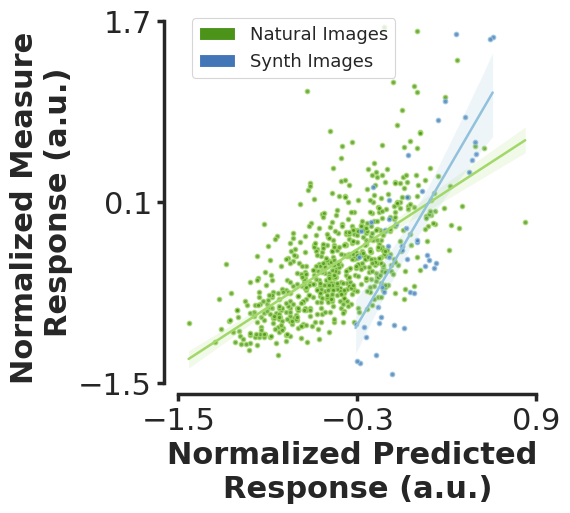

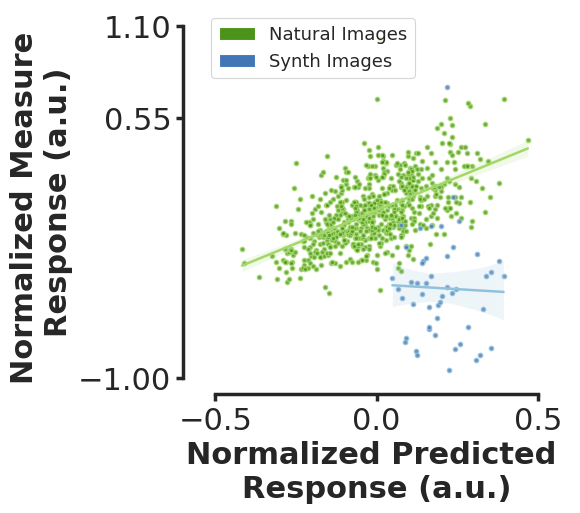

In [ ]:
fig2a()

## Fig 2b

In [ ]:

robust_model_list = [
            'resnet50_l2_eps0.01',
            'resnet50_l2_eps0.05',
            'resnet50_l2_eps5',
            'resnet50_l2_eps1',
            'resnet50_l2_eps3',
            'resnet50_l2_eps0.25',
            'resnet50_l2_eps0.5',
            'resnet50_l2_eps0.03',
            'resnet50_l2_eps0.1',
]

non_robust_model_list = model_list.copy()
for model in non_robust_model_list:
  if model in robust_model_list:
    non_robust_model_list.remove(model)
untrained_model_list=[
            'untrained_resnet101',
            'untrained_wrn50',
            'untrained_wrn101',            ]
unsup_model_list=[
            'moco',
            'clip',
            'simclr',
            'moco_wide_resnet50_4',
            'moco_resnext50_32x8d',
            'moco18','moco_wide_resnet50']
sup_model_list = [m for m in model_list if m not in unsup_model_list]

import itertools
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import skew,kurtosis
import matplotlib as mpl
from scipy import stats
import statistics
import numpy.ma as ma
import math
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from mpl_toolkits.axisartist.grid_finder import FixedLocator, MaxNLocator

def load_x_and_y(model, area, session_list,x_name,y_name,filtered):
  if model=="robust":
    model_list = robust_model_list
  if model == "unrobust":
    model_list = non_robust_model_list
    print(model_list)
  if model == "supervised":
    model_list = sup_model_list
  if model == "unsupervised":
    model_list = unsup_model_list
  if model == "trained":
    model_list = model_list
  if model == "untrained":
    model_list = untrained_model_list
  if model == "all":
    model_list = all_model_list
  group_x_data=[]
  for robust in model_list:
    if len(group_x_data)==0:
      group_x_data=with_norm_np_per_model_per_neuron(robust, area, session_list,x_name,filtered)
    else:
      group_x_data=np.vstack([group_x_data,with_norm_np_per_model_per_neuron(robust, area, session_list,x_name,filtered)])
  x=np.ma.mean(group_x_data,axis=0)
  group_y_data=[]
  for robust in model_list:
    if len(group_y_data)==0:
      group_y_data=with_norm_np_per_model_per_neuron(robust, area, session_list,y_name,filtered)
    else:
      group_y_data=np.vstack([group_y_data,with_norm_np_per_model_per_neuron(robust, area, session_list,y_name,filtered)])
  y=np.ma.mean(group_y_data,axis=0)
  return x, y

def load_x_and_y_model(area, session_list,x_name,y_name,x_model, y_model, filtered):
  if model=="robust":
    model_list = robust_model_list
  if model == "unrobust":
    model_list = non_robust_model_list
    print(model_list)
  if model == "supervised":
    model_list = sup_model_list
  if model == "unsupervised":
    model_list = unsup_model_list
  if model == "trained":
    model_list = model_list
  if model == "untrained":
    model_list = untrained_model_list
  if model == "all":
    model_list = all_model_list

  group_x_data=with_norm_np_per_model_per_neuron(x_model, area, session_list,x_name,filtered)

  group_x_data = np.clip(group_x_data, a_min=None, a_max=1)
  group_y_data=with_norm_np_per_model_per_neuron(y_model, area, session_list,y_name,filtered)
  group_y_data = np.clip(group_y_data, a_min=None, a_max=1)
  return group_x_data, group_y_data
def plot_cornerhist(model,area, session_list,model_list=None,data=None, x_name=None, y_name=None, hue=None,with_norm=True,filtered=True, paper_figure = False, scratch_figure = False):
    """Scatterplot of repeated measures with histogram of differences.

    Parameters
    ----------
    data : pandas Dataframe or None
        DataFrame. Note that this function can also directly be used as a
        Pandas method, in which case this argument is no longer needed.
    x : list, 1d array-like or string
        1d array or list of 1d array for condition plotted in the X axis. If
        a string is provided, should be the name of column containing the
        grouping variable.
    y : list, 1d array-like or string
        1d array or list of 1d array for condition plotted in the Y axis. If
        a string is provided, should be the name of column containing the
        grouping variable.
    hue : string or None
        If a string is provided, should be the name of column containing
        the grouping variable.

    Returns
    -------
    f : Matplotlib Figure instance
        The figure.
    ax : Matplotlib Axes instance
        Returns the Axes object with the plot for further tweaking.

    """
    if paper_figure or scratch_figure:
      assert paper_figure != scratch_figure
    if with_norm:
      x,y = load_x_and_y(model, area, session_list,x_name,y_name,filtered)
    else:
      x=no_norm_np(model,session_list,x_name)
      y=no_norm_np(model,session_list,y_name)
    # Security check and formatting
    if isinstance(x, np.ndarray) & isinstance(y, np.ndarray):
        xs, ys, labels = [x], [y], ['0']
    elif isinstance(data, pd.DataFrame):
        xlabel, ylabel = x, y
        if hue is not None:
            xs, ys, labels = [], [], []
            for h in data[hue].unique():
                xs.append(data[data[hue]==h][x].to_numpy())
                ys.append(data[data[hue]==h][y].to_numpy())
                labels.append(h)
        else:
            xs, ys = [data[x].to_numpy()], [data[y].to_numpy()]
            labels = ['0']
    else:
        xs, ys, labels = x, y, np.arange(0, len(x))

    palette = itertools.cycle(sns.color_palette("Set1"))

    f, ax = plt.subplots(figsize=(6, 6))

    # Set axes limit
    lim_min = np.min([xs, ys]) - (np.max([xs, ys]) - np.min([xs, ys])) * .1
    lim_max = np.max([xs, ys]) + (np.max([xs, ys]) - np.min([xs, ys])) * .2
    lim = lim_min, lim_max

    # Set hist axes size
    hist_size = math.sqrt(2)
    hist_range = hist_size * np.sqrt(2) * (lim_max - lim_min)  # Length of X axis
    plot_extents = -(lim_max - lim_min), (lim_max - lim_min), 0,  1/math.sqrt(2) # Axis extend
    transform = Affine2D().scale((np.max(x-y)+np.min(x-y))/math.sqrt(2) , 0.1).rotate_deg(-45)
    helper = floating_axes.GridHelperCurveLinear(transform, extremes=plot_extents, grid_locator1=MaxNLocator(4))
    inset = floating_axes.FloatingAxes(f, [0.1, 0.1, hist_size, hist_size], grid_helper=helper)
    bar_ax = inset.get_aux_axes(transform)

    for x, y, label in zip(xs, ys, labels):
        col = 'g'
        slope, intercept, r_value, pv, se = stats.linregress(np.array(x),np.array(y))
        ax = sns.regplot(x=np.array(x), y= np.array(y), color='g', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}, truncate=False, fit_reg = False)

        lims = [
          np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
          np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
      ]
        ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
        sns.set_style("white")
        sns.axes_style("white")
        sns.despine()

        f.subplots_adjust(right=.8, top=.8)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.tick_params(labelsize=22)

        hist, bins = np.histogram((x - y)/math.sqrt(2),  bins=20, density=True)
        sk=skew(x - y, bias=True)
        ku=kurtosis(x - y, bias=False)
        sd = statistics.stdev(x - y)
        print("sd:")
        print(sd)
        mean = statistics.mean(x - y)
        print("mean:")
        print(mean)
        print("sk: ")
        print(sk)
        # print("ku: ")
        # print(ku)
        w = bins[1] - bins[0]  # Bar width
        bar_ax.bar(bins[:-1], hist, w, alpha=.5, color=col)

    if data is not None:
        ax.set(xlabel=xlabel, ylabel=ylabel)
    else:
        ax.set_ylabel(load_label(y_name), fontsize=22, weight = "bold")
        ax.set_xlabel(load_label(x_name), fontsize=22, weight = "bold")

    if len(labels)>1:
        ax.legend()

    bar_ax.plot((0, 0), (0, hist.max()), c="0", dashes=(4, 2))
    bar_ax.set_ylim(0, 4)
    inset.axis["left"].set_visible(False)
    inset.axis["right"].set_visible(False)
    inset.axis["top"].set_visible(False)
    inset.axis["bottom"].set_visible(False)
    axis = inset.axis["bottom"]
    axis.major_ticks.set_tick_out(False)
    mu = 1
    median =2
    sigma = 3
    props = dict(boxstyle='round', facecolor='wheat', alpha=0)


    f.add_axes(inset)
    plt.xticks(fontsize=22)


    if paper_figure:
      dir = "paper_figures"
      file_name = f'neurowise_{model}_{x_name}&{y_name}'
    if scratch_figure:
      dir = f'{area}_figures'
      file_name = f'neurowise_{model}_{x_name}&{y_name}'
    if not paper_figure and not scratch_figure:
      dir = "figures"
      file_name = f'neurowise_{model}_{x_name}&{y_name}'
    path = f"/content/gdrive/MyDrive/{dir}/{file_name}.pdf"


sd:
0.27179528741248016
mean:
0.26284872208201976
sk: 
0.12925094846649793


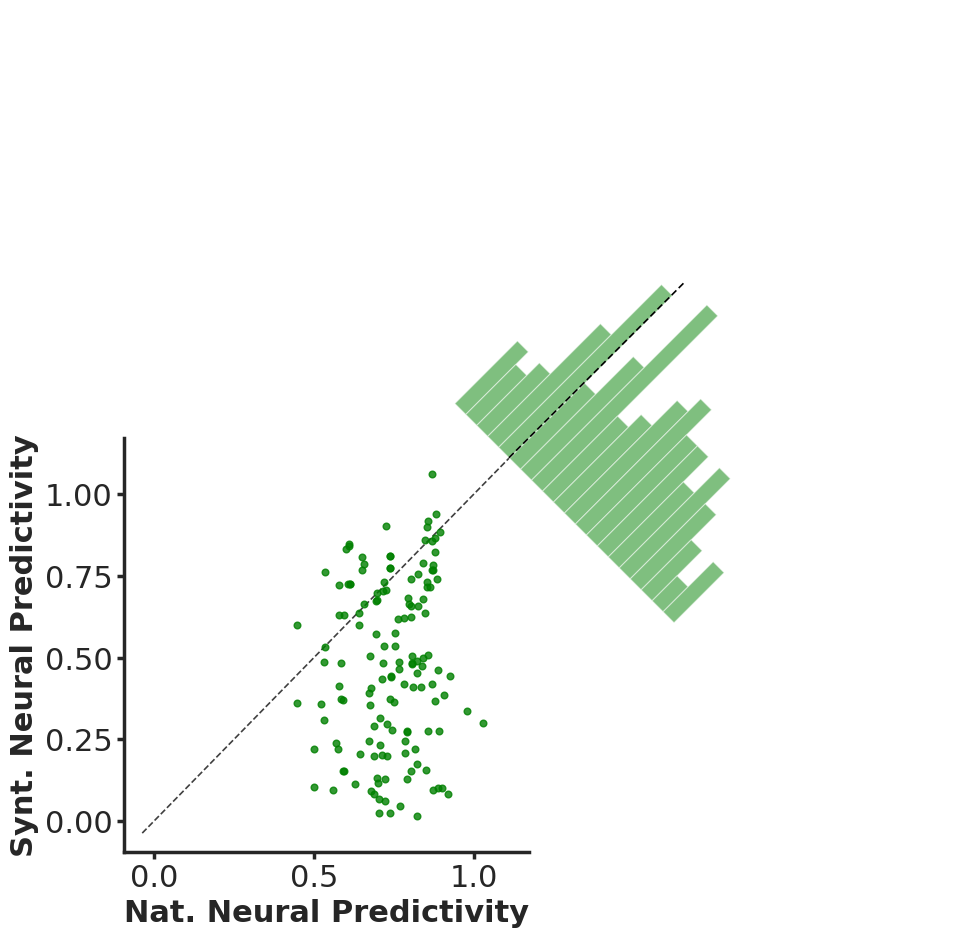

In [ ]:
plot_cornerhist("all","V4_new", session_list,x_name="ID_NP", y_name="OOD_NP",with_norm=True, paper_figure = True)

## Fig 2c

In [ ]:
def np_const_subcategorybar(X, vals, yerror, legend_list, area, file_name,width=0.65, paper_figure = False, scratch_figure = False, train_type = 'natural'):
    if train_type == "natural":
      train_type_txt_str = ''
      paper_figure_prefix = ''
    else:
      train_type_txt_str = train_type + '/'
      paper_figure_prefix = train_type + '_'
    if paper_figure or scratch_figure:
      assert paper_figure != scratch_figure
    fig, ax = plt.subplots(figsize=(20,5))
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
      if i == 0:
        barlist=ax.bar(_X - width/2. + i/float(n)*width, vals[0],
                width=width/float(n)-0.02, align="edge",label=legend_list[i],yerr=yerror[0],error_kw=dict(lw=5, capsize=5, capthick=3),color=ID_color)
      if i == 1:
        barlist=ax.bar(_X - width/2. + i/float(n)*width, vals[2],
                width=width/float(n)-0.02, align="edge",label=legend_list[i],yerr=yerror[2],error_kw=dict(lw=5, capsize=5, capthick=3),color=ID_shadow)
      if i == 2:
        barlist=ax.bar(_X - width/2. + i/float(n)*width, vals[1],
                width=width/float(n)-0.02, align="edge",label=legend_list[i],yerr=yerror[1],error_kw=dict(lw=5, capsize=5, capthick=3),color=OOD_color)
      if i == 3:
        barlist=ax.bar(_X - width/2. + i/float(n)*width, vals[3],
                width=width/float(n)-0.02, align="edge",label=legend_list[i],yerr=yerror[3],error_kw=dict(lw=5, capsize=5, capthick=3),color=OOD_shadow)

    plt.legend(bbox_to_anchor=(1.,0.05),loc="lower right", fontsize=18)
    sns.set_style("ticks")
    sns.despine()
    plt.yticks([0, 0.4, 0.8], fontsize=22)
    plt.ylabel('Neural Predictivity', fontsize=22, weight='bold')
    plt.xticks(_X, X,rotation = 45, fontsize=22)
    if paper_figure:
      dir = f"{paper_figure_prefix}paper_figures"
    if scratch_figure:
      dir = f'{area}_figures'
    if not paper_figure and not scratch_figure:
      dir = "figures"
    plt.show()

In [ ]:
from statistics import mean,variance
import seaborn as sns
def fig2c():
  benchmark_list=['ID_NP','OOD_NP','natural_consistency', 'synth_consistency']
  fig_bechmark_list = ['ID Neural Prediction', 'OOD Neural Prediction', 'ID Internal Consistency', "OOD Internal Consistency"]
  fig_session_value = ["M-S1", "M-S2", "M-S3", "M-S4", "N-S1", "S-S1", "S-S2"]
  sns.set_style("ticks")
  multi_ORA=[]
  multi_yerr = []
  ID_dict_per_session = load_dict_per_session(['st_resnet'], session_list, "ID_NP", True, per_neuron = True)
  OOD_dict_per_session = load_dict_per_session(['st_resnet'], session_list, "OOD_NP", True, per_neuron = True)
  ID_dict_var_per_session = load_dict_per_session(['st_resnet'], session_list, "ID_NP", True, per_neuron = True, variance = True)
  OOD_dict_var_per_session = load_dict_per_session(['st_resnet'], session_list, "OOD_NP", True, per_neuron = True, variance = True)
  for b in benchmark_list:
    model_multi_ORA=[]
    yerr = []
    for index, session in enumerate(session_list):
      if b == "ID_NP":
        model_multi_ORA.append(ID_dict_per_session['st_resnet'][index])
        yerr.append(ID_dict_var_per_session['st_resnet'][index])
      if b == "OOD_NP":
        model_multi_ORA.append(OOD_dict_per_session['st_resnet'][index])
        yerr.append(OOD_dict_var_per_session['st_resnet'][index])
      if b == "natural_consistency":
        natural_inter_cor=np.load(f"/content/gdrive/MyDrive/V4_old/{session}/naturalistic_inter_con.npy")
        filtered_natural_inter_con = [i for i in natural_inter_cor if i >= 0.7]
        model_multi_ORA.append(np.mean(filtered_natural_inter_con))
        yerr.append(np.var(natural_inter_cor))
      if b == "synth_consistency":
        synth_inter_cor=np.load(f"/content/gdrive/MyDrive/V4_old/{session}/synthetic_inter_con.npy")
        filtered_synth_inter_con = [i for i in synth_inter_cor if i >= 0.7]
        model_multi_ORA.append(np.mean(filtered_synth_inter_con))
        yerr.append(np.var(synth_inter_cor))
    multi_ORA.append(model_multi_ORA)
    multi_yerr.append(yerr)

  np_const_subcategorybar(fig_session_value,multi_ORA,multi_yerr,fig_bechmark_list, "V4_new","np_inter_con_demo", paper_figure = True)


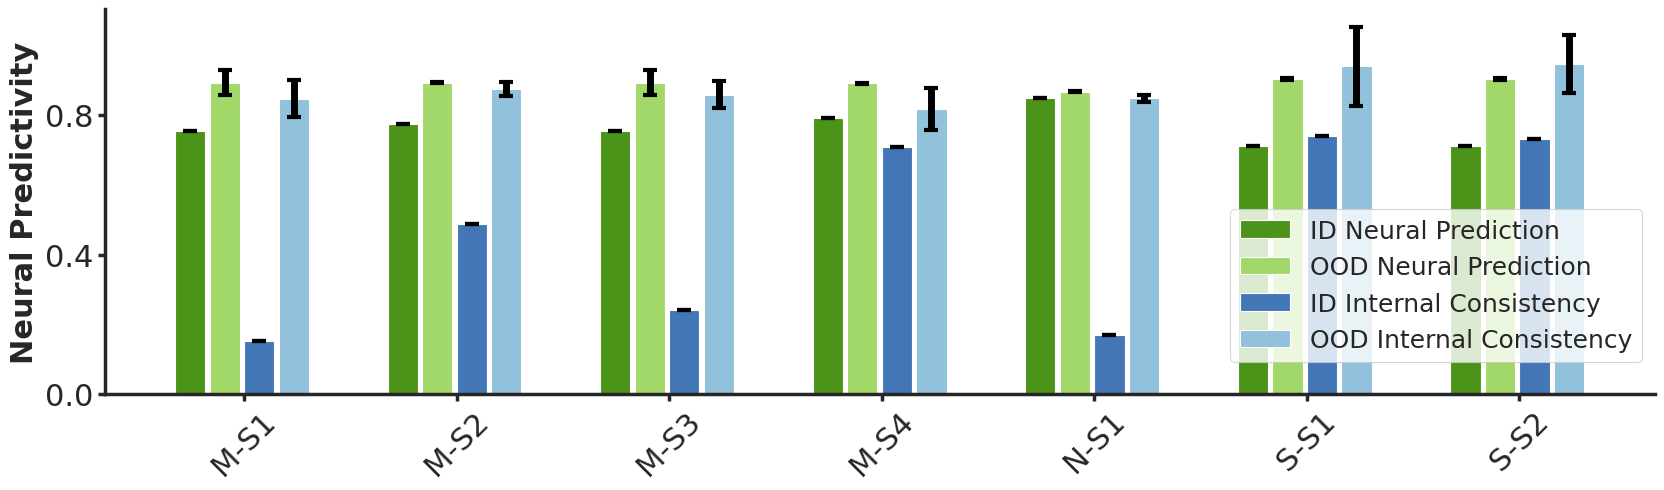

In [ ]:
fig2c()

## Fig 2d

In [ ]:
def np_gap_demo(normalized_natural_mean, normalized_natural_var, normalized_synth_mean, normalized_synth_var, normalized_gap_mean, normalized_gap_var, np_gap_demo_model_list):
  X_axis = np.arange(len(np_gap_demo_model_list))
  X_axis_list=['RN50','AlexNet','CLIP', "SimCLR", 'RN101', "ResNext 101", "deepAugment\nRN50"
              #  'CORnet-Z'
              ]
  fig, ax = plt.subplots(figsize = (15,5))
  ax.bar(X_axis - 0.2, normalized_natural_mean, 0.2, label = 'natural',yerr=normalized_natural_var, error_kw=dict(lw=5, capsize=5, capthick=3),color=ID_color)
  ax.bar(X_axis + 0, normalized_synth_mean, 0.2, label = 'synthetic',yerr=normalized_synth_var, error_kw=dict(lw=5, capsize=5, capthick=3),color=OOD_color)
  ax.bar(X_axis + 0.2, normalized_gap_mean, 0.2, label = 'gap',yerr=normalized_gap_var, error_kw=dict(lw=5, capsize=5, capthick=3),color=gap_color)
  yticks = [40/100, 80/100]
  plt.ylim([0/100, 85/100])
  plt.xticks(X_axis, X_axis_list,rotation = 45, fontsize=18)
  plt.yticks(yticks, fontsize=18)
  plt.ylabel('Neural Predictivity', fontsize=22, weight='bold')
  plt.text(-0.2, 2, 'Natural', ha='center', va='bottom', rotation=90, c='white',fontsize=18)
  plt.text(0, 2, 'Synthetic', ha='center', va='bottom', rotation=90, c='white',fontsize=18)
  plt.text(0.2, 2, 'Gap', ha='center', va='bottom', rotation=90, c='white',fontsize=18)
  sns.despine()
  plt.savefig('/content/gdrive/MyDrive/paper_figures/gap_demo.pdf',bbox_inches='tight')
  plt.show()

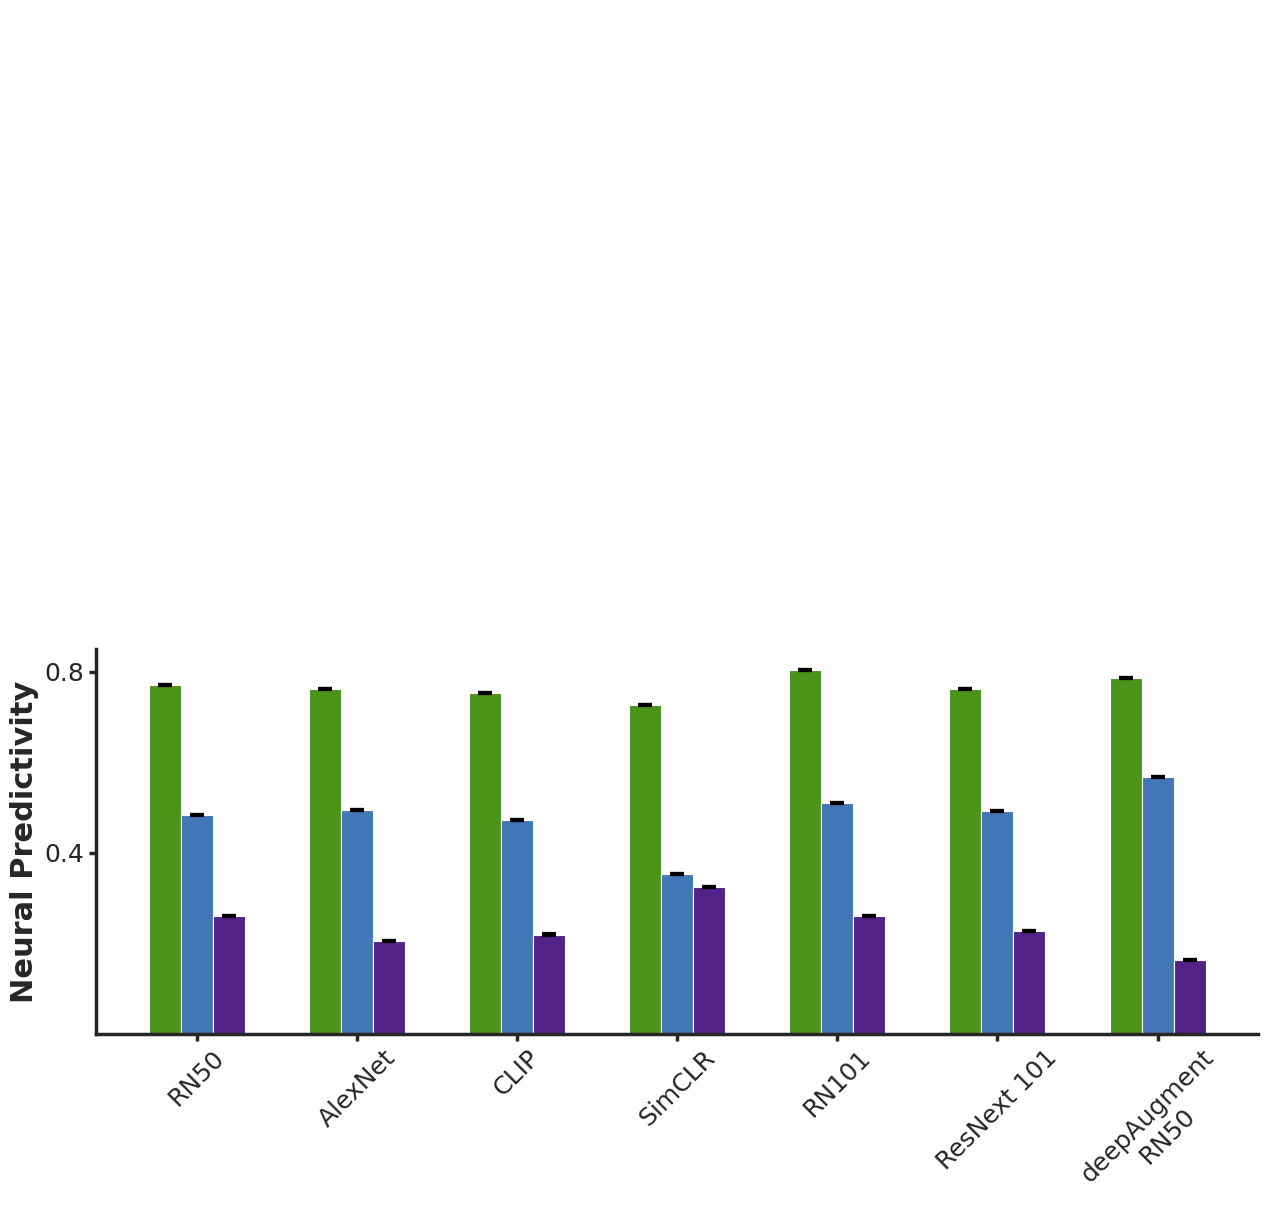

In [ ]:
from statistics import mean,variance
import matplotlib.pyplot as plt
import seaborn as sns
np_gap_demo_model_list=['st_resnet','alexnet','clip', 'simclr','resnet101', 'resnext101', 'RN50_deepAugment'
            #'CORnet-Z'
]
conf_medians_dict={}
conf_dict={}
normalized_natural_median={}
normalized_synth_median={}
normalized_gap_median={}
for m in np_gap_demo_model_list:
  m = "pls_IN_pca_" + m
  synth_hist_data=[]
  natural_hist_data=[]
  for s in session_list:
    natural_inter_cor=np.load(f"/content/gdrive/MyDrive/V4_old/{s}/naturalistic_inter_con.npy")
    synth_inter_cor=np.load(f"/content/gdrive/MyDrive/V4_old/{s}/synthetic_inter_con.npy")
    natural_neuron_corr, synth_neuron_corr = load_per_neuron_np(s, m.split("pca_")[1])
    natural_mask=fiter(natural_inter_cor,0.7)
    synth_mask=fiter(synth_inter_cor,0.7)
    if len(synth_hist_data)==0:
      synth_hist_data =masked_corrected_np(synth_mask, synth_inter_cor, synth_neuron_corr)
    else:
      synth_hist_data=np.ma.hstack([synth_hist_data,masked_corrected_np(synth_mask, synth_inter_cor, synth_neuron_corr)])
    if len(natural_hist_data)==0:
      natural_hist_data = masked_corrected_np(natural_mask, natural_inter_cor, natural_neuron_corr)

    else:
      natural_hist_data=np.ma.hstack([natural_hist_data, masked_corrected_np(natural_mask, natural_inter_cor, natural_neuron_corr)])
  gap_hist_data = natural_hist_data-synth_hist_data
  transposed_natural = natural_hist_data.transpose(1,0)
  filtered_natural_transposed = np.asarray([t for t in transposed_natural if type(t[0])!=np.ma.core.MaskedConstant])
  filtered_natural_inverse_transposed_conf = filtered_natural_transposed.transpose(1, 0)

  transposed_synth = synth_hist_data.transpose(1,0)
  filtered_synth_transposed = np.asarray([t for t in transposed_synth if type(t[0])!=np.ma.core.MaskedConstant])
  filtered_synth_inverse_transposed_conf = filtered_synth_transposed.transpose(1, 0)

  transposed_gap = gap_hist_data.transpose(1,0)
  filtered_gap_transposed = np.asarray([t for t in transposed_gap if type(t[0])!=np.ma.core.MaskedConstant])
  filtered_gap_inverse_transposed_conf = filtered_gap_transposed.transpose(1, 0)

  normalized_natural_median[m]=np.median(filtered_natural_inverse_transposed_conf,axis=1)
  normalized_synth_median[m]=np.median(filtered_synth_inverse_transposed_conf,axis=1)
  normalized_gap_median[m]=np.median(filtered_gap_inverse_transposed_conf,axis=1)
normalized_natural_mean=np.asarray([v.mean() for k, v in normalized_natural_median.items()])
normalized_synth_mean=np.asarray([v.mean() for k, v in normalized_synth_median.items()])
normalized_gap_mean=np.asarray([v.mean() for k, v in normalized_gap_median.items()])
normalized_natural_var=np.asarray([v.var() for k, v in normalized_natural_median.items()])
normalized_synth_var=np.asarray([v.var() for k, v in normalized_synth_median.items()])
normalized_gap_var=np.asarray([v.var() for k, v in normalized_gap_median.items()])

np_gap_demo(normalized_natural_mean, normalized_natural_var, normalized_synth_mean, normalized_synth_var, normalized_gap_mean, normalized_gap_var, np_gap_demo_model_list)


## Fig 2e

In [ ]:
from statistics import mean, variance, median
import seaborn as sns
def normalized_train_setting(model_list, area, session_list, filtered = True, no_pca = False):
  normalized_natural_median={}
  normalized_synth_median={}
  normalized_gap_median={}
  natural_ID_NP, natural_OOD_NP, natural_NPGG = load_all_np_measure(model_list, "V4_new", session_list,filtered,train_type = 'natural', no_pca = no_pca)
  synth_ID_NP, synth_OOD_NP, synth_NPGG = load_all_np_measure(model_list, "V4_new", session_list,filtered,train_type = 'synth', no_pca = no_pca)
  normalized_natural_median['natural'] = natural_ID_NP
  normalized_natural_median['synth'] = synth_ID_NP
  normalized_synth_median['natural'] = natural_OOD_NP
  normalized_synth_median['synth'] = synth_OOD_NP
  normalized_gap_median['natural'] = natural_NPGG
  normalized_gap_median['synth'] = synth_NPGG
  normalized_natural_mean=np.asarray([mean(v) for k, v in normalized_natural_median.items()])
  normalized_synth_mean=np.asarray([mean(v) for k, v in normalized_synth_median.items()])
  normalized_gap_mean=np.asarray([mean(v) for k, v in normalized_gap_median.items()])
  normalized_natural_var=np.asarray([variance(v) for k, v in normalized_natural_median.items()])
  normalized_synth_var=np.asarray([variance(v) for k, v in normalized_synth_median.items()])
  normalized_gap_var=np.asarray([variance(v) for k, v in normalized_gap_median.items()])


  normalized_train_setting_plot(normalized_natural_mean, normalized_synth_mean, normalized_gap_mean, normalized_natural_var, normalized_synth_var, normalized_gap_var, no_pca)


In [ ]:
def normalized_train_setting_plot(normalized_natural_mean, normalized_synth_mean, normalized_gap_mean, normalized_natural_var, normalized_synth_var, normalized_gap_var, no_pca):
  X_axis = np.arange(2)
  X_axis_list=['Train Nat.',
               'Train Syn.'
              ]

  fig, ax = plt.subplots(figsize=(5, 5))
  ax.bar(X_axis - 0.25, normalized_natural_mean, 0.25, label = 'natural',yerr=normalized_natural_var, error_kw=dict(lw=5, capsize=5, capthick=3),color=ID_color)
  ax.bar(X_axis + 0, normalized_synth_mean, 0.25, label = 'synthetic',yerr=normalized_synth_var, error_kw=dict(lw=5, capsize=5, capthick=3),color=OOD_color)
  ax.bar(X_axis + 0.25, normalized_gap_mean, 0.25, label = 'gap',yerr=normalized_gap_var, error_kw=dict(lw=5, capsize=5, capthick=3),color=gap_color)
  yticks = [-80/100, -40/100, 0, 40/100, 80/100]
  plt.ylim([-80/100, 90/100])
  plt.yticks(yticks, fontsize=18)
  plt.xticks(X_axis, X_axis_list,rotation = 45, fontsize=18)
  plt.ylabel('Neural Predictivity', fontsize=22, weight='bold')
  sns.despine()
  plt.show()

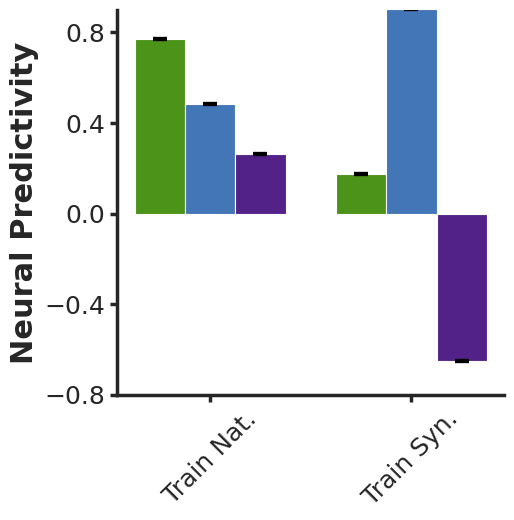

In [ ]:
normalized_train_setting(["st_resnet"], "V4_new", session_list, filtered = True, no_pca = False)

## Fig 3a

In [ ]:
import seaborn as sns
import matplotlib
import statistics
import matplotlib.patches as mpatches
layerlist=['maxpool','layer1[0]','layer1[1]','layer1[2]','layer2[0]','layer2[1]','layer2[2]','layer2[3]','layer3[0]','layer3[1]','layer3[2]','layer3[3]','layer3[4]','layer3[5]','layer4[0]','layer4[1]','layer4[2]','avgpool','fc']
cmap_ID = matplotlib.cm.get_cmap('Greens')
cmap_OOD = matplotlib.cm.get_cmap('Blues')
def single_neuron_per_layer(layerlist, session_list, train_type = 'natural'):
  if train_type == "natural":
    train_type_txt_str = ''
    paper_figure_prefix = ''
  else:
    train_type_txt_str = train_type + '/'
    paper_figure_prefix = train_type + '_'
  for session_name in session_list:
      _, ax = plt.subplots(figsize=(10,4))
      area = 'V4_new'
      inter_cons_area = 'V4_old'
      natural_inter_cor=np.load(f"/content/gdrive/MyDrive/{inter_cons_area}/{session_name}/naturalistic_inter_con.npy")
      synth_inter_cor=np.load(f"/content/gdrive/MyDrive/{inter_cons_area}/{session_name}/synthetic_inter_con.npy")
      natural_file = h5py.File(f'/content/gdrive/MyDrive/{area}/{session_name}/{train_type_txt_str}st_resnet_all_layer_natural_neuron_corr.hdf5','r')
      synth_file = h5py.File(f'/content/gdrive/MyDrive/{area}/{session_name}/{train_type_txt_str}st_resnet_all_layer_synth_neuron_corr.hdf5','r')
      natural_mask=fiter(natural_inter_cor,0.7)
      synth_mask=fiter(synth_inter_cor,0.7)
      combined_mask = np.logical_or(natural_mask, synth_mask)
      ma_natural_inter_cor=ma.masked_array(natural_inter_cor,natural_mask)
      ma_synth_inter_cor=ma.masked_array(synth_inter_cor,synth_mask)
      index_list = [i for i, x in enumerate(combined_mask) if x == False]
      total_natural_dict = {}
      total_synth_dict = {}
      for ind in index_list:

        natural_dict = {}
        synth_dict = {}
        valid_index_dict = {}


        for layer in layerlist:
            if layer not in total_natural_dict:
              total_natural_dict[layer] = []
              total_synth_dict[layer] = []
            masked_natural = ma.masked_array(natural_file[layer][:],np.ma.row_stack((natural_mask, natural_mask,natural_mask,natural_mask,natural_mask)))
            masked_synth = ma.masked_array(synth_file[layer][:],np.ma.row_stack((synth_mask, synth_mask,synth_mask,synth_mask,synth_mask)))
            normalized_natural = masked_corrected_np(natural_mask, natural_inter_cor, natural_file[layer][:])
            normalized_synth = masked_corrected_np(synth_mask, synth_inter_cor, synth_file[layer][:])
            raw_single_layer_natural_np = np.ma.mean(normalized_natural, axis = 0)
            raw_single_layer_synth_np = np.ma.mean(normalized_synth, axis = 0)
            natural_dict[layer] = raw_single_layer_natural_np[ind] if raw_single_layer_natural_np[ind] < 1 else 1
            synth_dict[layer] = raw_single_layer_synth_np[ind] if raw_single_layer_synth_np[ind] < 1 else 1

        natural_layer_names = [k.replace('[', '.').replace(']','') for k in natural_dict.keys()]
        synth_layer_names = [k.replace('[', '.').replace(']','') for k in synth_dict.keys()]
        for key,value in natural_dict.items():
          total_natural_dict[key].append(value)
        for key,value in synth_dict.items():
          total_synth_dict[key].append(value)

        sns.lineplot(ax=ax, x = natural_layer_names, y = natural_dict.values(), color =cmap_ID(index_list.index(ind)/len(index_list) + 0.05), linewidth=1.)
        sns.lineplot(ax=ax, x = synth_layer_names, y = synth_dict.values(), color = cmap_OOD(index_list.index(ind)/len(index_list) + 0.05), linewidth=1.)

      for key,value in natural_dict.items():
        total_natural_dict[key] = statistics.mean(total_natural_dict[key])
      for key,value in synth_dict.items():
        total_synth_dict[key] = statistics.mean(total_synth_dict[key])
      sns.lineplot(ax=ax, x = natural_layer_names, y = total_natural_dict.values(), color ="g", linewidth=3.)
      sns.lineplot(ax=ax, x = synth_layer_names, y = total_synth_dict.values(), color = "b", linewidth=3.)
      sns.despine()
      handles = []
      handles.append(mpatches.Patch(color = ID_color, label = "ID NP"))
      handles.append(mpatches.Patch(color = OOD_color, label = "OOD NP"))
      plt.xticks(rotation = 45, fontsize=16)
      plt.yticks([0, 0.25, 0.50, 0.75, 1.], fontsize=22)
      plt.ylim([0,1.])
      plt.legend(handles=handles, loc=(0.85, 0.8))
      plt.ylabel("Neural Predictivity", fontsize = 22, weight='bold')
      #plt.savefig(f'/content/gdrive/MyDrive/{paper_figure_prefix}paper_figures/{session_name}_neuro_across_layer.pdf',bbox_inches='tight', format='pdf')
      plt.show()


<ipython-input-38-aa6affdda55a>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_ID = matplotlib.cm.get_cmap('Greens')
<ipython-input-38-aa6affdda55a>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_OOD = matplotlib.cm.get_cmap('Blues')


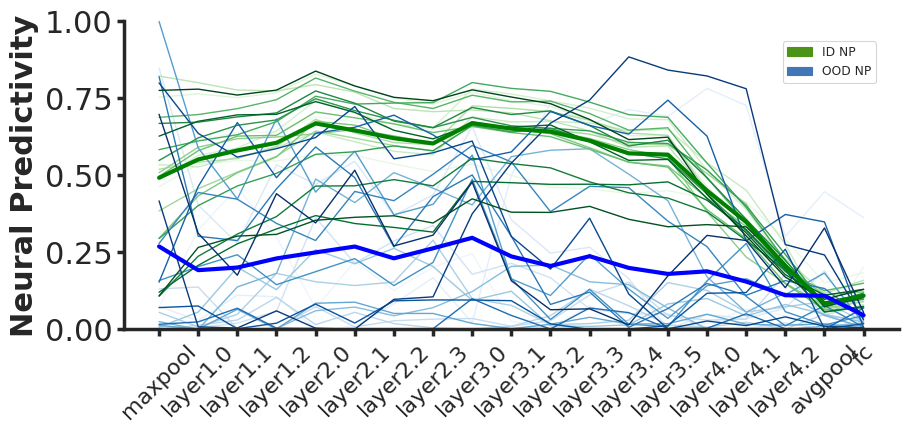

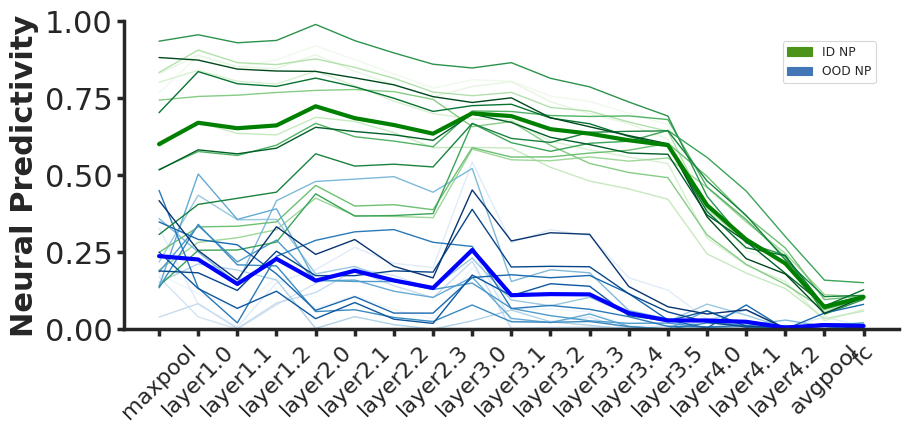

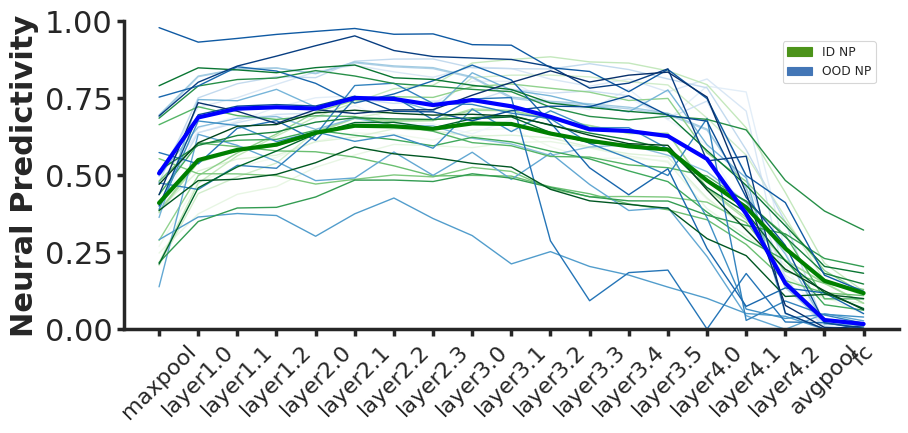

In [ ]:
fig3_session_list = ['m_ohp_session1', 'n_stretch_session1', 's_stretch_session1']

single_neuron_per_layer(layerlist, fig3_session_list)

## Fig 3b

In [ ]:
import seaborn as sns
import matplotlib.patches as mpatches
def layer_best_neuron(session_list, train_type = 'natural'):
  inter_cons_area = 'V4_old'
  if train_type == "natural":
    train_type_txt_str = ''
    paper_figure_prefix = ''
  else:
    train_type_txt_str = train_type + '/'
    paper_figure_prefix = train_type + '_'
  layerlist=['maxpool','layer1[0]','layer1[1]','layer1[2]','layer2[0]','layer2[1]','layer2[2]','layer2[3]','layer3[0]','layer3[1]','layer3[2]','layer3[3]','layer3[4]','layer3[5]','layer4[0]','layer4[1]','layer4[2]','avgpool','fc']
  processed_layerlist = [k.replace('[', '.').replace(']','') for k in layerlist]
  for session_name in session_list:
    print(session_name)
    area = 'V4_new'
    inter_cons_area = 'V4_old'
    natural_inter_cor=np.load(f"/content/gdrive/MyDrive/{inter_cons_area}/{session_name}/naturalistic_inter_con.npy")
    synth_inter_cor=np.load(f"/content/gdrive/MyDrive/{inter_cons_area}/{session_name}/synthetic_inter_con.npy")
    natural_file = h5py.File(f'/content/gdrive/MyDrive/{area}/{session_name}/{train_type_txt_str}st_resnet_all_layer_natural_neuron_corr.hdf5','r')
    synth_file = h5py.File(f'/content/gdrive/MyDrive/{area}/{session_name}/{train_type_txt_str}st_resnet_all_layer_synth_neuron_corr.hdf5','r')
    natural_mask=fiter(natural_inter_cor,0.7)
    synth_mask=fiter(synth_inter_cor,0.7)
    combined_mask = np.logical_or(natural_mask, synth_mask)
    index_list = [i for i, x in enumerate(combined_mask) if x == False]
    natural_dict = {}
    synth_dict = {}
    for layer in layerlist:
      normlized_natural = masked_corrected_np(natural_mask, natural_inter_cor, natural_file[layer][:])
      normlized_synth = masked_corrected_np(synth_mask, synth_inter_cor, synth_file[layer][:])
      single_layer_natural_np = np.ma.mean(normlized_natural, axis = 0)
      single_layer_synth_np = np.ma.mean(normlized_synth, axis = 0)
      for index, n in enumerate(single_layer_natural_np):
        if index in index_list:
          if index not in natural_dict:
            natural_dict[index] = (n,layer)
          else:
            if natural_dict[index][0]< n:
              natural_dict[index] = (n,layer)

      for index, n in enumerate(single_layer_synth_np):
        if index in index_list:
          if index not in synth_dict:
            synth_dict[index] = (n,layer)
          else:
            if synth_dict[index][0] < single_layer_synth_np[index]:
              synth_dict[index] = (single_layer_synth_np[index],layer)
    natural_layer_to_count = {}
    synth_layer_to_count = {}

    for layer in layerlist:
      natural_layer_to_count[layer] = 0
      synth_layer_to_count[layer] = 0

    for k, v in synth_dict.items():
        synth_layer_to_count[v[1]] = synth_layer_to_count[v[1]] + 1

    for k, v in natural_dict.items():
        natural_layer_to_count[v[1]] = natural_layer_to_count[v[1]] + 1
    _, ax = plt.subplots(figsize=(10,4))
    sns.lineplot(x = processed_layerlist, y = natural_layer_to_count.values(), color = ID_color, marker='.', markersize = 20, linewidth=2.5)
    sns.lineplot(x = processed_layerlist, y = synth_layer_to_count.values(), color = OOD_color, marker='.', markersize = 20, linewidth=2.5)
    sns.despine()
    handles = []
    handles.append(mpatches.Patch(color = ID_color, label = "ID NP"))
    handles.append(mpatches.Patch(color = OOD_color, label = "OOD NP"))
    plt.xticks(rotation = 45, fontsize=18)
    plt.yticks(np.arange(0, max(list(synth_layer_to_count.values()) + list(natural_layer_to_count.values())) + 1, max(list(synth_layer_to_count.values()) + list(natural_layer_to_count.values()))//2), fontsize = 18)
    plt.ylabel("Number Of Neurons", fontsize = 18, weight = 'bold')
    plt.legend(handles=handles)
    sns.despine(trim=True)
    plt.tight_layout()
    #plt.savefig(f'/content/gdrive/MyDrive/{paper_figure_prefix}paper_figures/new_{session_name}_layer_best_neurons.pdf',bbox_inches='tight')
    plt.show()


m_ohp_session1


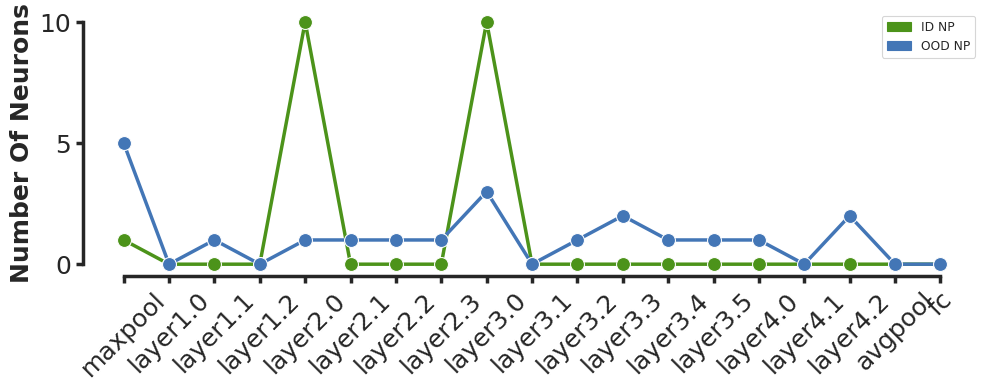

n_stretch_session1


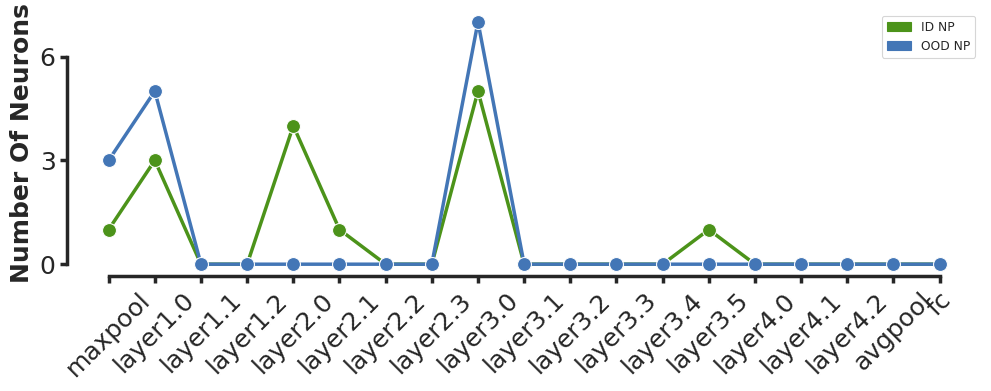

s_stretch_session1


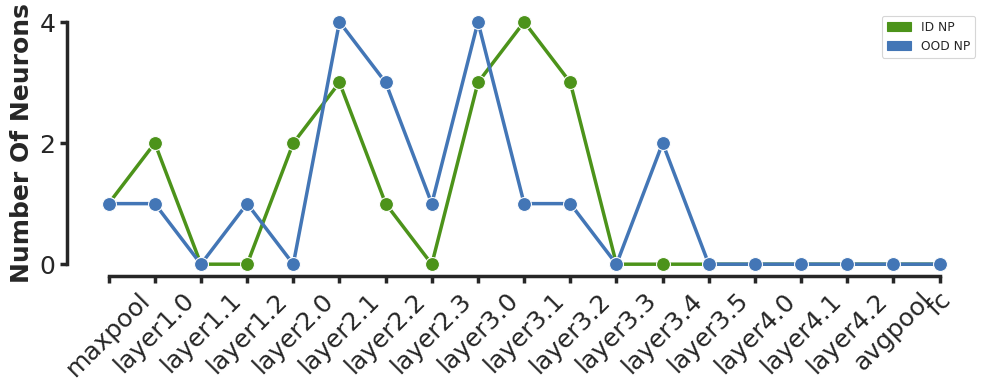

In [ ]:
layer_best_neuron(fig3_session_list)

## Fig 3c

In [ ]:
def delta_layer_hist(model_type, session_list, train_type = 'natural'):
  if train_type == "natural":
    train_type_txt_str = ''
    paper_figure_prefix = ''
  else:
    train_type_txt_str = train_type + '/'
    paper_figure_prefix = train_type + '_'
  layerlist=['maxpool','layer1[0]','layer1[1]','layer1[2]','layer2[0]','layer2[1]','layer2[2]','layer2[3]','layer3[0]','layer3[1]','layer3[2]','layer3[3]','layer3[4]','layer3[5]','layer4[0]','layer4[1]','layer4[2]','avgpool','fc']
  layer_name_to_index_dict = {}
  for i,k in enumerate(layerlist):
    layer_name_to_index_dict[k] = i
  _, ax = plt.subplots(figsize=(10,4))
  delta_layer_list = []
  for session_name in session_list:
    # print(session_name)

    area = 'V4_per_neuron'
    inter_cons_area = 'V4_old'
    natural_inter_cor=np.load(f"/content/gdrive/MyDrive/{inter_cons_area}/{session_name}/naturalistic_inter_con.npy")
    synth_inter_cor=np.load(f"/content/gdrive/MyDrive/{inter_cons_area}/{session_name}/synthetic_inter_con.npy")
    natural_file = h5py.File(f'/content/gdrive/MyDrive/{area}/{session_name}/{train_type_txt_str}{model_type}_all_layer_natural_neuron_corr.hdf5','r')
    synth_file = h5py.File(f'/content/gdrive/MyDrive/{area}/{session_name}/{train_type_txt_str}{model_type}_all_layer_synth_neuron_corr.hdf5','r')
    natural_mask=fiter(natural_inter_cor,0.7)
    synth_mask=fiter(synth_inter_cor,0.7)
    combined_mask = np.logical_or(natural_mask, synth_mask)
    ma_natural_inter_cor=ma.masked_array(natural_inter_cor,natural_mask)
    ma_synth_inter_cor=ma.masked_array(synth_inter_cor,synth_mask)
    index_list = [i for i, x in enumerate(combined_mask) if x == False]
    # if session_name == 'm_ohp_session1':
    #   print(index_list)
    for ind in index_list:

      natural_dict = {}
      synth_dict = {}
      valid_index_dict = {}


      for layer in layerlist:
          normalized_natural = masked_corrected_np(natural_mask, natural_inter_cor, natural_file[layer][:])
          normalized_synth = masked_corrected_np(synth_mask, synth_inter_cor, synth_file[layer][:])
          raw_single_layer_natural_np = np.ma.mean(normalized_natural, axis = 0)
          raw_single_layer_synth_np = np.ma.mean(normalized_synth, axis = 0)
          natural_dict[layer] = raw_single_layer_natural_np[ind] if raw_single_layer_natural_np[ind] < 1 else 1
          synth_dict[layer] = raw_single_layer_synth_np[ind] if raw_single_layer_synth_np[ind] < 1 else 1
      max_natural_layer = max(natural_dict, key=natural_dict.get)
      max_synth_layer = max(synth_dict, key=synth_dict.get)
      max_natural_layer_index = layer_name_to_index_dict[max_natural_layer]
      max_synth_layer_index = layer_name_to_index_dict[max_synth_layer]
      delta_layer = max_natural_layer_index - max_synth_layer_index
      delta_layer_list.append(delta_layer)
  sns.histplot(delta_layer_list)
  sns.despine()
  plt.xticks(fontsize=16)
  plt.yticks(fontsize = 18)
  plt.axvline(x=mean(delta_layer_list),
        color='blue',
        ls='--',
        lw=2.5)
  ax.yaxis.set_major_locator(plt.MultipleLocator(10))
  plt.ylabel("Num. Of Neurons", fontsize = 22, weight='bold')
  plt.xlabel("Δ Layers", fontsize = 22, weight='bold')
  plt.savefig(f'/content/gdrive/MyDrive/paper_figures/{model_type}_delta_hist.pdf',bbox_inches='tight', format='pdf')

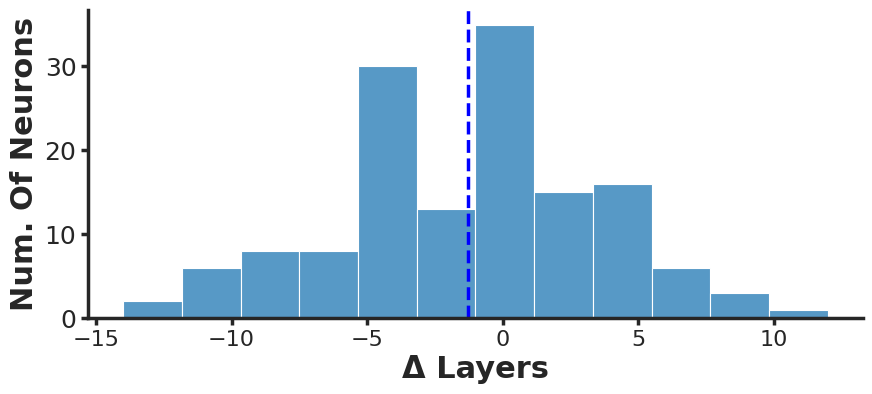

In [ ]:
delta_layer_hist('st_resnet',session_list)

## Fig 3d

In [ ]:
def connection_plot(only_increase, model_list):
  print("ML")
  ID_per_neuron_dict = load_dict(model_list,"V4_new",session_list, "ID_NP",filtered=True, synth_best = False, train_type = 'natural')
  # ID_per_neuron_dict = csv_reader('ID_NP_per_neruon_dict.csv')
  print(ID_per_neuron_dict)
  print("SL")
  ID_per_layer_dict = load_dict(model_list,"V4_new",session_list, "ID_NP",filtered=True, synth_best = True, train_type = 'natural')
  # ID_per_layer_dict = csv_reader('ID_NP_per_layer_dict.csv')
  print(ID_per_layer_dict)
  print("ML")
  OOD_per_neuron_dict = load_dict(model_list,"V4_new",session_list, "OOD_NP",filtered=True, synth_best = False, train_type = 'natural')
  print(OOD_per_neuron_dict)
  print("SL")
  OOD_per_layer_dict = load_dict(model_list,"V4_new",session_list, "OOD_NP",filtered=True, synth_best = True, train_type = 'natural')
  #OOD_per_layer_dict = csv_reader('per_layer_dict.csv')

  print(OOD_per_layer_dict)
  print("total length")
  print(len(OOD_per_layer_dict))
  if (only_increase):
    increase_keys = [key for key in OOD_per_neuron_dict if OOD_per_neuron_dict[key] > OOD_per_layer_dict[key]]
    ID_per_neuron_dict = {key: ID_per_neuron_dict[key] for key in increase_keys if key in ID_per_neuron_dict}
    ID_per_layer_dict = {key: ID_per_layer_dict[key] for key in increase_keys if key in ID_per_layer_dict}
    OOD_per_neuron_dict = {key: OOD_per_neuron_dict[key] for key in increase_keys if key in OOD_per_neuron_dict}
    OOD_per_layer_dict = {key: OOD_per_layer_dict[key] for key in increase_keys if key in OOD_per_layer_dict}
    print(len(increase_keys))

  _, ax = plt.subplots(figsize=(4,5))
  for i,key in enumerate(ID_per_neuron_dict):
    sns.lineplot(x = [1, 1.5], y = [ID_per_layer_dict[key] / 100., ID_per_neuron_dict[key] / 100.], color = ID_color, marker = "o", markersize=10, linewidth=1.)
  for i,key in enumerate(OOD_per_neuron_dict):
    sns.lineplot(x = [2.5, 3.], y = [OOD_per_layer_dict[key] / 100., OOD_per_neuron_dict[key] / 100.], color = OOD_color, marker = "o", markersize=10, linewidth=1.)
  plt.ylim(0.3, 0.9)
  plt.xlim(0.5, 3.2)
  plt.xticks([0.5, 1, 1.5, 2.5, 3], ['', 'SL', 'ML', 'SL', 'ML'], fontsize=22, rotation=45)
  plt.ylabel('Neural Predictivity', fontsize=22, weight='bold')
  ylocs, ylabels = plt.yticks()
  plt.yticks(np.arange(ylocs[0], ylocs[-1], 0.2), fontsize=22)
  sns.despine()
  plt.tight_layout()
 # plt.savefig(f'/content/gdrive/MyDrive/paper_figures/connection_plot.pdf')
  #print(stats.ttest_rel(list(OOD_per_neuron_dict.values()), list(OOD_per_layer_dict.values())))
  plt.show()

ML
{'st_resnet': 75.34396766551755, 'moco': 74.02958175009103, 'clip': 74.82594013859331, 'simclr': 70.51519157400347, 'linf_8': 78.21021925276102, 'linf_4': 81.28522371658467, 'l2_3': 82.25721666681615, 'resnext101': 74.32107766460321, 'wsl_resnext101': 72.63784451711359, 'resnet101': 79.70006459209968, 'wide_resnet50': 75.52348515111763, 'wide_resnet101': 77.92233108794002, 'CORnet-S': 73.63525804877322, 'CORnet-Z': 76.3441607797281, 'VOneCORnet-S': 73.95636680087082, 'alexnet': 75.24813222146207, 'resnet18': 68.46032863582516, 'resnet50_l2_eps0.01': 76.75794431833761, 'resnet50_l2_eps0.05': 76.87655233062432, 'resnet50_l2_eps5': 80.04616737353795, 'resnet50_l2_eps1': 83.97279870385255, 'resnet50_l2_eps3': 81.61457332384012, 'resnet50_l2_eps0.25': 82.42619815073688, 'resnet50_l2_eps0.5': 82.77804129151191, 'resnet50_l2_eps0.03': 75.70538141455664, 'resnet50_l2_eps0.1': 80.38385777578816, 'resnet50_trained_on_SIN': 76.15370076740491, 'resnet50_trained_on_SIN_and_IN': 75.46309871956227

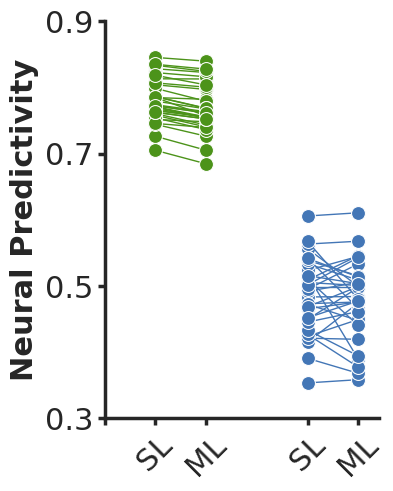

In [ ]:
connection_plot(False,model_list)

## Fig 4b

In [ ]:
from matplotlib.patches import Patch

def sorted_subcategorybar(X, vals, legend_list, area, file_name, multi_ORA, width=0.8, paper_figure = False, scratch_figure = False, train_type = 'natural'):
  dataset_color_dict = {"ImageNet":"red", "ImageNet-A":"blue", "ImageNet-R":"green", "ImageNet-Sketch":"black", "ImageNet-C":"yellow"}
  if train_type == "natural":
    train_type_txt_str = ''
    paper_figure_prefix = ''
  else:
    train_type_txt_str = train_type + '/'
    paper_figure_prefix = train_type + '_'

  if paper_figure or scratch_figure:
    assert paper_figure != scratch_figure
  legend_elements = []
  for d in dataset_color_dict:
    legend_elements.append(Patch(facecolor=dataset_color_dict[d],label=d))
  print("multi_ORA.shape")
  print(multi_ORA)
  sorted_bars = sortAccBars (multi_ORA)
  print("sorted_bars.shape")
  print(sorted_bars)
  sorted_vals = []
  sorted_labels = []
  sorted_colors = []
  for t in sorted_bars:
    single_sorted_vals = []
    single_sorted_labels = []
    single_sorted_colors = []
    for item in t:
      single_sorted_vals.append(item[0])
      single_sorted_labels.append(item[1])
      if (item[1] == "ImageNet"):
        single_sorted_colors.append("red")
      if (item[1] == "ImageNet-A"):
        single_sorted_colors.append("blue")
      if (item[1] == "ImageNet-R"):
        single_sorted_colors.append("green")
      if (item[1] == "ImageNet-Sketch"):
        single_sorted_colors.append("black")
      if (item[1] == "ImageNet-C"):
        single_sorted_colors.append("yellow")


    sorted_vals.append(single_sorted_vals)
    sorted_colors.append(single_sorted_colors)
    sorted_labels.append(single_sorted_labels)


  fig, ax = plt.subplots(figsize=(20,5))
  n = len(vals)

  _X = np.arange(len(X))
  for i in range(n):
    barlist=ax.bar(_X - width/2. + i/float(n)*width, sorted_vals[i],
            width=width/float(n),
            align="edge",
            label=sorted_labels[i],
            color = sorted_colors[i])
  plt.legend(handles=legend_elements, bbox_to_anchor=(1,1), loc='upper center')
  sns.axes_style("ticks")
  sns.despine()
  yticks = list(range(0,90,20))
  plt.yticks(yticks, fontsize=18)
  plt.ylabel('Accuracy (%)', fontsize=22, weight='bold')
  plt.xticks(_X, X, fontsize=18)

  if paper_figure:
    dir = f"{paper_figure_prefix}paper_figures"
  if scratch_figure:
    dir = f'{area}_figures'
  if not paper_figure and not scratch_figure:
    dir = "figures"
  # path = f"/content/gdrive/MyDrive/{dir}/{file_name}.pdf"
  # plt.savefig(path,bbox_inches='tight')
import collections
def sortAccBars (multi_ORA):
  multi=[]
  for i in range(len(multi_ORA)):
    multi.append([])
  # 3 is the length of model list
  # length of multi_ORA is # of benchmarks
  for i in range(len(multi_ORA[0])):
    model_benchmark = {}
    for j,acc in enumerate(multi_ORA):
      if (isinstance(acc[i], np.ndarray)):
        model_benchmark[acc[i].item()] = dataset[j]
      else:
        model_benchmark[acc[i]] = dataset[j]
    od = collections.OrderedDict((model_benchmark.items()))
    for k in range(len(od.items())):
      multi[k].append(list(od.items())[k])
  return multi

In [ ]:
import seaborn as sns
def fig4b(dataset):
  gap_demo_model_list=['st_resnet',
                      'CORnet-S','resnext101', 'resnet18','resnet50_trained_on_SIN']
  multi_ORA=[]
  for d in dataset:
    model_multi_ORA=[]
    for m in gap_demo_model_list:
      if(d=='ImageNet'):
        model_multi_ORA.append(imagenet_dict[m])
      if d=="ImageNet-R":
        model_multi_ORA.append((np.load(f'/content/gdrive/MyDrive/model_OOD_acc/imagenet-r/{m}.npy',allow_pickle=True)))
      if d=="ImageNet-A":
        model_multi_ORA.append((np.load(f'/content/gdrive/MyDrive/model_OOD_acc/imagenet-a/{m}_accuracy.npy',allow_pickle=True)))
      if d=="ImageNet-Sketch":
        model_multi_ORA.append(((np.load(f'/content/gdrive/MyDrive/model_OOD_acc/sketch/{m}_accuracy.npy',allow_pickle=True)))[0])
      if d=="ImageNet-C":
        model_multi_ORA.append(100-((np.load(f'/content/gdrive/MyDrive/imagenet-C/imagenet-c_acc/{m}_accuracy.npy',allow_pickle=True))))
    multi_ORA.append(model_multi_ORA)
  fig_model_list=['RN50','CORnet-S', 'ResNext101','RN18',

                  'RN50 (Sty. Imagenet)'
  ]

  sorted_subcategorybar(fig_model_list,multi_ORA,dataset,"V4_new", "OR_gap_demo", paper_figure = True, multi_ORA = multi_ORA)

multi_ORA.shape
[[75.2, 73.1, 79.31, 69.8, 60.18], [array(36.05865063), array(8.43), array(42.56227283), array(33.05666667), array(40.08333333)], [array(0.), array(0.71), array(10.7355), array(1.1426), array(2.2138)], [24.09165, 21.566546797932755, 29.43465, 20.22834, 30.05561065673828], [38.342827558517456, 35.09628772735596, 47.71392345428467, 33.043140172958374, 39.79104161262512]]
sorted_bars.shape
[[(75.2, 'ImageNet'), (73.1, 'ImageNet'), (79.31, 'ImageNet'), (69.8, 'ImageNet'), (60.18, 'ImageNet')], [(36.058650630088856, 'ImageNet-R'), (8.43, 'ImageNet-R'), (42.56227283337224, 'ImageNet-R'), (33.056666666666665, 'ImageNet-R'), (40.08333333333333, 'ImageNet-R')], [(0.0, 'ImageNet-A'), (0.71, 'ImageNet-A'), (10.7355, 'ImageNet-A'), (1.1426, 'ImageNet-A'), (2.2138, 'ImageNet-A')], [(24.09165, 'ImageNet-Sketch'), (21.566546797932755, 'ImageNet-Sketch'), (29.43465, 'ImageNet-Sketch'), (20.22834, 'ImageNet-Sketch'), (30.05561065673828, 'ImageNet-Sketch')], [(38.342827558517456, 'ImageN

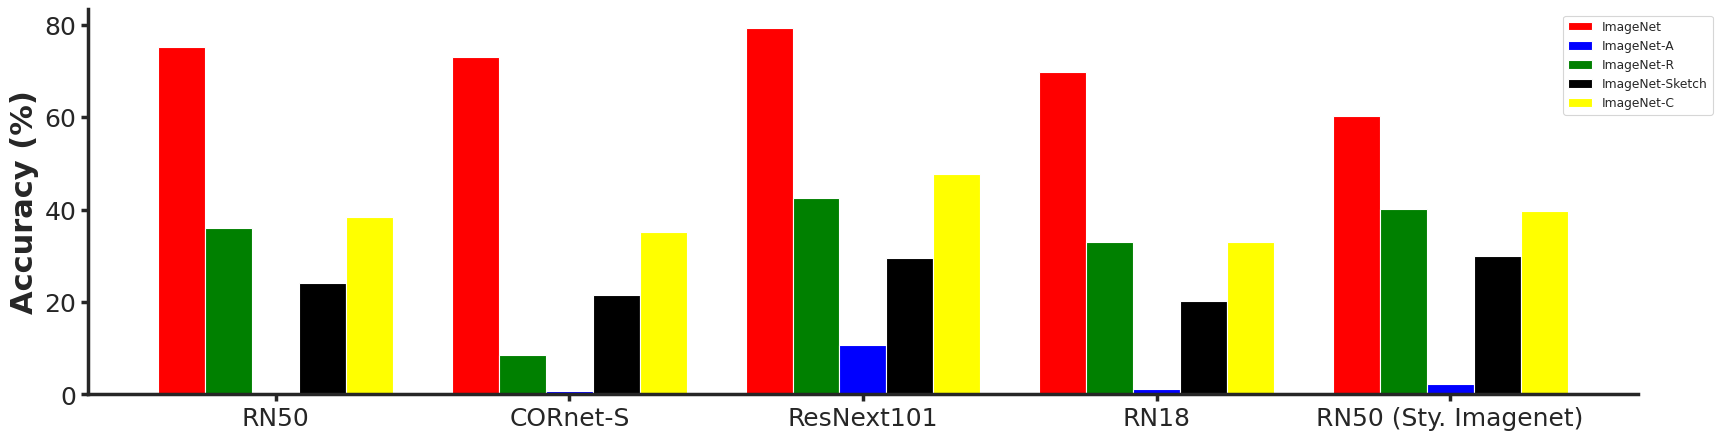

In [ ]:
fig4b(dataset)

## Fig 4c

In [ ]:
import math
def roundup_to_multiple(number, multiple):
    return multiple * math.ceil(number / multiple)

def rounddown_to_multiple(number, multiple):
    return (multiple) * math.floor(number / multiple)

In [ ]:
from numpy.core.numeric import array_equal
from statistics import mean, median
import pandas as pd
from scipy import stats
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from scipy import stats
"""
x: x-axis, choose one from ["ID_NP","OOD_NP","NPGG","IN_acc","OOD_acc","imagenet-c_acc","imagenet-a_acc","imagenet-r_acc","imagenet-s_acc","OOD_gg","imagenet-c_gg","imagenet-a_gg","imagenet-r_gg","imagenet-s_gg","adv_acc","adv_gg"]
y: y-axis, choose one from ["ID_NP","OOD_NP","NPGG","IN_acc","OOD_acc","imagenet-c_acc","imagenet-a_acc","imagenet-r_acc","imagenet-s_acc","OOD_gg","imagenet-c_gg","imagenet-a_gg","imagenet-r_gg","imagenet-s_gg","adv_acc","adv_gg"]
remark: remark used in the plots save names. By default is an empty string
text: whether to label the certain points or not. By default is True. (Should be set to False when model list is robust model list)
calib_dict: used to manually adjust the position of text labels, when the labels overlapped with others. Usage:{Label_name:(distances shift in x_axis, distances shift in y_axis)}. Example: {"CLIP-RN50":(-4,-2)}
"""

def cor_plot(model_list,session_list, x, y, area, remark="",filtered=True,text=True, paper_fig = False, calib_dict=None, cka = False, train_type = 'natural', per_neuron = True):

  if train_type == "natural":
    train_type_txt_str = ''
    paper_figure_prefix = ''
  else:
    train_type_txt_str = train_type + '/'
    paper_figure_prefix = train_type + '_'
  robust_models = [
            'st_resnet',
            'resnet50_l2_eps0.01',
            'resnet50_l2_eps0.05',
            'resnet50_l2_eps5',
            'resnet50_l2_eps1',
            'resnet50_l2_eps3',
            'resnet50_l2_eps0.25',
            'resnet50_l2_eps0.5',
            'resnet50_l2_eps0.03',
            'resnet50_l2_eps0.1']
  if x == 'eps':
    model_list = robust_models
  if cka:
    x_dict=load_cka_dict(model_list,session_list, x,filtered)
    y_dict=load_cka_dict(model_list,session_list, y,filtered)
  elif "V4" in area:
    x_dict=load_dict(model_list,area, session_list, x,filtered, per_neuron,  train_type)
    y_dict=load_dict(model_list,area, session_list, y,filtered, per_neuron, train_type)
  else:
    print("load IT")
    x_dict=load_IT_dict(model_list,area, session_list, x,filtered)
    y_dict=load_IT_dict(model_list,area, session_list, y,filtered)
  dataframe=pd.DataFrame({'name':np.array(list(x_dict.keys())),'x': np.array([x / 100 for x in list(x_dict.values())]), 'y': np.array([y / 100 for y in list(y_dict.values())])})
  if y =="ID_NP":
    color=ID_color
    shadow_color=ID_shadow

  elif y =="OOD_NP":
    color=OOD_color
    shadow_color=OOD_shadow
  elif y =="NPGG":
    color=gap_color
    shadow_color=gap_shadow
  else:
    color='g'
    shadow_color='g'
  dataframe['color']=color



  spearmanR = stats.spearmanr(np.array(list(x_dict.values())), np.array(list(y_dict.values())))

  pearsonR = stats.pearsonr(np.array(list(x_dict.values())), np.array(list(y_dict.values())))
  r_value = getattr(spearmanR, 'correlation')
  pv = getattr(spearmanR, 'pvalue')

  yaxis_min = rounddown_to_multiple(min(list(y_dict.values())), 3)
  yaxis_max = roundup_to_multiple(max(list(y_dict.values())), 3)
  xaxis_min = rounddown_to_multiple(min(list(x_dict.values())), 3)
  xaxis_max = roundup_to_multiple(max(list(x_dict.values())), 3)
  y_range = (yaxis_max+1 - yaxis_min)
  x_range = (xaxis_max+1 - xaxis_min)
  yticks = [y / 100 for y in list(range(yaxis_min, yaxis_max+1, y_range//3))]
  xticks = [x / 100 for x in list(range(xaxis_min, xaxis_max+1, x_range//3))]

  _, ax = plt.subplots(figsize=(5,5))
  if x == 'eps':
    ax.set_xscale('log')
  else:
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  if text==True:
    dataframe.loc[dataframe.name == "st_resnet", 'color'] = "r"
    dataframe.loc[dataframe.name == "resnet50_l2_eps0.01", 'color'] = "r"
    dataframe.loc[dataframe.name == "resnet50_l2_eps0.05", 'color'] = "r"
    dataframe.loc[dataframe.name == "resnet50_l2_eps5", 'color'] = "r"
    dataframe.loc[dataframe.name == "resnet50_l2_eps1", 'color'] = "r"
    dataframe.loc[dataframe.name == "resnet50_l2_eps3", 'color'] = "r"
    dataframe.loc[dataframe.name == "resnet50_l2_eps0.25", 'color'] = "r"
    dataframe.loc[dataframe.name == "resnet50_l2_eps0.5", 'color'] = "r"
    dataframe.loc[dataframe.name == "resnet50_l2_eps0.03", 'color'] = "r"
    dataframe.loc[dataframe.name == "resnet50_l2_eps0.1", 'color'] = "r"
    model_names=robust_models
    model_names.append("st_resnet")
    model_names_map={}
    for rm in model_names:
      model_names_map[rm]=rm
    for model_name in model_names:
      if calib_dict is not None and model_name in calib_dict:
        ax.text(x_dict[model_names_map[model_name]]+calib_dict[model_name][0], y_dict[model_names_map[model_name]]+calib_dict[model_name][1], model_name, weight='bold')
      else:

        ax.text(x_dict[model_names_map[model_name]] / 100 +0.002, y_dict[model_names_map[model_name]]/ 100 +0.002, model_name)
  sns.regplot(ax = ax, data=dataframe,x=np.array([x/100 for x in list(x_dict.values())]), y= np.array([y/100 for y in list(y_dict.values())]), color=shadow_color,scatter_kws={'facecolors':dataframe['color'], 's': 30}, fit_reg = x != "eps")


  sns.despine()
  ax.set_ylabel(load_label(y), fontsize=22, weight='bold')
  ax.set_xlabel(load_label(x), fontsize=22, weight='bold')
  props = dict(boxstyle='round', facecolor='wheat', alpha=0)
  print(pv)
  if pv<0.05:
    textstr = '\n'.join((
        r'r = %.2f' % (r_value, ),
        r'$p =%.2f$' % (pv, )))
  else:
    textstr = '\n'.join((
        r'r = %.2f' % (r_value, ),
        r'$p > %.2f$' % (0.05, )))
  ax.text(0.05, 0.95, textstr, transform=ax.transAxes,fontsize=20,
          verticalalignment='top',horizontalalignment='left', bbox=props)
  plt.yticks(fontsize=22)
  plt.xticks(fontsize=22)
  plt.yticks(yticks)
  plt.xticks(xticks)
  sns.despine(trim=True)
  if paper_fig == True:
    dir = f"{paper_figure_prefix}paper_figures"
  elif paper_fig == True and area == "IT":
    dir = "IT_figures"
  elif area == "V4_new":
    dir = "V4_new_figures"
  else:
    dir = "figures"
  if cka == True:
    remark = "cka"
  #plt.savefig(f'/content/gdrive/MyDrive/{dir}/{remark}{x}&{y}.pdf',bbox_inches='tight')
  plt.show()
  return ""

0.06538137022809824


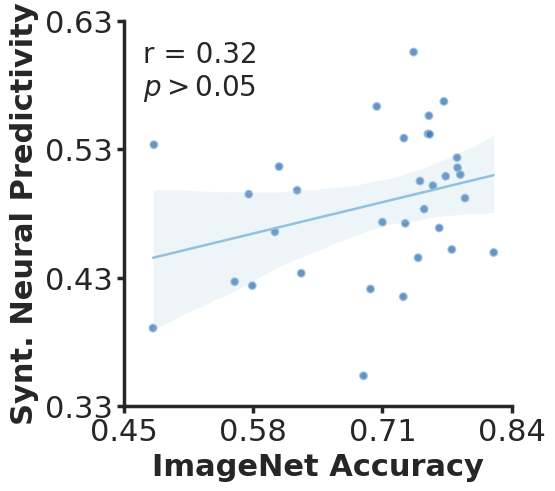

0.48941419410196607


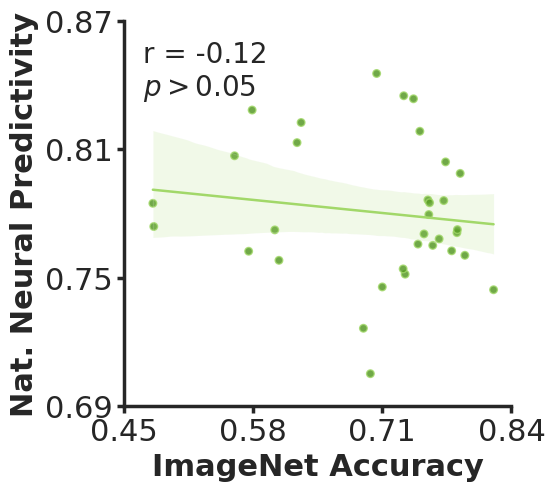

''

In [ ]:
# 1st column
cor_plot(model_list, session_list, "IN_acc", "OOD_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, per_neuron = True, remark = "")
cor_plot(model_list, session_list, "IN_acc", "ID_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, per_neuron = True, remark = "")

0.18617014332469822


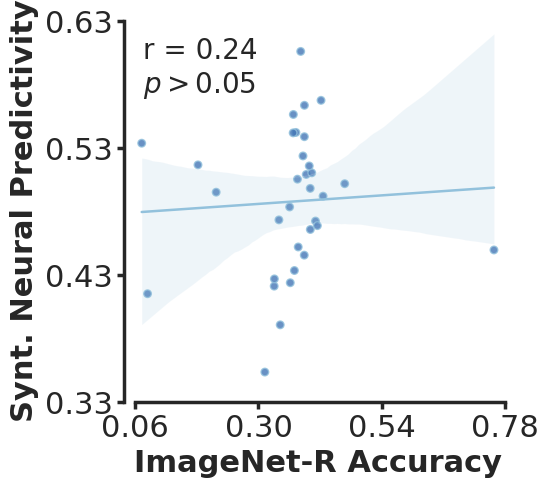

0.48473134590697164


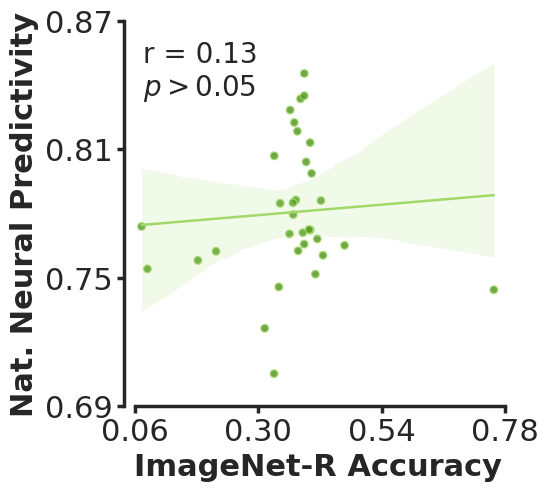

''

In [ ]:
# 2nd column
cor_plot(model_list, session_list, "imagenet-r_acc", "OOD_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, per_neuron = True, remark = "")
cor_plot(model_list, session_list, "imagenet-r_acc", "ID_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, per_neuron = True, remark = "")

0.6272364166021174


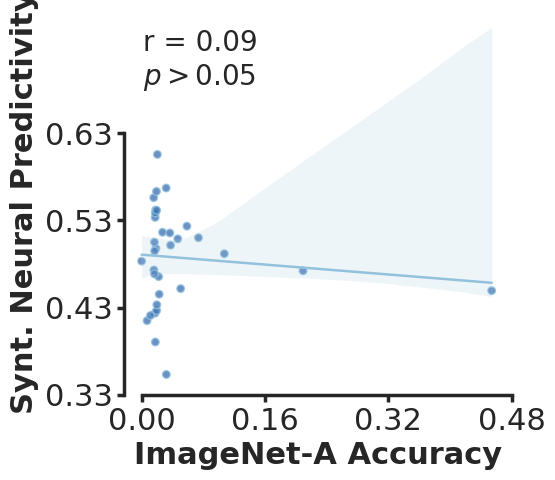

0.5058772717067954


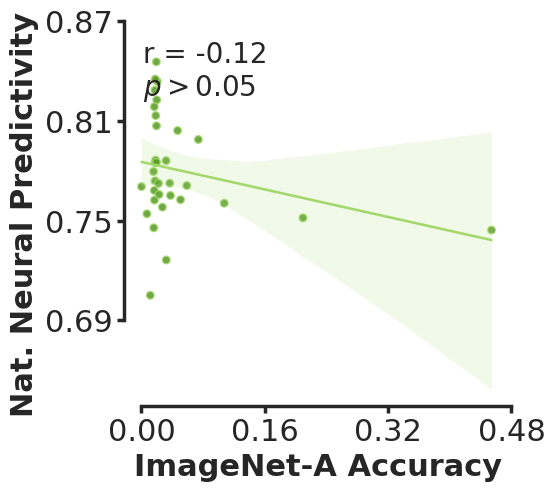

''

In [ ]:
# 3rd column
cor_plot(model_list, session_list, "imagenet-a_acc", "OOD_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, per_neuron = True, remark = "")
cor_plot(model_list, session_list, "imagenet-a_acc", "ID_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, per_neuron = True, remark = "")

0.3121254114532744


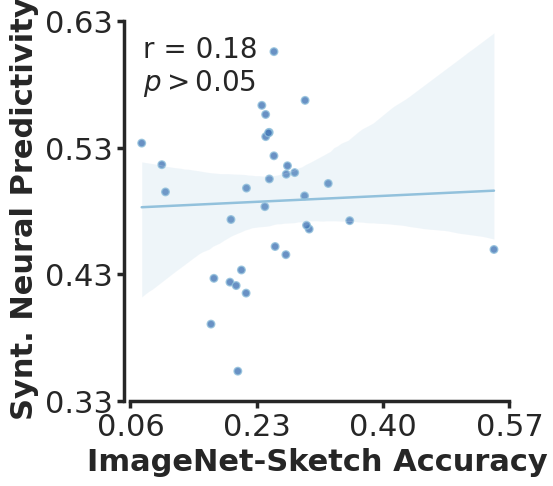

0.6518721495502794


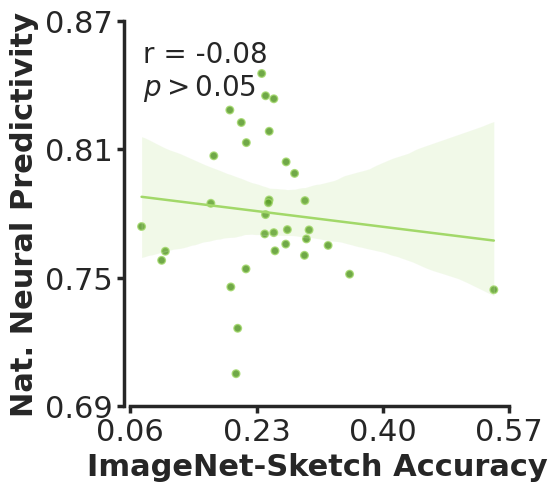

''

In [ ]:
# 4th column
cor_plot(model_list, session_list, "imagenet-s_acc", "OOD_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, per_neuron = True, remark = "")
cor_plot(model_list, session_list, "imagenet-s_acc", "ID_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, per_neuron = True, remark = "")

0.050423141750356254


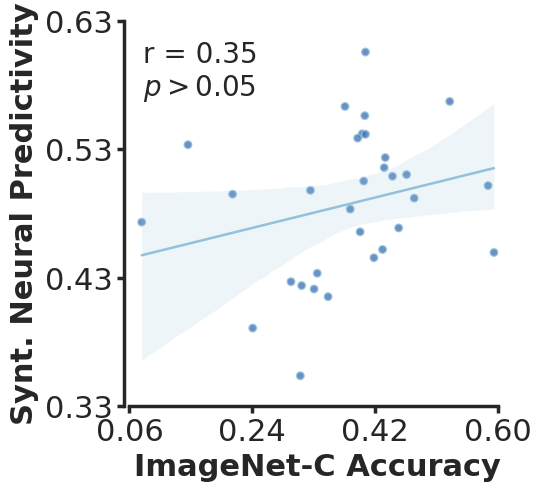

0.7416313964579807


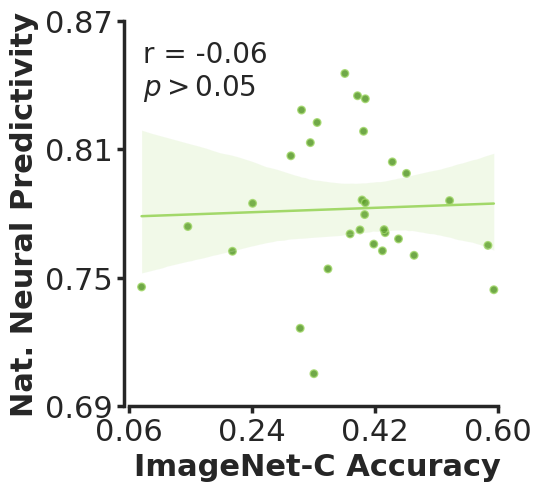

''

In [ ]:
# 5th column
ood_model_list = model_list.copy()
ood_model_list.remove('moco')
ood_model_list.remove('clip')
cor_plot(ood_model_list, session_list, "imagenet-c_acc", "OOD_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, per_neuron = True, remark = "")
cor_plot(ood_model_list, session_list, "imagenet-c_acc", "ID_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, per_neuron = True, remark = "")

## Fig 5a

0.5191983581800304


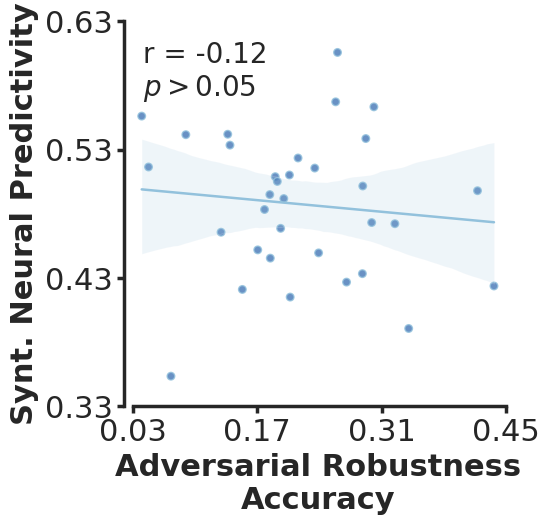

0.046567381629945274


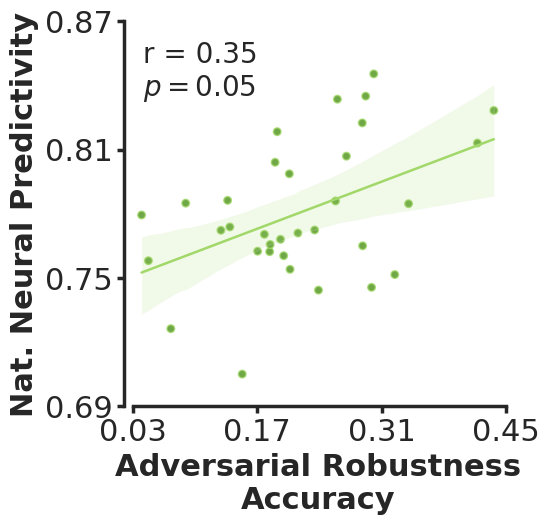

''

In [ ]:
cor_plot(model_list, session_list, "adv_acc", "OOD_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, per_neuron = True, remark = "")
cor_plot(model_list, session_list, "adv_acc", "ID_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, per_neuron = True, remark = "")

## Fig 5b

In [ ]:
#Top row

import json
from statistics import mean, variance
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import statistics
def fig5b1():

  model_list=['st_resnet','l2_3','linf_4','linf_8','resnet50_l2_eps0.01',
              'resnet50_l2_eps0.05',
              'resnet50_l2_eps5',
              'resnet50_l2_eps1',
              'resnet50_l2_eps3',
              'resnet50_l2_eps0.25',
              'resnet50_l2_eps0.5',
              'resnet50_l2_eps0.03',
              'resnet50_l2_eps0.1']

  session_list=['m_ohp_session1','m_ohp_session2','m_stretch_session1','m_stretch_session2','s_ohp_session1','n_stretch_session1','s_stretch_session1']
  filter = True
  conf_medians_dict = with_norm_np(model_list,'V4_new',session_list, "ID_NP",filter)
  raw_conf_mean_dict = load_dict(model_list,'V4_new',session_list, "ID_NP",filter)
  del raw_conf_mean_dict['l2_3']
  conf_mean_dict = {k: v / 100 for k,v in raw_conf_mean_dict.items()}
  sorted_mean_dict = dict( sorted(conf_mean_dict.items(),
                            key=lambda item: item[1] / 100,
                            reverse=True))
  var_dict={k:  v.var() for k, v in conf_medians_dict.items()}
  sorted_var_dict={k:var_dict[k] for k in list(sorted_mean_dict.keys())}

  json_object = json.dumps(var_dict, indent = 4)



  fig, ax = plt.subplots(figsize=(9,4))
  barlist=ax.bar(range(len(sorted_mean_dict)),list(sorted_mean_dict.values()), yerr=sorted_var_dict.values(), error_kw=dict(lw=5, capsize=5, capthick=3),color=ID_shadow)


  figure_ar={}
  figure_ar['st_resnet']= 'RN50'
  figure_ar['l2_3']='RN50 $(\epsilon_{L_2}=3$ 20steps)'
  figure_ar['linf_4']=r'RN50 $(\epsilon_{L_\infty}=\frac{4}{255}$)'
  figure_ar['linf_8']=r'RN50 $(\epsilon_{L_\infty}=\frac{8}{255}$)'
  figure_ar['resnet50_l2_eps0.05'] = 'RN50 $(\epsilon_{L_2}=0.05$)'
  figure_ar['resnet50_l2_eps5'] = 'RN50 $(\epsilon_{L_2}=5$)'
  figure_ar['resnet50_l2_eps1'] = 'RN50 $(\epsilon_{L_2}=1$)'
  figure_ar['resnet50_l2_eps3'] = 'RN50 $(\epsilon_{L_2}=3$)'
  figure_ar['resnet50_l2_eps0.25'] = 'RN50 $(\epsilon_{L_2}=0.25$)'
  figure_ar['resnet50_l2_eps0.5'] = 'RN50 $(\epsilon_{L_2}=0.5$)'
  figure_ar['resnet50_l2_eps0.03'] = 'RN50 $(\epsilon_{L_2}=0.03$)'
  figure_ar['resnet50_l2_eps0.1'] = 'RN50 $(\epsilon_{L_2}=0.1$)'
  figure_ar['resnet50_l2_eps0.01'] = 'RN50 $(\epsilon_{L_2}=0.01$)'

  figure_ar_list=[figure_ar[k] for k in list(sorted_mean_dict.keys())]
  base_index = list(sorted_mean_dict).index('st_resnet')
  barlist[base_index].set_facecolor(ID_color)
  ttest_dict = ttest_info_dict(model_list, 'V4_new', session_list, "st_resnet", "OOD_NP")
  sorted_model_value_list = list(sorted_mean_dict.values())
  sorted_model_list = list(sorted_mean_dict.keys())
  for x in range(len(sorted_mean_dict)):
    h = 1/100
    if x == base_index:
      continue
    elif x == base_index - 1:
      y1=max((sorted_model_value_list[base_index]+list(sorted_var_dict.values())[base_index]+1/100),(list(sorted_mean_dict.values())[x]+list(sorted_var_dict.values())[base_index]+1/100))
      plt.plot([x,x, base_index, base_index], [y1,y1+h,y1+h,y1], linewidth=1.5, color='k')
      plt.text((x+base_index)*.5, y1+1/100, ttest_dict[sorted_model_list[x]], ha='center', va='bottom', color='k', fontsize=14)




  plt.ylim(70/100,90/100)


  plt.xticks( range(len(figure_ar_list)),figure_ar_list,rotation = 55, fontsize=18,)
  plt.yticks([70/100,75/100,80/100,85/100, 90/100],fontsize=18)
  plt.ylabel('Neural Predictivity', fontsize=18, weight='bold')
  # plt.xlabel('(b)', fontsize=22,labelpad=-10),
  sns.despine()
  # plt.savefig('/content/figures/simplified-architecture-synthetic-performance.pdf',bbox_inches='tight')

  return ""

''

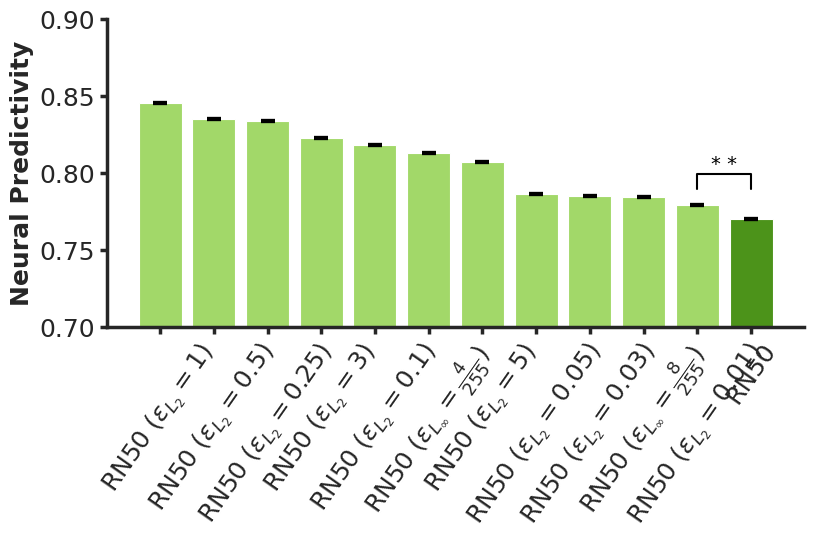

In [ ]:
fig5b1()

In [ ]:

def fig5b2():
  model_list=['st_resnet','l2_3','linf_4','linf_8','resnet50_l2_eps0.01',
              'resnet50_l2_eps0.05',
              'resnet50_l2_eps5',
              'resnet50_l2_eps1',
              'resnet50_l2_eps3',
              'resnet50_l2_eps0.25',
              'resnet50_l2_eps0.5',
              'resnet50_l2_eps0.03',
              'resnet50_l2_eps0.1']

  session_list=['m_ohp_session1','m_ohp_session2','m_stretch_session1','m_stretch_session2','s_ohp_session1','n_stretch_session1','s_stretch_session1']
  filter = True
  conf_medians_dict = with_norm_np(model_list,'V4_new',session_list, "OOD_NP",filter)
  raw_conf_mean_dict = load_dict(model_list,'V4_new',session_list, "OOD_NP",filter)
  del raw_conf_mean_dict['l2_3']
  print("conf_medians_dict")
  print(conf_medians_dict)
  conf_mean_dict = {k: v / 100 for k,v in raw_conf_mean_dict.items()}
  sorted_mean_dict = dict( sorted(conf_mean_dict.items(),
                            key=lambda item: item[1] / 100,
                            reverse=True))
  var_dict={k:  v.var() for k, v in conf_medians_dict.items()}
  sorted_var_dict={k:var_dict[k] for k in list(sorted_mean_dict.keys())}

  json_object = json.dumps(var_dict, indent = 4)



  fig, ax = plt.subplots(figsize=(9,4))
  barlist=ax.bar(range(len(sorted_mean_dict)),list(sorted_mean_dict.values()), yerr=sorted_var_dict.values(), error_kw=dict(lw=5, capsize=5, capthick=3),color=OOD_shadow)


  figure_ar={}
  figure_ar['st_resnet']= 'RN50'
  figure_ar['l2_3']='RN50 $(\epsilon_{L_2}=3$ 20steps)'
  figure_ar['linf_4']=r'RN50 $(\epsilon_{L_\infty}=\frac{4}{255}$)'
  figure_ar['linf_8']=r'RN50 $(\epsilon_{L_\infty}=\frac{8}{255}$)'
  figure_ar['resnet50_l2_eps0.05'] = 'RN50 $(\epsilon_{L_2}=0.05$)'
  figure_ar['resnet50_l2_eps5'] = 'RN50 $(\epsilon_{L_2}=5$)'
  figure_ar['resnet50_l2_eps1'] = 'RN50 $(\epsilon_{L_2}=1$)'
  figure_ar['resnet50_l2_eps3'] = 'RN50 $(\epsilon_{L_2}=3$)'
  figure_ar['resnet50_l2_eps0.25'] = 'RN50 $(\epsilon_{L_2}=0.25$)'
  figure_ar['resnet50_l2_eps0.5'] = 'RN50 $(\epsilon_{L_2}=0.5$)'
  figure_ar['resnet50_l2_eps0.03'] = 'RN50 $(\epsilon_{L_2}=0.03$)'
  figure_ar['resnet50_l2_eps0.1'] = 'RN50 $(\epsilon_{L_2}=0.1$)'
  figure_ar['resnet50_l2_eps0.01'] = 'RN50 $(\epsilon_{L_2}=0.01$)'

  figure_ar_list=[figure_ar[k] for k in list(sorted_mean_dict.keys())]
  base_index = list(sorted_mean_dict).index('st_resnet')
  barlist[base_index].set_facecolor(OOD_color)

  ttest_dict = ttest_info_dict(model_list, 'V4_new', session_list, "st_resnet", "OOD_NP")
  sorted_model_value_list = list(sorted_mean_dict.values())
  sorted_model_list = list(sorted_mean_dict.keys())

  for x in range(len(sorted_mean_dict)):
    h = 1/100
    if x == base_index:
      continue
    elif x == base_index + 1 or x == base_index - 1:
      y1=max((sorted_model_value_list[base_index]+list(sorted_var_dict.values())[base_index]+1/100),(list(sorted_mean_dict.values())[x]+list(sorted_var_dict.values())[base_index]+1/100))
      plt.plot([x,x, base_index, base_index], [y1,y1+h,y1+h,y1], linewidth=1.5, color='k')
      plt.text((x+base_index)*.5, y1+1/100, ttest_dict[sorted_model_list[x]], ha='center', va='bottom', color='k', fontsize=14)




  plt.ylim(25/100,70/100)


  plt.xticks( range(len(figure_ar_list)),figure_ar_list,rotation = 55, fontsize=18,)
  plt.yticks([25/100,35/100,45/100,55/100,65/100],fontsize=18)
  plt.ylabel('Neural Predictivity', fontsize=18, weight='bold')
  sns.despine()
  # plt.savefig('/content/figures/simplified-architecture-synthetic-performance.pdf',bbox_inches='tight')

  return ""

conf_medians_dict
{'st_resnet': array([0.48707931, 0.48201226, 0.48767509, 0.48105115, 0.47898238]), 'l2_3': array([0.42764046, 0.42496029, 0.41817683, 0.42612593, 0.42193234]), 'linf_4': array([0.505186  , 0.50322639, 0.49240163, 0.49096745, 0.49822967]), 'linf_8': array([0.38616368, 0.39104432, 0.39543373, 0.39017566, 0.39040766]), 'resnet50_l2_eps0.01': array([0.55743802, 0.55979992, 0.55289656, 0.55566897, 0.55490283]), 'resnet50_l2_eps0.05': array([0.54176098, 0.54273481, 0.54385444, 0.54948667, 0.53217057]), 'resnet50_l2_eps5': array([0.42826903, 0.42157688, 0.4269994 , 0.43433257, 0.42271811]), 'resnet50_l2_eps1': array([0.55752296, 0.56538477, 0.55460295, 0.56398391, 0.57525379]), 'resnet50_l2_eps3': array([0.44000777, 0.43917655, 0.42793985, 0.43241127, 0.42735368]), 'resnet50_l2_eps0.25': array([0.60469477, 0.60519806, 0.61287133, 0.60293328, 0.60303981]), 'resnet50_l2_eps0.5': array([0.5345643 , 0.53927451, 0.53474172, 0.54203501, 0.54266186]), 'resnet50_l2_eps0.03': array([

''

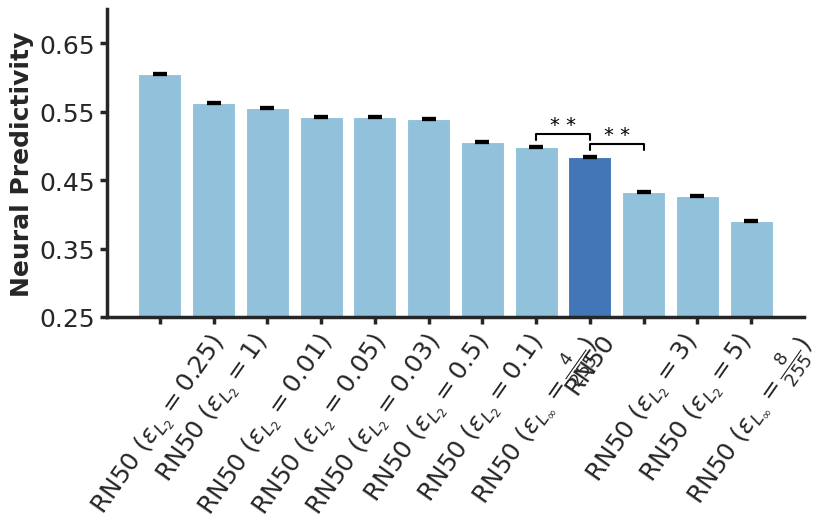

In [ ]:
fig5b2()

## Fig 5c

In [ ]:

"""
x: x-axis, choose one from ["ID_NP","OOD_NP","NPGG","IN_acc","OOD_acc","imagenet-c_acc","imagenet-a_acc","imagenet-r_acc","imagenet-s_acc","OOD_gg","imagenet-c_gg","imagenet-a_gg","imagenet-r_gg","imagenet-s_gg","adv_acc","adv_gg"]
y: y-axis, choose one from ["ID_NP","OOD_NP","NPGG","IN_acc","OOD_acc","imagenet-c_acc","imagenet-a_acc","imagenet-r_acc","imagenet-s_acc","OOD_gg","imagenet-c_gg","imagenet-a_gg","imagenet-r_gg","imagenet-s_gg","adv_acc","adv_gg"]
remark: remark used in the plots save names. By default is an empty string
text: whether to label the certain points or not. By default is True. (Should be set to False when model list is robust model list)
calib_dict: used to manually adjust the position of text labels, when the labels overlapped with others. Usage:{Label_name:(distances shift in x_axis, distances shift in y_axis)}. Example: {"CLIP-RN50":(-4,-2)}
"""
fig5c_model_list = ['st_resnet',
 'resnet50_l2_eps0.01',
 'resnet50_l2_eps0.05',
 'resnet50_l2_eps5',
 'resnet50_l2_eps1',
 'resnet50_l2_eps3',
 'resnet50_l2_eps0.25',
 'resnet50_l2_eps0.5',
 'resnet50_l2_eps0.03',
 'resnet50_l2_eps0.1']
fig5c_ID_dict = load_dict(fig5c_model_list,'V4_new', session_list, "ID_NP",True)
fig5c_OOD_dict = load_dict(fig5c_model_list,'V4_new', session_list, "OOD_NP",True)
def cor_plot_epsilon(model_list,session_list, x, y, area, remark="",filtered=True,text=True, paper_fig = False, calib_dict=None, cka = False, eps = "null"):
  assert x=='eps'
  x_dict = {}
  y_dict = {}
  if x == "eps":
    x_dict = {'st_resnet': 0.001, 'resnet50_l2_eps0.01': 0.01, 'resnet50_l2_eps0.05': 0.05, 'resnet50_l2_eps5': 5.0, 'resnet50_l2_eps1': 1.0, 'resnet50_l2_eps3': 3.0, 'resnet50_l2_eps0.25': 0.25, 'resnet50_l2_eps0.5': 0.5, 'resnet50_l2_eps0.03': 0.03, 'resnet50_l2_eps0.1': 0.1}
    if eps == "null":
      if y == "OOD_NP":
        y_dict = fig5c_OOD_dict
      else:
        y_dict = fig5c_ID_dict
    else:
      y_dict =load_dict(list(x_dict.keys()),area, session_list, eps,filtered, True, "natural")
  else:
    x_dict_csv = csv.reader(open("/content/gdrive/MyDrive/figure_data/x_dict.csv", "r"))
    y_dict_csv = csv.reader(open("/content/gdrive/MyDrive/figure_data/y_dict.csv", "r"))
  dataframe=pd.DataFrame({'name':np.array(list(x_dict.keys())),'x': np.array(list(x_dict.values())), 'y': np.array(list(y_dict.values()))})
  if y =="ID_NP":
    color=ID_color
    shadow_color=ID_shadow

  elif y =="OOD_NP":
    color=OOD_color
    shadow_color=OOD_shadow
  elif y =="NPGG":
    color=gap_color
    shadow_color=gap_shadow
  else:
    color='g'
    shadow_color='g'
  dataframe['color']=color
  if text==True:
    dataframe.loc[dataframe.name == "st_resnet", 'color'] = "r"
    model_names=["RN50",]
    model_names_map={}
    model_names_map["RN50"]="st_resnet"
    for model_name in model_names:
      if calib_dict is not None and model_name in calib_dict:
        plt.text(x_dict[model_names_map[model_name]]+calib_dict[model_name][0], y_dict[model_names_map[model_name]]+calib_dict[model_name][1], model_name, weight='bold')
      else:

        plt.text(x_dict[model_names_map[model_name]]+0.2, y_dict[model_names_map[model_name]]+0.2, model_name, weight='bold')


  spearmanR = stats.spearmanr(np.array(list(x_dict.values())), np.array(list(y_dict.values())))

  pearsonR = stats.pearsonr(np.array(list(x_dict.values())), np.array(list(y_dict.values())))
  r_value = getattr(spearmanR, 'correlation')
  pv = getattr(spearmanR, 'pvalue')

  X = np.array(list(x_dict.values()))
  Y = np.array(list(y_dict.values()))

  idx_sorted = np.argsort(X)
  X = X[idx_sorted]
  Y = Y[idx_sorted]

  _, ax = plt.subplots(figsize=(5,5))
  xaxis_min = min(X)
  xaxis_max = max(Y)
  x_range = (xaxis_max - xaxis_min)
  xticks = [0.001, 0.01, 0.01, 0.1, 1., 5.]
  ax.set_xscale('log')
  print('X_dict', x_dict.values())
  yaxis_min = rounddown_to_multiple(min(Y), 5)
  yaxis_max = roundup_to_multiple(max(Y), 5)
  y_range = (yaxis_max+1 - yaxis_min)
  yticks = list(range(yaxis_min, yaxis_max+1, y_range//3))
  ax.plot(X, Y, c=shadow_color, marker='.', markersize=20, linewidth=2)
  print(y_dict.values())

  sns.despine()
  if eps == 'null':
    ax.set_ylabel(load_label(y), fontsize=22, weight='bold')
  else:
    ax.set_ylabel(load_label(eps), fontsize=22, weight='bold')
  ax.set_xlabel(load_label(x), fontsize=22, weight='bold')
  props = dict(boxstyle='round', facecolor='wheat', alpha=0)
  print(pv)
  if pv<0.05:
    textstr = '\n'.join((
        r'r = %.2f' % (r_value, ),
        r'$p =%.2f$' % (pv, )))
  else:
    textstr = '\n'.join((
        r'r = %.2f' % (r_value, ),
        r'$p > %.2f$' % (0.05, )))
  ax.text(0.05, 0.95, textstr, transform=ax.transAxes,fontsize=20,
          verticalalignment='top',horizontalalignment='left', bbox=props)
  plt.yticks(fontsize=22)
  plt.xticks(fontsize=22)
  plt.yticks(yticks)
  plt.xticks(xticks)
  sns.despine(trim=True)
  plt.tight_layout()

  if eps == 'null':
    name_choice = y.split('_')[0]
  else:
    name_choice = eps
  #plt.savefig(f'/content/gdrive/MyDrive/paper_figures/epsilon_{name_choice}.pdf',bbox_inches='tight', format='pdf')
  return ""

X_dict dict_values([0.001, 0.01, 0.05, 5.0, 1.0, 3.0, 0.25, 0.5, 0.03, 0.1])
dict_values([77.04151891661745, 77.94585001915682, 78.62904589966882, 80.69404752924576, 84.54229600473967, 82.25033828095654, 83.3592243553965, 83.50106683129695, 78.49832777624756, 81.84003197237682])
0.013330146315440047
X_dict dict_values([0.001, 0.01, 0.05, 5.0, 1.0, 3.0, 0.25, 0.5, 0.03, 0.1])
dict_values([48.33600378481403, 55.6141260931867, 54.20014945560136, 42.67791959796007, 56.334967625104525, 43.33778253293318, 60.57474501984874, 53.86554805989403, 54.16640388110301, 50.52277151058677])
0.44583834154275137


''

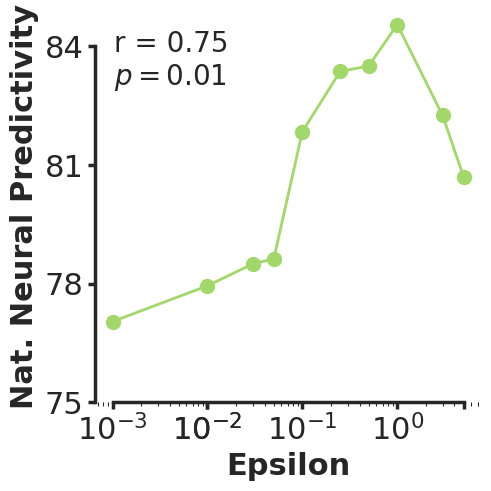

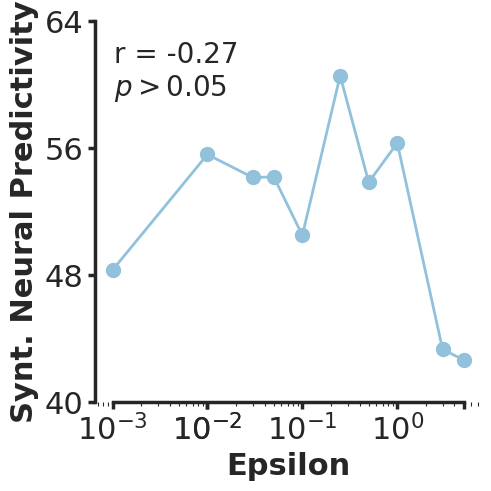

In [ ]:
cor_plot_epsilon([], [], "eps", "ID_NP", area = "V4_new", cka = True, text = False, filtered = True, paper_fig = False, remark = "fig1: ")
cor_plot_epsilon([], [], "eps", "OOD_NP", area = "V4_new", cka = False, text = False, filtered = True, paper_fig = False, remark = "fig1: ")

## Fig 5d

In [ ]:
from statistics import median
def neurowise_model_plot(model_list_type, area, session_list, x_name,y_name, x_model, y_model, filtered, paper_figure = False, scratch_figure = False):
  if paper_figure or scratch_figure:
    assert paper_figure != scratch_figure
  assert x_name == y_name
  fig, ax = plt.subplots(figsize=(5,5))

  x, y = load_x_and_y_model(area, session_list,x_name,y_name,x_model, y_model, filtered)

  data_frame = pd.DataFrame({'x': x, 'y': y})
  if x_name == y_name and x_name == "ID_NP":
    color = ID_color
    unit_line_clolr = ID_shadow
  if x_name == y_name and x_name == "OOD_NP":
    color = OOD_color
    unit_line_clolr = OOD_shadow

  sns.regplot(data=data_frame, x = x, y = y, color=color ,scatter_kws={'facecolors':color})


  slope_natural, intercept_natural, r_value_natural, pv_natural, se_natural = stats.linregress( x.astype('float64'), y.astype('float64'))

  print("pv_natural:")
  print(pv_natural)

  model_name_dict = {"st_resnet": "RN50", "resnet50_l2_eps0.25": 'L2: \u03B5 =0.25 RN50'}
  plt.xlabel(model_name_dict[x_model] + '\nNeural Predictivity', fontsize = 22)
  plt.ylabel(model_name_dict[y_model] + '\nNeural Predictivity', fontsize = 22)
  plt.xticks(fontsize = 22)
  plt.yticks(fontsize = 22)
  if (x_name == "OOD_NP"):
    sns.lineplot(x=[0, 1], y=[0, 1], color = 'black', linestyle = '--')
  if (x_name == "ID_NP"):
    sns.lineplot(x=[0.4, 1], y=[0.4, 1], color = 'black', linestyle = '--')
  textstr = '\n'.join((
    r'slope = %.2f' % (slope_natural, ),
    ))


  props = dict(boxstyle='round', facecolor='wheat', alpha=0)
  print(pv_natural)
  if pv_natural<0.05:
    textstr = '\n'.join((
        r'r = %.2f' % (r_value_natural, ),
        r'$p =%.2f$' % (pv_natural, )))
  else:
    textstr = '\n'.join((
        r'r = %.2f' % (r_value_natural, ),
        r'$p > %.2f$' % (0.05, )))
  ax.text(0.05, 0.95, textstr, transform=ax.transAxes,fontsize=20,
          verticalalignment='top',horizontalalignment='left', bbox=props)
  sns.despine()

  if paper_figure:
    dir = "paper_figures"
  if scratch_figure:
    dir = 'figures'
  if not paper_figure and not scratch_figure:
    dir = "figures"
  measer = x_name.split('_')[0]
  file_name = f'neurowise_{measer}_{x_model}&{y_model}'
  path = f"/content/gdrive/MyDrive/{dir}/{file_name}.pdf"
  return ""

pv_natural:
1.3124873030572882e-88
1.3124873030572882e-88
pv_natural:
8.525027297171978e-40
8.525027297171978e-40


''

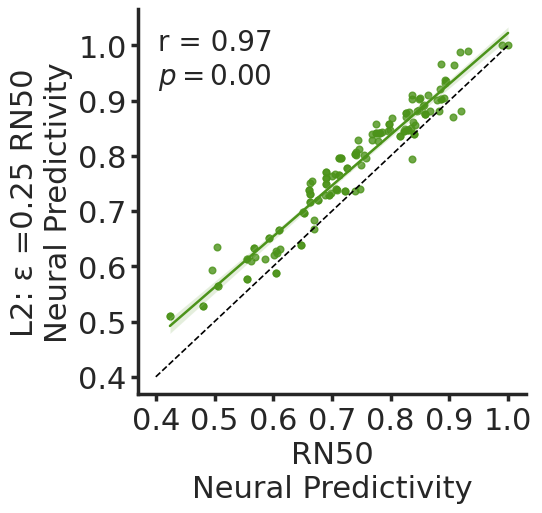

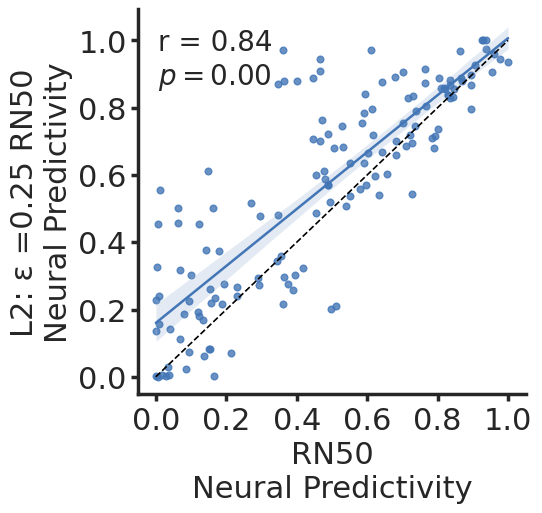

In [ ]:
neurowise_model_plot("all", "V4_new", session_list, "ID_NP", "ID_NP", "st_resnet", "resnet50_l2_eps0.25", True, paper_figure = True)
neurowise_model_plot("all", "V4_new", session_list, "OOD_NP", "OOD_NP", "st_resnet", "resnet50_l2_eps0.25", True, paper_figure = True)

## Fig 6a

In [ ]:
import json
from statistics import mean
def fig6a1():
  model_list=['st_resnet','wide_resnet50','resnet101','wide_resnet101', 'resnet18']
  conf_medians_dict = with_norm_np(model_list,'V4_new', session_list, "ID_NP",filter)
  conf_mean_dict = load_dict(model_list,'V4_new',session_list, "ID_NP",filter)

  from statistics import mean,variance


  print(conf_mean_dict)
  sorted_mean_dict = dict( sorted(conf_mean_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

  var_dict={k:  100*v.var() for k, v in conf_medians_dict.items()}
  sorted_var_dict={k:var_dict[k] for k in list(sorted_mean_dict.keys())}

  # Build the plot
  fig, ax = plt.subplots()


  barlist=ax.bar(range(len(sorted_mean_dict)),sorted_mean_dict.values(), yerr=sorted_var_dict.values(), error_kw=dict(lw=5, capsize=5, capthick=3),color=ID_shadow)

  barlist[3].set_facecolor(ID_color)

  figure_arch={}
  figure_arch['resnet101']='RN101'
  figure_arch['wide_resnet101']='Wide RN101'
  figure_arch['wide_resnet50']='Wide RN50'
  figure_arch['st_resnet']='RN50'
  figure_arch['resnet18']='RN18'
  figure_arch_list=[figure_arch[k] for k in list(sorted_mean_dict.keys())]
  base_index = list(sorted_mean_dict).index('st_resnet')
  barlist[base_index].set_facecolor(ID_color)
  plt.xticks(range(len(sorted_mean_dict)), list(sorted_mean_dict.keys()),rotation = 45)
  ttest_dict = ttest_info_dict(model_list, 'V4_new', session_list, "st_resnet", "ID_NP")
  print(ttest_dict)
  sorted_model_value_list = list(sorted_mean_dict.values())
  sorted_model_list = list(sorted_mean_dict.keys())
  print(sorted_model_list)
  for x in range(len(sorted_mean_dict)):
    h = 1
    if x == base_index:
      continue
    else:
      y1=max((sorted_model_value_list[base_index]+list(sorted_var_dict.values())[base_index]+1),(list(sorted_mean_dict.values())[x]+list(sorted_var_dict.values())[base_index]+1))
      plt.plot([x,x, base_index, base_index], [y1,y1+h,y1+h,y1], linewidth=1.5, color='k')
      plt.text((x+base_index)*.5, y1+1, ttest_dict[sorted_model_list[x]], ha='center', va='bottom', color='k', fontsize=14)
  print(type(figure_arch_list))
  plt.ylim([60, 85])


  plt.xticks( range(len(figure_arch_list)),figure_arch_list,rotation = 45, fontsize=18)
  plt.yticks([60,70,80],fontsize=18)
  plt.ylabel('Correlation (%)', fontsize=18, weight='bold')
  sns.despine()
  # plt.savefig("/content/figures/simplified-architecture-natural-performance.pdf",bbox_inches='tight')

  return ""

{'st_resnet': 77.04151891661745, 'wide_resnet50': 77.10047307264404, 'resnet101': 80.40911873111648, 'wide_resnet101': 79.87118650980548, 'resnet18': 70.50697788653893}
{'st_resnet': 'n.s.', 'wide_resnet50': 'n.s.', 'resnet101': '* *', 'wide_resnet101': '* *', 'resnet18': '* *'}
['resnet101', 'wide_resnet101', 'wide_resnet50', 'st_resnet', 'resnet18']
<class 'list'>


''

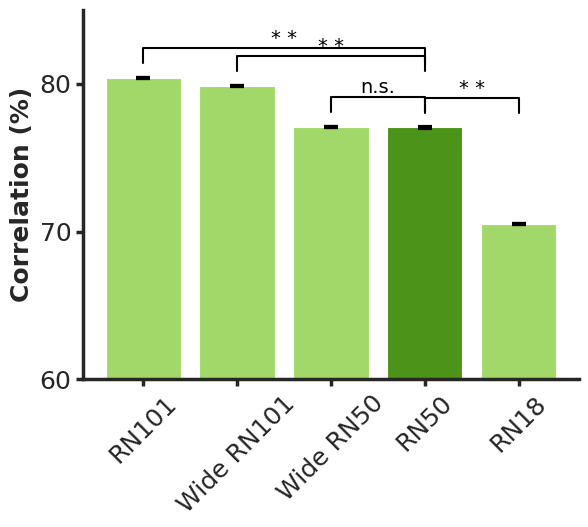

In [ ]:
fig6a1()

In [ ]:
def fig6a2():
  model_list=['st_resnet','wide_resnet50','resnet101','wide_resnet101', 'resnet18']

  session_list=['m_ohp_session1','m_ohp_session2','m_stretch_session1','m_stretch_session2','s_ohp_session1','n_stretch_session1','s_stretch_session1']

  conf_medians_dict = with_norm_np(model_list,'V4_new',session_list, "OOD_NP",filter)
  conf_mean_dict = load_dict(model_list,'V4_new',session_list, "OOD_NP",filter)
  sorted_mean_dict = dict( sorted(conf_mean_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

  var_dict={k:  100*variance(v) for k, v in conf_medians_dict.items()}
  sorted_var_dict={k:var_dict[k] for k in list(sorted_mean_dict.keys())}

  json_object = json.dumps(var_dict, indent = 4)



  fig, ax = plt.subplots()
  barlist=ax.bar(range(len(sorted_mean_dict)),list(sorted_mean_dict.values()), yerr=sorted_var_dict.values(), error_kw=dict(lw=5, capsize=5, capthick=3),color=OOD_shadow)

  figure_arch={}
  figure_arch['resnet101']='RN101'
  figure_arch['wide_resnet101']='Wide RN101'
  figure_arch['wide_resnet50']='Wide RN50'
  figure_arch['st_resnet']='RN50'
  figure_arch['resnet18']='RN18'
  figure_arch_list=[figure_arch[k] for k in list(sorted_mean_dict.keys())]
  base_index = list(sorted_mean_dict).index('st_resnet')
  barlist[base_index].set_facecolor(OOD_color)
  ttest_dict = ttest_info_dict(model_list, 'V4_new', session_list, "st_resnet", "OOD_NP")
  sorted_model_value_list = list(sorted_mean_dict.values())
  sorted_model_list = list(sorted_mean_dict.keys())
  for x in range(len(sorted_mean_dict)):
    h = 1
    if x == base_index:
      continue
    else:
      y1=max((sorted_model_value_list[base_index]+list(sorted_var_dict.values())[base_index]+1),(list(sorted_mean_dict.values())[x]+list(sorted_var_dict.values())[base_index]+1))
      plt.plot([x,x, base_index, base_index], [y1,y1+h,y1+h,y1], linewidth=1.5, color='k')
      plt.text((x+base_index)*.5, y1+1, ttest_dict[sorted_model_list[x]], ha='center', va='bottom', color='k', fontsize=14)

  plt.ylim(30,70)
  plt.xticks( range(len(figure_arch_list)),figure_arch_list,rotation = 45, fontsize=18)
  plt.yticks([35,40,45,50,55,60],fontsize=18)
  plt.ylabel('Correlation (%)', fontsize=18, weight='bold'),
  sns.despine()
  # plt.savefig('/content/figures/simplified-architecture-synthetic-performance.pdf',bbox_inches='tight')

  return ""

''

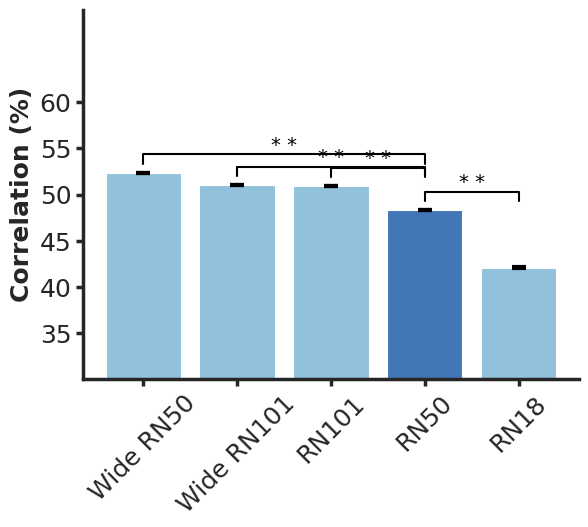

In [ ]:
fig6a2()

## Fig 6b

In [ ]:
def fig6b1():
  model_list=['st_resnet','moco','simclr','rn50_la', 'InsDis']
  session_list=['m_ohp_session1','m_ohp_session2','m_stretch_session1','m_stretch_session2','s_ohp_session1','n_stretch_session1','s_stretch_session1']



  conf_medians_dict = with_norm_np(model_list,'V4_new',session_list, "ID_NP",filter)
  conf_mean_dict = load_dict(model_list,'V4_new',session_list, "ID_NP",filter)


  from statistics import mean,variance

  sorted_mean_dict = dict( sorted(conf_mean_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

  var_dict={k:  100*v.var() for k, v in conf_medians_dict.items()}
  sorted_var_dict={k:var_dict[k] for k in list(sorted_mean_dict.keys())}

  # Build the plot
  fig, ax = plt.subplots()

  a_val=0.6
  circ1 = mpatches.Patch( facecolor='b',alpha=a_val,label='Unsupervised')
  circ2= mpatches.Patch( facecolor='g',alpha=a_val,label='Supervised')
  barlist=ax.bar(range(len(sorted_mean_dict)),sorted_mean_dict.values(), yerr=sorted_var_dict.values(), error_kw=dict(lw=5, capsize=5, capthick=3),color=ID_shadow)

  base_index = list(sorted_mean_dict).index('st_resnet')
  barlist[base_index].set_facecolor(ID_color)
  plt.xticks(range(len(sorted_mean_dict)), list(sorted_mean_dict.keys()),rotation = 45)
  ttest_dict = ttest_info_dict(model_list, 'V4_new', session_list, "st_resnet", "ID_NP")
  sorted_model_value_list = list(sorted_mean_dict.values())
  sorted_model_list = list(sorted_mean_dict.keys())
  for x in range(len(sorted_mean_dict)):
    h = 1
    if x == base_index:
      continue
    else:
      y1=max((sorted_model_value_list[base_index]+list(sorted_var_dict.values())[base_index]+1),(list(sorted_mean_dict.values())[x]+list(sorted_var_dict.values())[base_index]+1))
      plt.plot([x,x, base_index, base_index], [y1,y1+h,y1+h,y1], linewidth=1.5, color='k')
      plt.text((x+base_index)*.5, y1+1, ttest_dict[sorted_model_list[x]], ha='center', va='bottom', color='k', fontsize=14)



  figure_algo={}
  figure_algo['st_resnet']='RN50'
  figure_algo['moco']='MoCo RN50'
  figure_algo['simclr']='SimCLR RN50'
  figure_algo['rn50_la']='LA RN50'
  figure_algo['InsDis']='InsDis RN50'

  figure_algo_list=[figure_algo[k] for k in list(sorted_mean_dict.keys())]
  plt.ylim([60, 85])



  plt.xticks( range(len(figure_algo_list)),figure_algo_list,rotation = 45, fontsize=18)
  plt.yticks([60,65,70,75,80],fontsize=18)
  plt.ylabel('Correlation (%)', fontsize=18, weight='bold')

  sns.despine()
  return ""

''

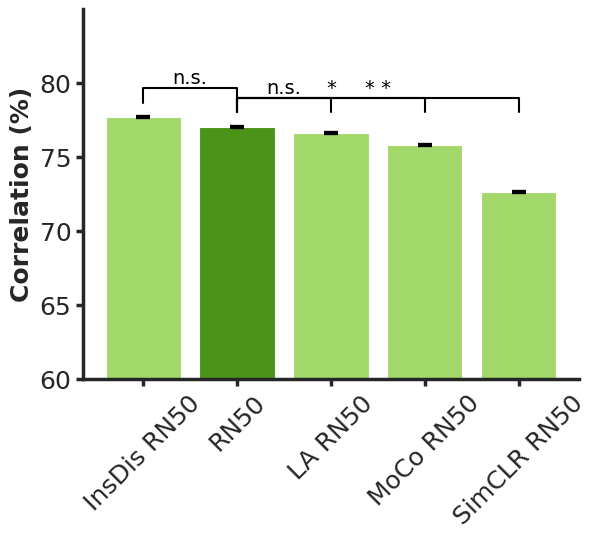

In [ ]:
fig6b1()

In [ ]:

def fig6b2():

  model_list=['st_resnet','moco','simclr','rn50_la','InsDis']
  session_list=['m_ohp_session1','m_ohp_session2','m_stretch_session1','m_stretch_session2','s_ohp_session1','n_stretch_session1','s_stretch_session1']


  conf_medians_dict = with_norm_np(model_list,'V4_new',session_list, "OOD_NP",filter)
  conf_mean_dict = load_dict(model_list,'V4_new',session_list, "OOD_NP",filter)

      # conf_dict[m]=norm_natural_hist_data-norm_synth_hist_data
  from statistics import mean,variance
  # conf_dict['moco'].shape
  #conf_mean_dict={k:  100*mean(v) for k, v in conf_medians_dict.items()}
  sorted_mean_dict = dict( sorted(conf_mean_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

  var_dict={k:  100*v.var() for k, v in conf_medians_dict.items()}
  sorted_var_dict={k:var_dict[k] for k in list(sorted_mean_dict.keys())}


  fig, ax = plt.subplots()
  a_val=0.6
  circ1 = mpatches.Patch( facecolor='b',alpha=a_val,label='Unsupervised')
  circ2= mpatches.Patch( facecolor='g',alpha=a_val,label='Supervised')
  barlist=ax.bar(range(len(sorted_mean_dict)),sorted_mean_dict.values(), yerr=sorted_var_dict.values(), error_kw=dict(lw=5, capsize=5, capthick=3),color=OOD_shadow)
  barlist[list(sorted_mean_dict.keys()).index("st_resnet")].set_color(OOD_color)



  figure_algo={}
  figure_algo['st_resnet']='RN50'
  figure_algo['moco']='MoCo RN50'
  figure_algo['simclr']='SimCLR RN50'
  figure_algo['InsDis']='InsDis RN50'
  figure_algo['rn50_la']='LA RN50'

  figure_algo_list=[figure_algo[k] for k in list(sorted_mean_dict.keys())]

  base_index = list(sorted_mean_dict).index('st_resnet')
  barlist[base_index].set_facecolor(OOD_color)
  plt.xticks(range(len(sorted_mean_dict)), list(sorted_mean_dict.keys()),rotation = 45)
  ttest_dict = ttest_info_dict(model_list, 'V4_new', session_list, "st_resnet", "OOD_NP")
  sorted_model_value_list = list(sorted_mean_dict.values())
  sorted_model_list = list(sorted_mean_dict.keys())

  for x in range(len(sorted_mean_dict)):
    h = 1
    if x == base_index:
      continue
    else:
      y1=max((sorted_model_value_list[base_index]+list(sorted_var_dict.values())[base_index]+1),(list(sorted_mean_dict.values())[x]+list(sorted_var_dict.values())[base_index]+1))
      plt.plot([x,x, base_index, base_index], [y1,y1+h,y1+h,y1], linewidth=1.5, color='k')
      plt.text((x+base_index)*.5, y1+1, ttest_dict[sorted_model_list[x]], ha='center', va='bottom', color='k', fontsize=14)


  plt.ylim([20, 60])

  plt.xticks( range(len(figure_algo_list)),figure_algo_list,rotation = 45, fontsize=18)
  plt.yticks([10,20,30,40],fontsize=18)
  plt.ylabel('Correlation (%)', fontsize=18, weight='bold'),

  sns.despine()
  # plt.savefig('/content/figures/learningalg-synthetic-performance.pdf',bbox_inches='tight')
  return ""

''

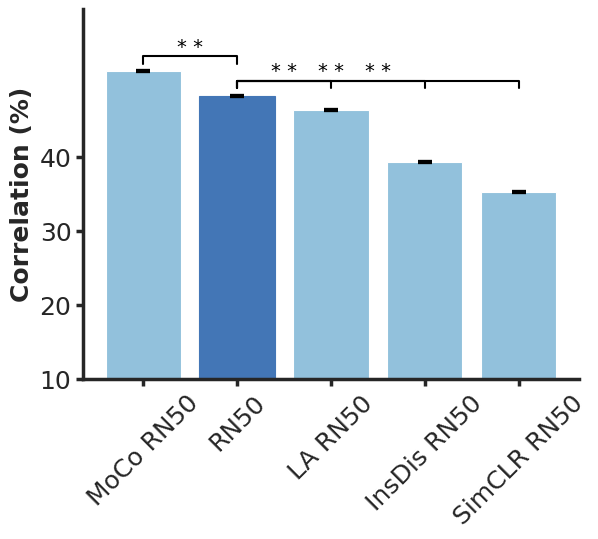

In [ ]:
fig6b2()

## Fig 6c

In [ ]:
def fig6c1():

  model_list=['resnext101','wsl_resnext101']

  session_list=['m_ohp_session1','m_ohp_session2','m_stretch_session1','m_stretch_session2','s_ohp_session1','n_stretch_session1','s_stretch_session1']

  conf_medians_dict = with_norm_np(model_list,'V4_new',session_list, "ID_NP",filter)
  conf_mean_dict = load_dict(model_list,'V4_new',session_list, "ID_NP",filter)
  sorted_mean_dict = dict( sorted(conf_mean_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

  var_dict={k:  100*variance(v) for k, v in conf_medians_dict.items()}
  print(var_dict)
  sorted_var_dict={k:var_dict[k] for k in list(sorted_mean_dict.keys())}

  json_object = json.dumps(var_dict, indent = 4)



  fig, ax = plt.subplots()
  barlist=ax.bar(range(len(sorted_mean_dict)),list(sorted_mean_dict.values()), yerr=sorted_var_dict.values(), error_kw=dict(lw=5, capsize=5, capthick=3),color=ID_shadow)

  figure_arch={}
  figure_arch['resnext101']='ResNext101\n(IN (1 million))'
  figure_arch['wsl_resnext101']='WSL ResNext101\n(IG (3.5 billion))'
  figure_arch_list=[figure_arch[k] for k in list(sorted_mean_dict.keys())]
  base_index = list(sorted_mean_dict).index('resnext101')
  barlist[base_index].set_facecolor(ID_color)
  ttest_dict = ttest_info_dict(model_list, 'V4_new', session_list, "resnext101", "ID_NP")
  print(ttest_dict)
  sorted_model_value_list = list(sorted_mean_dict.values())
  sorted_model_list = list(sorted_mean_dict.keys())
  print(sorted_model_list)
  for x in range(len(sorted_mean_dict)):
    h = 1
    if x == base_index:
      continue
    else:
      y1=max((sorted_model_value_list[base_index]+list(sorted_var_dict.values())[base_index]+1),(list(sorted_mean_dict.values())[x]+list(sorted_var_dict.values())[base_index]+1))
      plt.plot([x,x, base_index, base_index], [y1,y1+h,y1+h,y1], linewidth=1.5, color='k')
      plt.text((x+base_index)*.5, y1+1, ttest_dict[sorted_model_list[x]], ha='center', va='bottom', color='k', fontsize=14)



  plt.ylim(70,80)


  plt.xticks( range(len(figure_arch_list)),figure_arch_list,rotation = 45, fontsize=18)
  plt.yticks([70,75,80],fontsize=18)
  plt.ylabel('Correlation (%)', fontsize=18, weight = 'bold'),

  sns.despine()
  # plt.savefig('/content/figures/simplified-architecture-synthetic-performance.pdf',bbox_inches='tight')

  return ""

{'resnext101': 0.0007713726775095587, 'wsl_resnext101': 0.0008303743291383267}
{'resnext101': 'n.s.', 'wsl_resnext101': '* *'}
['resnext101', 'wsl_resnext101']


''

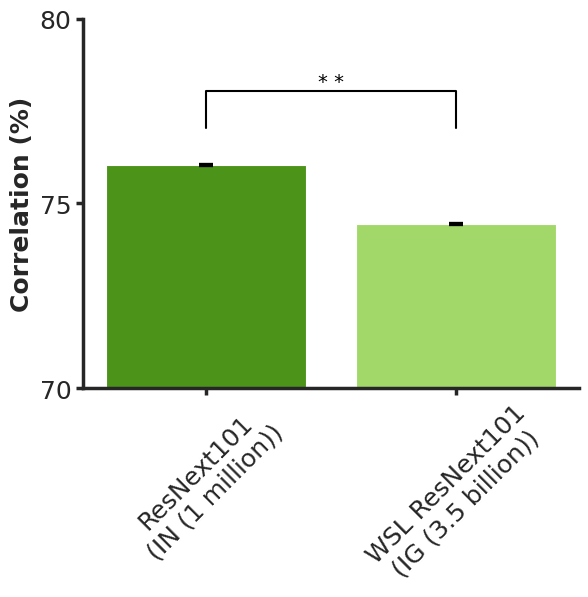

In [ ]:
#top left
fig6c1()

In [ ]:
def fig6c2():

  model_list=['resnext101','wsl_resnext101']

  session_list=['m_ohp_session1','m_ohp_session2','m_stretch_session1','m_stretch_session2','s_ohp_session1','n_stretch_session1','s_stretch_session1']

  conf_medians_dict = with_norm_np(model_list,'V4_new',session_list, "OOD_NP",filter)
  conf_mean_dict = load_dict(model_list,'V4_new',session_list, "OOD_NP",filter)
  sorted_mean_dict = dict( sorted(conf_mean_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

  var_dict={k:  100*variance(v) for k, v in conf_medians_dict.items()}
  print(var_dict)
  sorted_var_dict={k:var_dict[k] for k in list(sorted_mean_dict.keys())}

  json_object = json.dumps(var_dict, indent = 4)



  fig, ax = plt.subplots()
  barlist=ax.bar(range(len(sorted_mean_dict)),list(sorted_mean_dict.values()), yerr=sorted_var_dict.values(), error_kw=dict(lw=5, capsize=5, capthick=3),color=OOD_shadow)

  figure_arch={}

  figure_arch['resnext101']='ResNext101\n(IN (1 million))'
  figure_arch['wsl_resnext101']='WSL ResNext101\n(IG (3.5 billion))'
  figure_arch_list=[figure_arch[k] for k in list(sorted_mean_dict.keys())]
  base_index = list(sorted_mean_dict).index('resnext101')
  barlist[base_index].set_facecolor(OOD_color)
  ttest_dict = ttest_info_dict(model_list, 'V4_new', session_list, "resnext101", "OOD_NP")
  print(ttest_dict)
  sorted_model_value_list = list(sorted_mean_dict.values())
  sorted_model_list = list(sorted_mean_dict.keys())
  print(sorted_model_list)
  for x in range(len(sorted_mean_dict)):
    h = 1
    if x == base_index:
      continue
    else:
      y1=max((sorted_model_value_list[base_index]+list(sorted_var_dict.values())[base_index]+1),(list(sorted_mean_dict.values())[x]+list(sorted_var_dict.values())[base_index]+1))
      plt.plot([x,x, base_index, base_index], [y1,y1+h,y1+h,y1], linewidth=1.5, color='k')
      plt.text((x+base_index)*.5, y1+1, ttest_dict[sorted_model_list[x]], ha='center', va='bottom', color='k', fontsize=14)


  plt.ylim(40,55)
  plt.xticks( range(len(figure_arch_list)),figure_arch_list,rotation = 45, fontsize=18)
  plt.yticks([40,45,50,55],fontsize=18)
  plt.ylabel('Correlation (%)', fontsize=18, weight='bold'),
  sns.despine()
  # plt.savefig('/content/figures/simplified-architecture-synthetic-performance.pdf',bbox_inches='tight')
  return ""

{'resnext101': 0.0025078167412581833, 'wsl_resnext101': 0.0013208272866605563}
{'resnext101': 'n.s.', 'wsl_resnext101': '* *'}
['resnext101', 'wsl_resnext101']


''

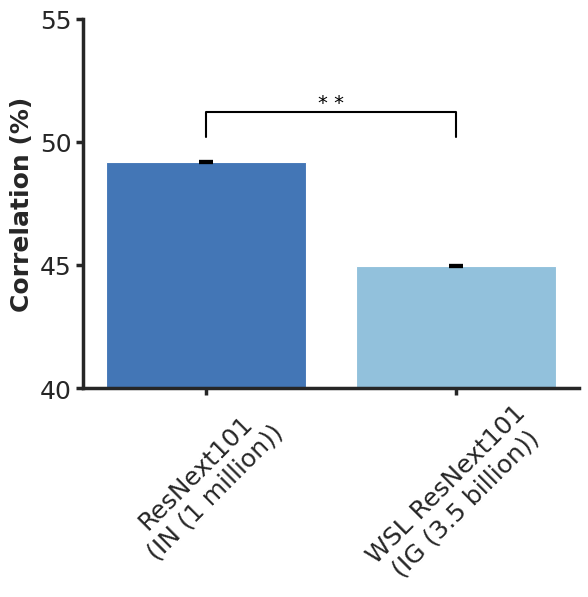

In [ ]:
# bottom left
fig6c2()

In [ ]:
def fig6c3():
  model_list=['st_resnet','place365_rn50','clip']

  session_list=['m_ohp_session1','m_ohp_session2','m_stretch_session1','m_stretch_session2','s_ohp_session1','n_stretch_session1','s_stretch_session1']

  conf_medians_dict = with_norm_np(model_list,'V4_new',session_list, "ID_NP",filter)
  conf_mean_dict = load_dict(model_list,'V4_new',session_list, "ID_NP",filter)
  sorted_mean_dict = dict( sorted(conf_mean_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

  var_dict={k:  100*variance(v) for k, v in conf_medians_dict.items()}

  sorted_var_dict={k:var_dict[k] for k in list(sorted_mean_dict.keys())}

  json_object = json.dumps(var_dict, indent = 4)



  fig, ax = plt.subplots()
  barlist=ax.bar(range(len(sorted_mean_dict)),list(sorted_mean_dict.values()), yerr=sorted_var_dict.values(), error_kw=dict(lw=5, capsize=5, capthick=3),color=ID_shadow)

  figure_arch={}
  # figure_arch['CORnet-Z']='CORnet-Z'
  # figure_arch['VOneCORnet-S']='VOneCORnet-S'
  # figure_arch['wide_resnet50']='wide RN50'
  figure_arch['st_resnet']='RN50\n(IN (1 million))'
  figure_arch['place365_rn50']='Place365 RN50\n(Places365 1.8 million)'
  figure_arch['clip']='CLIP RN50\n(CLIP (400 million))'
  # figure_arch['CORnet-S']='CORnet-S'
  figure_arch_list=[figure_arch[k] for k in list(sorted_mean_dict.keys())]
  base_index = list(sorted_mean_dict).index('st_resnet')
  barlist[base_index].set_facecolor(ID_color)
  ttest_dict = ttest_info_dict(model_list, 'V4_new', session_list, "st_resnet", "ID_NP")

  sorted_model_value_list = list(sorted_mean_dict.values())
  sorted_model_list = list(sorted_mean_dict.keys())
  for x in range(len(sorted_mean_dict)):
    h = 1
    if x == base_index:
      continue
    else:
      y1=max((sorted_model_value_list[base_index]+list(sorted_var_dict.values())[base_index]+1),(list(sorted_mean_dict.values())[x]+list(sorted_var_dict.values())[base_index]+1))
      plt.plot([x,x, base_index, base_index], [y1,y1+h,y1+h,y1], linewidth=1.5, color='k')
      plt.text((x+base_index)*.5, y1+1, ttest_dict[sorted_model_list[x]], ha='center', va='bottom', color='k', fontsize=14)


  plt.ylim(70,80)
  # plt.title('synthetic performance')
  # print()
  # plt.xticks(range(len(figure_arch_list)),figure_arch_list,rotation = 45)

  plt.xticks( range(len(figure_arch_list)),figure_arch_list,rotation = 45, fontsize=18)
  plt.yticks([70,75,80],fontsize=18)
  plt.ylabel('Correlation (%)', fontsize=18, weight='bold'),
  # plt.xlabel('(b)', fontsize=22,labelpad=-10),
  sns.despine()
  # plt.savefig('/content/figures/simplified-architecture-synthetic-performance.pdf',bbox_inches='tight')

  return ""

''

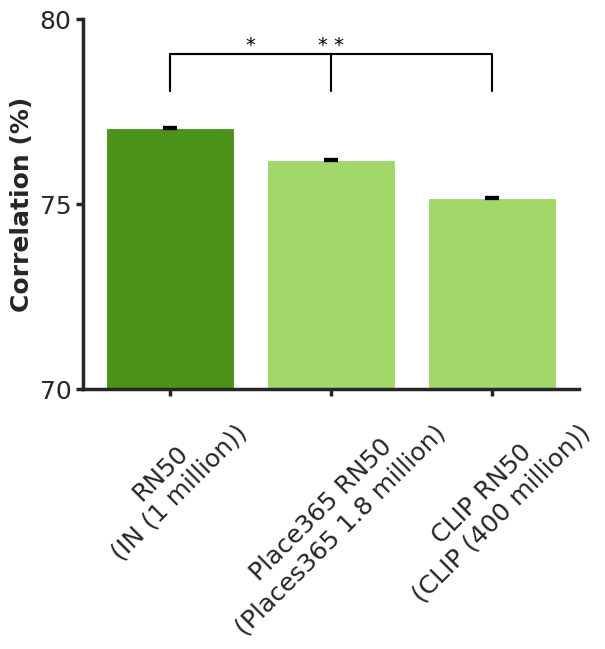

In [ ]:
#top right
fig6c3()

In [ ]:
def fig6c4():
  model_list=['st_resnet','place365_rn50','clip']

  session_list=['m_ohp_session1','m_ohp_session2','m_stretch_session1','m_stretch_session2','s_ohp_session1','n_stretch_session1','s_stretch_session1']

  conf_medians_dict = with_norm_np(model_list,'V4_new',session_list, "OOD_NP",filter)
  conf_mean_dict = load_dict(model_list,'V4_new',session_list, "OOD_NP",filter)

  sorted_mean_dict = dict( sorted(conf_mean_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

  var_dict={k:  100*variance(v) for k, v in conf_medians_dict.items()}

  sorted_var_dict={k:var_dict[k] for k in list(sorted_mean_dict.keys())}

  json_object = json.dumps(var_dict, indent = 4)



  fig, ax = plt.subplots()
  barlist=ax.bar(range(len(sorted_mean_dict)),list(sorted_mean_dict.values()), yerr=sorted_var_dict.values(), error_kw=dict(lw=5, capsize=5, capthick=3),color=OOD_shadow)

  figure_arch={}
  # figure_arch['CORnet-Z']='CORnet-Z'
  # figure_arch['VOneCORnet-S']='VOneCORnet-S'
  # figure_arch['wide_resnet50']='wide RN50'
  figure_arch['st_resnet']='RN50\n(IN (1 million))'
  figure_arch['place365_rn50']='Place365 RN50\n(Places365 1.8 million)'
  figure_arch['clip']='CLIP RN50\n(CLIP (400 million))'
  # figure_arch['CORnet-S']='CORnet-S'
  figure_arch_list=[figure_arch[k] for k in list(sorted_mean_dict.keys())]
  base_index = list(sorted_mean_dict).index('st_resnet')
  barlist[base_index].set_facecolor(OOD_color)
  ttest_dict = ttest_info_dict(model_list, 'V4_new', session_list, "st_resnet", "OOD_NP")

  sorted_model_value_list = list(sorted_mean_dict.values())
  sorted_model_list = list(sorted_mean_dict.keys())

  for x in range(len(sorted_mean_dict)):
    h = 1
    if x == base_index:
      continue
    else:
      y1=max((sorted_model_value_list[base_index]+list(sorted_var_dict.values())[base_index]+1),(list(sorted_mean_dict.values())[x]+list(sorted_var_dict.values())[base_index]+1))
      plt.plot([x,x, base_index, base_index], [y1,y1+h,y1+h,y1], linewidth=1.5, color='k')
      plt.text((x+base_index)*.5, y1+1, ttest_dict[sorted_model_list[x]], ha='center', va='bottom', color='k', fontsize=14)



  plt.ylim(40,55)

  plt.xticks( range(len(figure_arch_list)),figure_arch_list,rotation = 45, fontsize=18)
  plt.yticks([40,45, 50,55],fontsize=18)
  plt.ylabel('Neural Predictivity', fontsize=18, weight='bold'),
  sns.despine()
  # plt.savefig('/content/figures/simplified-architecture-synthetic-performance.pdf',bbox_inches='tight')

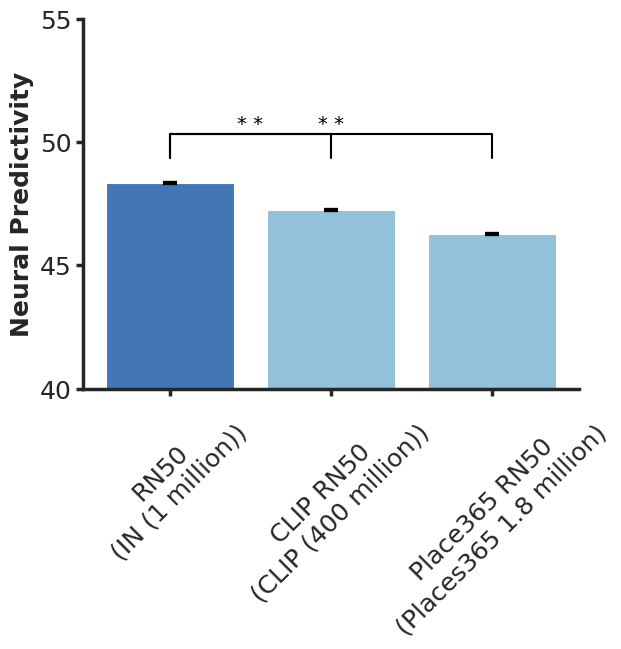

In [ ]:
# bottom right
fig6c4()

## Fig7a

In [ ]:
import random
from itertools import combinations
from scipy import stats
from matplotlib import pyplot

def load_across_model_corr(model_list, session_list):
  group_ood_data = []
  for model in model_list:
    if len(group_ood_data) == 0:
      group_ood_data=with_norm_np_per_model_per_neuron(model, "V4_new", session_list,"OOD_NP",True)
    else:
      group_ood_data=np.vstack([group_ood_data,with_norm_np_per_model_per_neuron(model, "V4_new", session_list,"OOD_NP",True)])

  group_id_data = []
  for model in model_list:
    if len(group_id_data) == 0:
      group_id_data=with_norm_np_per_model_per_neuron(model, "V4_new", session_list,"ID_NP",True)
    else:
      group_id_data=np.vstack([group_id_data,with_norm_np_per_model_per_neuron(model, "V4_new", session_list,"ID_NP",True)])

  tuple_list = []
  for i in combinations(list(range(len(model_list))), 2):
      tuple_list.append(i)
  OOD_corr_result_list = []
  ID_corr_result_list = []
  for t in tuple_list:
    first_ind = t[0]
    sencod_ind = t[1]
    coef, p  = stats.spearmanr(group_ood_data[first_ind], group_ood_data[sencod_ind])
    OOD_corr_result_list.append(coef)
  for t in tuple_list:
    first_ind = t[0]
    sencod_ind = t[1]
    coef, p  = stats.spearmanr(group_id_data[first_ind], group_id_data[sencod_ind])
    ID_corr_result_list.append(coef)
  return OOD_corr_result_list, ID_corr_result_list

def load_within_model_corr(model_list, session_list):
  tuple_list = []
  for i in combinations(list(range(5)), 2):
      tuple_list.append(i)
  OOD_corr_result_list = []
  ID_corr_result_list = []
  for m in model_list:
    OOD_per_model_top_4 = with_norm_np_per_model_per_neuron(m, "V4_new", session_list, "OOD_NP",filtered=True, train_type = "natural", per_neuron = True, top_4 = True)

    for t in tuple_list:
      first_ind = t[0]
      sencod_ind = t[1]
      coef, p  = stats.spearmanr(OOD_per_model_top_4[first_ind], OOD_per_model_top_4[sencod_ind])
      OOD_corr_result_list.append(coef)

    ID_per_model_top_4 = with_norm_np_per_model_per_neuron(m, "V4_new", session_list, "ID_NP",filtered=True, train_type = "natural", per_neuron = True, top_4 = True)


    for t in tuple_list:
      first_ind = t[0]
      sencod_ind = t[1]
      coef, p  = stats.spearmanr(ID_per_model_top_4[first_ind], ID_per_model_top_4[sencod_ind])
      ID_corr_result_list.append(coef)
  return OOD_corr_result_list, ID_corr_result_list

In [ ]:
def correlation_hist(model_list, session_list, choice):
  if choice == "within_model":
    OOD_corr_result_list, ID_corr_result_list = load_within_model_corr([ 'l2_3', 'resnet50_l2_eps0.25', 'resnet50_l2_eps1', 'resnet50_l2_eps3', 'resnet50_l2_eps0.5', 'st_resnet'], session_list)

  if choice == "across_model":
    OOD_corr_result_list, ID_corr_result_list = load_across_model_corr(model_list, session_list)
  _, ax = plt.subplots()

  sns.histplot(ID_corr_result_list,  label='Nat. Neural Prediction', color = ID_color, binwidth = 0.01)
  sns.histplot(OOD_corr_result_list, label='Syn. Neural Prediction', color = OOD_color, binwidth = 0.01)
  sns.despine()
  plt.axvline(x=mean(ID_corr_result_list),
            color='green',
            ls='--',
            lw=2.5)
  plt.axvline(x=mean(OOD_corr_result_list),
          color='blue',
          ls='--',
          lw=2.5)
  plt.legend(loc=(0.15, 0.8), prop={'size': 13})
  plt.ylabel("Num. Of Neurons", fontsize = 22, weight='bold')
  plt.xlabel("Score Consistency", fontsize = 22, weight='bold')
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=22)

  ax.yaxis.set_major_locator(MaxNLocator(integer=True))
  if choice == "across_model":
    ax.yaxis.set_major_locator(plt.MultipleLocator(16))
  else:
    ax.yaxis.set_major_locator(plt.MultipleLocator(8))
  #plt.savefig()
  plt.tight_layout()
  #plt.savefig(f'/content/gdrive/MyDrive/paper_figures/{choice}_correlation_hist.pdf',bbox_inches='tight', format='pdf')
  plt.show()
  return ""


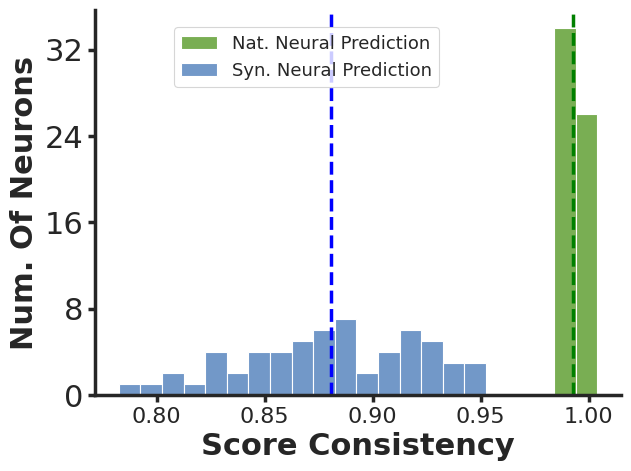

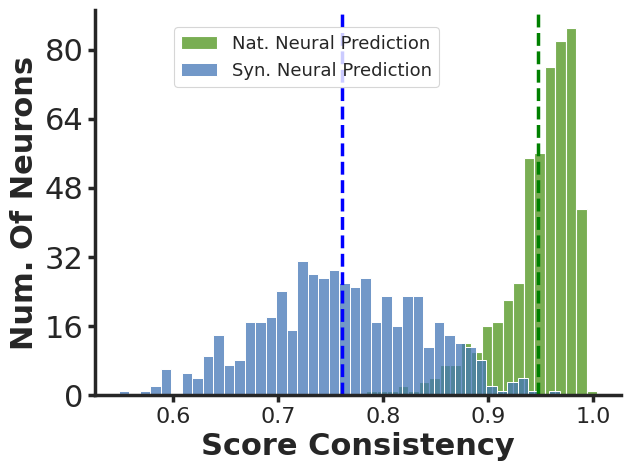

''

In [ ]:
# Fig 7a left
correlation_hist(model_list, session_list, "within_model")
correlation_hist(model_list, session_list, "across_model")

In [ ]:
def fig7a_bottom_right():
  #session = 'm_ohp_session1'
  _, ax = plt.subplots()
  tuple_list = []
  ID_corr_result_list = []
  OOD_corr_result_list = []
  for i in combinations(list(range(5)), 2):
    tuple_list.append(i)
  for session in session_list:
    ID_per_model_top_5_layer_image_pred = with_norm_np_per_model_per_neuron("st_resnet", "V4_new", [session],"ID_NP",True, top_4 = True, per_neuron_hist = True)
    OOD_per_model_top_5_layer_image_pred = with_norm_np_per_model_per_neuron("st_resnet", "V4_new", [session],"OOD_NP",True, top_4 = True, per_neuron_hist = True)
    for t in tuple_list:
      layer_1_ind = t[0]
      layer_2_ind = t[1]
      layer_1_ID = np.squeeze(ID_per_model_top_5_layer_image_pred[layer_1_ind])
      layer_2_ID = np.squeeze(ID_per_model_top_5_layer_image_pred[layer_2_ind])
      layer_1_OOD = np.squeeze(OOD_per_model_top_5_layer_image_pred[layer_1_ind])
      layer_2_OOD = np.squeeze(OOD_per_model_top_5_layer_image_pred[layer_2_ind])
      num_neuron = layer_1_ID.shape[0]
      for neuron_ind in range(num_neuron):
        ID_coef, ID_p  = stats.spearmanr(layer_1_ID[neuron_ind], layer_2_ID[neuron_ind])
        OOD_coef, OOD_p  = stats.spearmanr(layer_1_OOD[neuron_ind], layer_2_OOD[neuron_ind])
        ID_corr_result_list.append(ID_coef)
        OOD_corr_result_list.append(OOD_coef)
  sns.histplot(ID_corr_result_list,  label='Nat. Neural Prediction', color = ID_color, binwidth = 0.1)
  plt.axvline(x=mean(ID_corr_result_list),
            color='green',
            ls='--',
            lw=2.5)
  sns.histplot(OOD_corr_result_list, label='Syn. Neural Prediction', color = OOD_color, binwidth = 0.1)
  plt.axvline(x=mean(OOD_corr_result_list),
          color='blue',
          ls='--',
          lw=2.5)
  sns.despine()
  plt.xticks(fontsize=16)
  plt.yticks(fontsize = 18)


  ax.yaxis.set_major_locator(plt.MultipleLocator(100))
  ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
  plt.ylabel("Count", fontsize = 22, weight='bold')
  plt.xlabel("Prediction Correlation", fontsize = 22, weight='bold')
  plt.legend(loc=(0.15, 0.8), prop={'size': 13})
  return ""
  #plt.savefig(f'/content/gdrive/MyDrive/paper_figures/within_model_per_neuron_correlation_hist.pdf',bbox_inches='tight', format='pdf')


In [ ]:
def fig7a_top_right():
  top_5_model_list = [ 'l2_3', 'resnet50_l2_eps0.25', 'resnet50_l2_eps1', 'resnet50_l2_eps3', 'resnet50_l2_eps0.5']
  six_model_list = [ 'l2_3', 'resnet50_l2_eps0.25', 'resnet50_l2_eps1', 'resnet50_l2_eps3', 'resnet50_l2_eps0.5', 'st_resnet']
  _, ax = plt.subplots()
  tuple_list = []
  ID_corr_result_list = []
  OOD_corr_result_list = []
  for i in combinations(list(range(6)), 2):
    tuple_list.append(i)
  for session in session_list:
    for t in tuple_list:
      model_1_ind = t[0]
      model_2_ind = t[1]
      model_1 = six_model_list[model_1_ind]
      model_2 = six_model_list[model_2_ind]
      ID_per_model_top_layer_image_pred1 = with_norm_np_per_model_per_neuron(model_1, "V4_new", [session],"ID_NP",True, top_4 = False, per_neuron_hist = True)
      ID_per_model_top_layer_image_pred2 = with_norm_np_per_model_per_neuron(model_2, "V4_new", [session],"ID_NP",True, top_4 = False, per_neuron_hist = True)
      OOD_per_model_top_layer_image_pred1 = with_norm_np_per_model_per_neuron(model_1, "V4_new", [session],"OOD_NP",True, top_4 = False, per_neuron_hist = True)
      OOD_per_model_top_layer_image_pred2 = with_norm_np_per_model_per_neuron(model_2, "V4_new", [session],"OOD_NP",True, top_4 = False, per_neuron_hist = True)
      num_neuron = ID_per_model_top_layer_image_pred1.shape[0]
      for neuron_ind in range(num_neuron):
        ID_coef, ID_p  = stats.spearmanr(ID_per_model_top_layer_image_pred1[neuron_ind], ID_per_model_top_layer_image_pred2[neuron_ind])
        OOD_coef, OOD_p  = stats.spearmanr(OOD_per_model_top_layer_image_pred1[neuron_ind], OOD_per_model_top_layer_image_pred2[neuron_ind])
        ID_corr_result_list.append(ID_coef)
        OOD_corr_result_list.append(OOD_coef)

  sns.histplot(ID_corr_result_list,  label='Nat. Neural Prediction', color = ID_color, binwidth = 0.1, stat = "density")
  plt.axvline(x=mean(ID_corr_result_list),
            color='green',
            ls='--',
            lw=2.5)
  sns.histplot(OOD_corr_result_list, label='Syn. Neural Prediction', color = OOD_color, binwidth = 0.1, stat = "density")
  plt.axvline(x=mean(OOD_corr_result_list),
          color='blue',
          ls='--',
          lw=2.5)

  sns.despine(left = True)
  plt.xticks(fontsize=16)
  ax.set_yticks([])
  ax.set_ylabel('')
  ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
  plt.xlabel("Prediction Correlation", fontsize = 22, weight='bold')
  plt.legend(loc=(0.15, 0.8), prop={'size': 13})
  return ""
  #plt.savefig(f'/content/gdrive/MyDrive/paper_figures/across_model_per_neuron_correlation_hist.pdf',bbox_inches='tight', format='pdf')

''

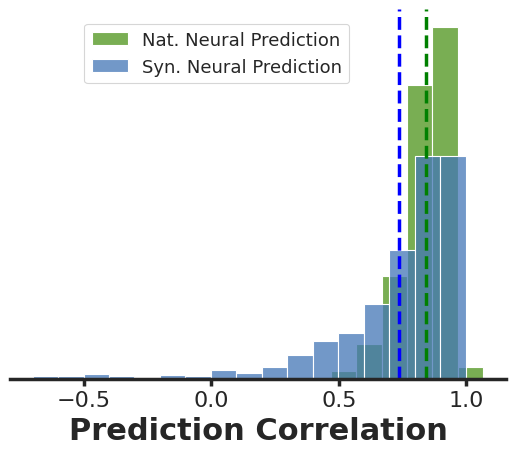

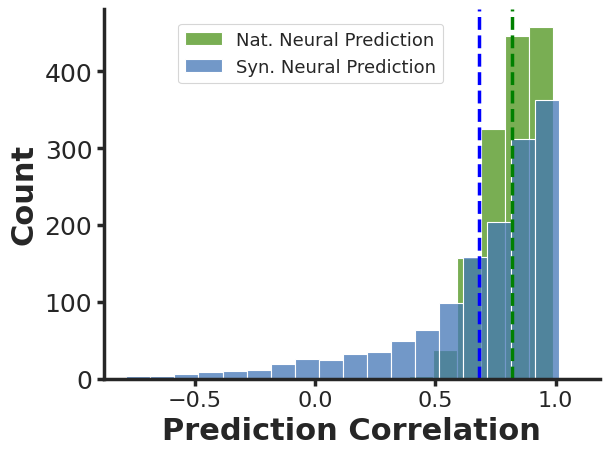

In [ ]:
fig7a_top_right()
fig7a_bottom_right()

## Fig 7b

In [ ]:
def single_layer_model_ensemble_normal_compare_bar(model_list, session_list, choice):
  top_5_model_list = [ 'l2_3', 'resnet50_l2_eps0.25', 'resnet50_l2_eps1', 'resnet50_l2_eps3', 'resnet50_l2_eps0.5']
  five_model_list = model_list
  if choice == "ID_NP":
    first_color = ID_shadow
    second_color = ID_color
    third_color = ID_third
  else:
    first_color = OOD_shadow
    second_color = OOD_color
    third_color = OOD_third
  X_axis = np.arange(len(model_list))
  model_name_map = {'st_resnet': "RN50",
                    'l2_3':'L2: \u03B5 =3.0 RN50',
                    "resnet50_l2_eps0.25": 'L2: \u03B5 =0.25 RN50',
                    "resnet50_l2_eps1": 'L2: \u03B5 =1 RN50',
                    "resnet50_l2_eps3": 'L2: \u03B5 =3 RN50',
                    "resnet50_l2_eps0.5": 'L2: \u03B5 =0.5 RN50',
                    "st_resnet": 'RN50'}
  X_axis_list=[model_name_map[m] for m in model_list]
  _, ax = plt.subplots(figsize=(20,5))
  per_neruon_dict = load_dict(model_list,"V4_new",session_list, choice,filtered=True, synth_best = True, train_type = 'natural')
  ensemble_mean_dict = load_dict(model_list,"V4_new",session_list, choice,filtered=True, synth_best = False, train_type = 'natural', ensemble_mean = True)
  ensemble_median_dict = load_dict(model_list,"V4_new",session_list, choice,filtered=True, synth_best = False, train_type = 'natural', ensemble_mean = True, ensemble_choice = "median")
  raw_ensemble_mean_dict = with_norm_np(model_list, "V4_new", session_list,choice,filtered=True, synth_best = False, train_type = "natural", top_4 = False, ensemble_mean = True, ensemble_choice = "mean")
  raw_ensemble_median_dict = with_norm_np(model_list, "V4_new", session_list,choice,filtered=True, synth_best = False, train_type = "natural", top_4 = False, ensemble_mean = True, ensemble_choice = "median")
  raw_per_neuron_dict = with_norm_np(model_list, "V4_new", session_list,choice,filtered=True, synth_best = True, train_type = "natural", top_4 = False)
  print("raw_ensemble_mean_dict")
  print(raw_ensemble_mean_dict)


  mean_sig_dict= ensemble_ttest_info_dict(five_model_list, "V4_new", session_list, "ID_NP", "mean")
  median_sig_dict= ensemble_ttest_info_dict(five_model_list, "V4_new", session_list, "ID_NP", "median")
  ensemble_mean_var_dict = {k: variance(v) for k, v in raw_ensemble_mean_dict.items()}
  ensemble_median_var_dict = {k: variance(v) for k, v in raw_ensemble_median_dict.items()}
  per_neuron_var_dict = {k: variance(v) for k, v in raw_per_neuron_dict.items()}
  print(per_neuron_var_dict)
  ax.bar(X_axis - 0.25, [x/100 for x in list(per_neruon_dict.values())], 0.2, label = 'Single Model',yerr=list(ensemble_mean_var_dict.values()), error_kw=dict(lw=5, capsize=5, capthick=3),color=first_color)
  ax.bar(X_axis + 0, [x / 100 for x in list(ensemble_mean_dict.values())], 0.2, label = 'Mean Ensemble',yerr=list(ensemble_median_var_dict.values()), error_kw=dict(lw=5, capsize=5, capthick=3),color=second_color)
  ax.bar(X_axis + 0.25, [x / 100 for x in list(ensemble_median_dict.values())], 0.2, label = 'Median Ensemble',yerr=list(per_neuron_var_dict.values()), error_kw=dict(lw=5, capsize=5, capthick=3),color=third_color)
  sns.despine()

  for i,(k,v) in enumerate(mean_sig_dict.items()):
    plt.text(i,  ensemble_mean_dict[k] / 100 + 0.01, mean_sig_dict[k], ha='center', va='bottom', color='k', fontsize=14)
  for i,(k,v) in enumerate(median_sig_dict.items()):
    plt.text(i + 0.25,  ensemble_median_dict[k] / 100 + 0.01, median_sig_dict[k], ha='center', va='bottom', color='k', fontsize=14)

  if choice == "ID_NP":
    plt.ylim([0.7, 0.90])
    yticks = [0.7, 0.75, 0.8, 0.85, 0.9]
  else:
    plt.ylim([0.35, 0.7])
    yticks = [0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
  plt.yticks(yticks, fontsize = 18)
  plt.xticks(X_axis, X_axis_list,rotation = 45, fontsize=18)
  plt.ylabel("Neural Predictivity", fontsize = 22, weight = 'bold')
  plt.legend(loc="upper right", fontsize=18)
  #plt.savefig(f'/content/gdrive/MyDrive/paper_figures/{choice}_layer_model_ensemble_normal_compare_bar.pdf',bbox_inches='tight')
  plt.show()
  return ""

raw_ensemble_mean_dict
{'l2_3': array([0.83598403, 0.84083098, 0.8467705 , 0.84626773, 0.83841614]), 'resnet50_l2_eps0.25': array([0.85035387, 0.85680694, 0.86048598, 0.85491394, 0.85017488]), 'resnet50_l2_eps1': array([0.84921374, 0.85629366, 0.85693792, 0.85802618, 0.85371286]), 'resnet50_l2_eps0.5': array([0.85185498, 0.85900691, 0.86052424, 0.8607306 , 0.85159083]), 'st_resnet': array([0.80339921, 0.80221914, 0.81162209, 0.80578766, 0.79831378])}
mean
median
{'l2_3': 2.5391025733008296e-05, 'resnet50_l2_eps0.25': 3.711641801673631e-05, 'resnet50_l2_eps1': 2.1502043760731873e-05, 'resnet50_l2_eps0.5': 6.4207649143574e-05, 'st_resnet': 2.5457089704893453e-05}


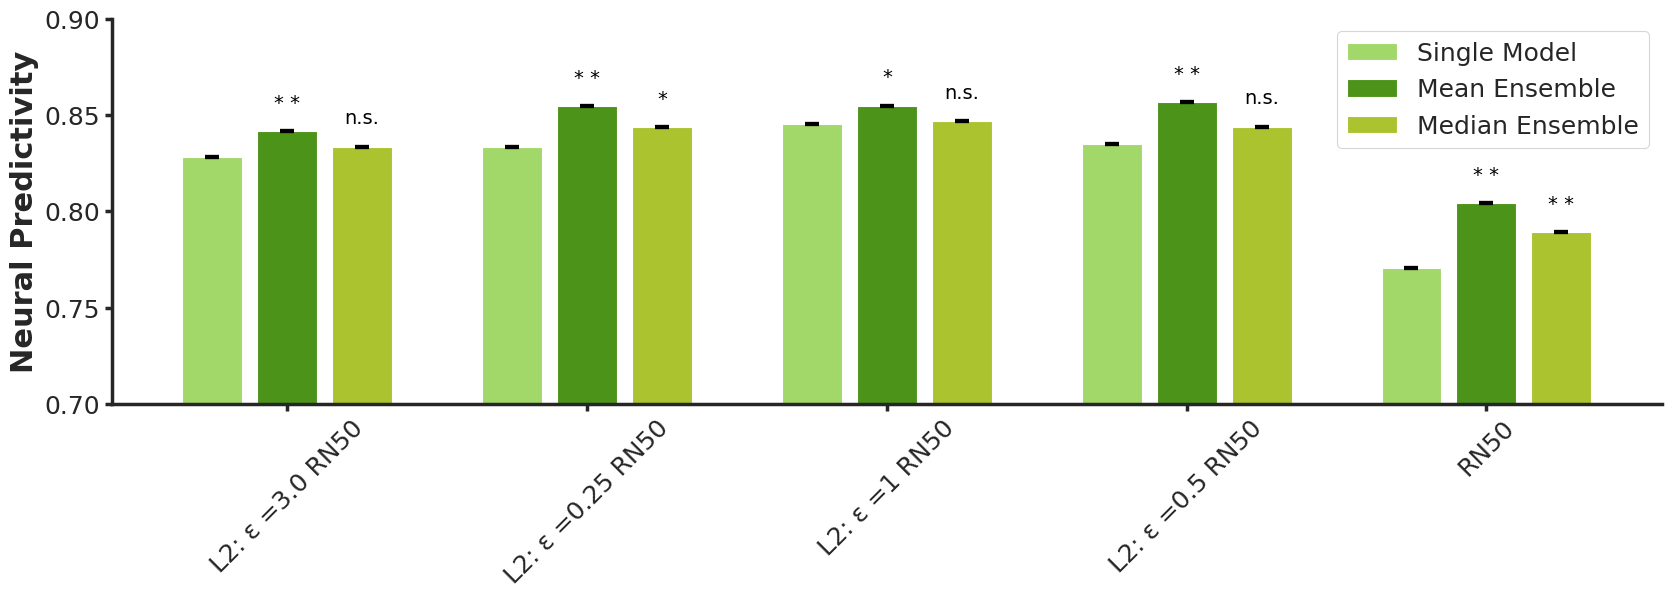

raw_ensemble_mean_dict
{'l2_3': array([0.45124865, 0.45466457, 0.45365737, 0.44595207, 0.44455511]), 'resnet50_l2_eps0.25': array([0.59177763, 0.60247507, 0.59196787, 0.59193245, 0.58940989]), 'resnet50_l2_eps1': array([0.57097713, 0.5642753 , 0.56631609, 0.56459731, 0.5711039 ]), 'resnet50_l2_eps0.5': array([0.5667895 , 0.56101944, 0.56903812, 0.56502715, 0.56458994]), 'st_resnet': array([0.53647256, 0.5346447 , 0.5381411 , 0.53572199, 0.5342452 ])}
mean
median
{'l2_3': 1.4152055884208193e-05, 'resnet50_l2_eps0.25': 1.6852619740614883e-05, 'resnet50_l2_eps1': 6.417692243988496e-05, 'resnet50_l2_eps0.5': 1.497769616977564e-05, 'st_resnet': 1.4691006997761439e-05}


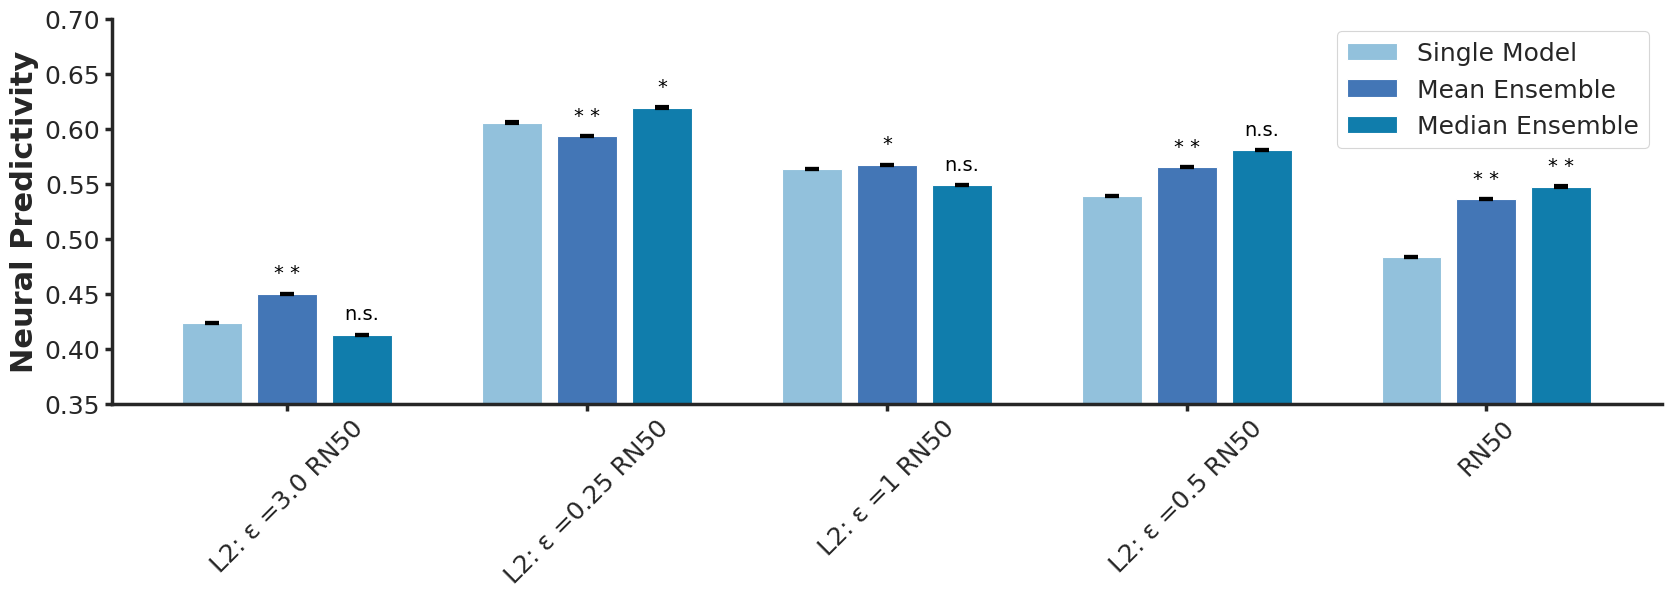

''

In [ ]:
fig7b_model_list = [ 'l2_3', 'resnet50_l2_eps0.25', 'resnet50_l2_eps1', 'resnet50_l2_eps0.5', 'st_resnet']
single_layer_model_ensemble_normal_compare_bar(fig7b_model_list, session_list,"ID_NP")
single_layer_model_ensemble_normal_compare_bar(fig7b_model_list, session_list,"OOD_NP")

## Fig 7c

In [ ]:
def layer_model_ensemble_normal_compare_bar():
  _, ax = plt.subplots(figsize=(5,5))
  ID_per_neruon_dict = load_dict(['resnet50_l2_eps1'],"V4_new",session_list, "ID_NP",filtered=True, synth_best = True, train_type = 'natural')
  ID_ensemble_mean_dict = load_dict(['resnet50_l2_eps1'],"V4_new",session_list, "ID_NP",filtered=True, synth_best = False, train_type = 'natural', ensemble_mean = True)
  ID_model_ensemble_mean_dict = load_dict(['model'],"V4_new",session_list, "ID_NP",filtered=True, synth_best = False, train_type = 'natural', ensemble_mean = True)
  ID_per_neruon_dict_raw = with_norm_np(['resnet50_l2_eps1'], "V4_new", session_list,"ID_NP",filtered = True, synth_best= True, train_type = 'natural')['resnet50_l2_eps1']
  ID_model_ensemble_raw = with_norm_np(['model'], "V4_new", session_list,"ID_NP",filtered = True, synth_best= False, train_type = 'natural', ensemble_mean = True)['model']
  ID_best_model_ensemble_raw = with_norm_np(['resnet50_l2_eps1'], "V4_new", session_list,"ID_NP",filtered = True, synth_best= False, train_type = 'natural', ensemble_mean = True)['resnet50_l2_eps1']
  ttest_info=stats.ttest_ind( ID_per_neruon_dict_raw,ID_best_model_ensemble_raw)
  OOD_per_neruon_dict = load_dict(['resnet50_l2_eps1'],"V4_new",session_list, "OOD_NP",filtered=True, synth_best = True, train_type = 'natural')
  OOD_ensemble_mean_dict = load_dict(['resnet50_l2_eps1'],"V4_new",session_list, "OOD_NP",filtered=True, synth_best = False, train_type = 'natural', ensemble_mean = True)
  OOD_per_neruon_dict_raw = with_norm_np(['resnet50_l2_eps1'], "V4_new", session_list,"OOD_NP",filtered = True, synth_best= True, train_type = 'natural')['resnet50_l2_eps1']
  OOD_model_ensemble_mean_dict = load_dict(['model'],"V4_new",session_list, "OOD_NP",filtered=True, synth_best = False, train_type = 'natural', ensemble_mean = True)
  OOD_model_ensemble_raw = with_norm_np(['model'], "V4_new", session_list,"OOD_NP",filtered = True, synth_best= False, train_type = 'natural', ensemble_mean = True)['model']
  OOD_best_model_ensemble_raw = with_norm_np(['resnet50_l2_eps1'], "V4_new", session_list,"OOD_NP",filtered = True, synth_best= False, train_type = 'natural', ensemble_mean = True)['resnet50_l2_eps1']
  ttest_info=stats.ttest_ind( OOD_per_neruon_dict_raw,OOD_best_model_ensemble_raw)

  ax.bar(1, ID_per_neruon_dict["resnet50_l2_eps1"],yerr = variance(ID_per_neruon_dict_raw), width = 0.6, error_kw=dict(lw=5, capsize=5, capthick=3), label = "ID_per_neuron", color = ID_shadow)
  ax.bar(1.5, ID_ensemble_mean_dict["resnet50_l2_eps1"], yerr=variance(ID_best_model_ensemble_raw), error_kw=dict(lw=5, capsize=5, capthick=3), width = 0.6, label = "ID_layer_ensemble", color = ID_color)
  ax.bar(2, ID_model_ensemble_mean_dict["model"], yerr=variance(ID_model_ensemble_raw), error_kw=dict(lw=5, capsize=5, capthick=3), width= 0.6, label = "ID_model_ensemble", color = "g")
  ax.bar(3, OOD_per_neruon_dict["resnet50_l2_eps1"], yerr = variance(OOD_per_neruon_dict_raw) , error_kw=dict(lw=5, capsize=5, capthick=3), width = 0.6, label = "OOD_per_neuron", color = OOD_shadow)
  ax.bar(3.5, OOD_ensemble_mean_dict["resnet50_l2_eps1"], yerr=variance(OOD_best_model_ensemble_raw), error_kw=dict(lw=5, capsize=5, capthick=3), width= 0.6, label = "OOD_layer_ensemble", color = OOD_color)
  ax.bar(4, OOD_model_ensemble_mean_dict["model"], yerr=variance(OOD_best_model_ensemble_raw), error_kw=dict(lw=5, capsize=5, capthick=3), width = 0.6, label = "OOD_model_ensemble", color = 'b')
  plt.ylim(30,90)
  sns.despine()
  plt.tight_layout()
  plt.yticks([40, 50, 60, 70, 80], fontsize=22)
  plt.ylabel('Neural Predictivition', fontsize=22, weight='bold')
  h = 0.4
  plt.xticks([0.5, 1, 1.5, 2.,3, 3.5, 4], ['', 'Best Single Model', 'Within-Model Ens.', 'Cross-Model Ens.', 'Best Single Model', 'Within-Model Ens.', 'Cross-Model Ens.'], fontsize=22, rotation=45)

  #plt.savefig(f'/content/gdrive/MyDrive/paper_figures/layer_model_ensemble_vs_per_neuron_bar.pdf',bbox_inches='tight')

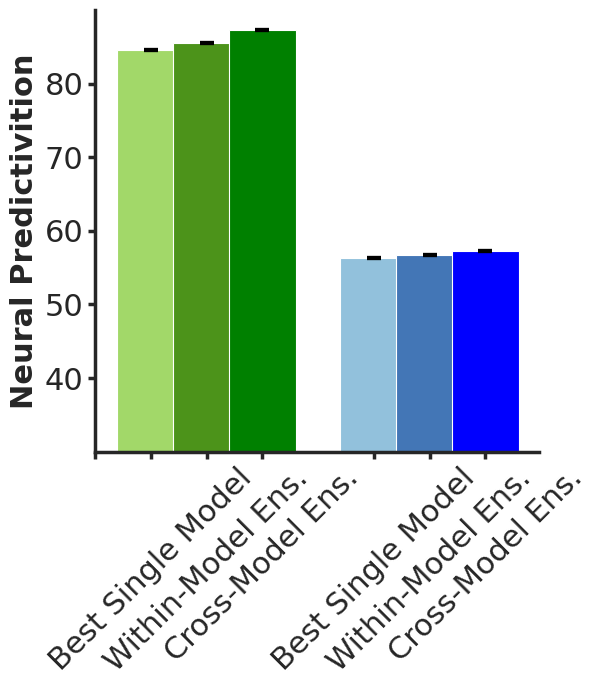

In [ ]:
layer_model_ensemble_normal_compare_bar()